In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import date as datetime_date
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import historical wildfires df

In [3]:
wildFiresDF = pd.read_csv('Historical_Wildfires.csv')

In [4]:
wildFiresDF.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
wildFiresDF.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
wildFiresDF.shape

(26739, 10)

In [7]:
#looking for NAs

In [8]:
wildFiresDF.isna().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2248
Var_confidence                         2248
Count                                     0
Replaced                                  0
dtype: int64

In [9]:
wildFiresDF.Region.unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [10]:
#total number of fires by region

In [11]:
wildFiresDF.Region.value_counts()

WA     5713
QL     5620
NT     5103
NSW    4672
VI     2192
SA     2018
TA     1421
Name: Region, dtype: int64

In [12]:
#examining the target variable

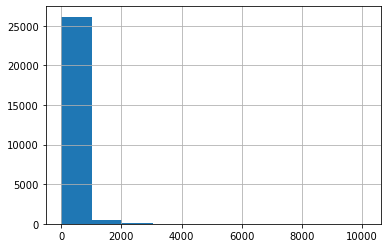

In [13]:
wildFiresDF.Estimated_fire_area.hist()

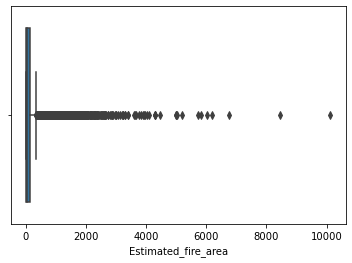

In [14]:
sns.boxplot(wildFiresDF.Estimated_fire_area)

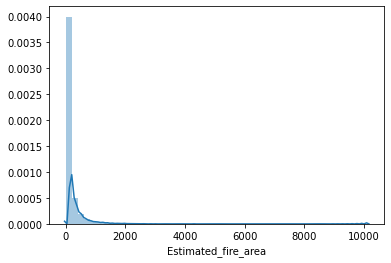

In [15]:
sns.distplot(wildFiresDF.Estimated_fire_area)   #exponential distribution..we could predict the log of the target variable

In [16]:
#examining the distribution of some other variables

In [17]:
wildFiresDF.Mean_estimated_fire_brightness.describe()

count    26739.000000
mean       319.711160
std          8.898425
min        290.700000
25%        313.955598
50%        319.838542
75%        325.470841
max        381.950000
Name: Mean_estimated_fire_brightness, dtype: float64

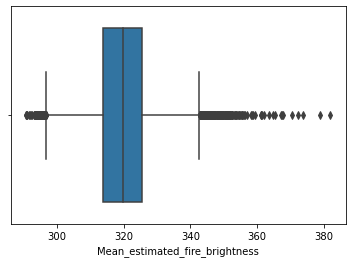

In [18]:
sns.boxplot(wildFiresDF.Mean_estimated_fire_brightness)

In [19]:
wildFiresDF.Mean_estimated_fire_radiative_power.describe()

count    26739.000000
mean        83.742246
std         68.579091
min          0.000000
25%         44.101087
50%         67.100000
75%        103.153691
max       2178.600000
Name: Mean_estimated_fire_radiative_power, dtype: float64

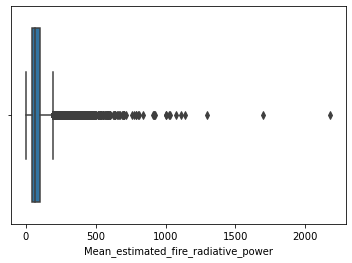

In [20]:
sns.boxplot(wildFiresDF.Mean_estimated_fire_radiative_power)

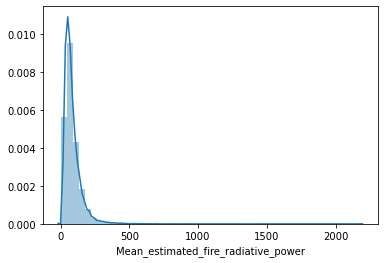

In [21]:
sns.distplot(wildFiresDF.Mean_estimated_fire_radiative_power)  #exponential distribution (apply log transformation)

In [22]:
#comparing count of fires and estiamted fire area..is there a relationship?

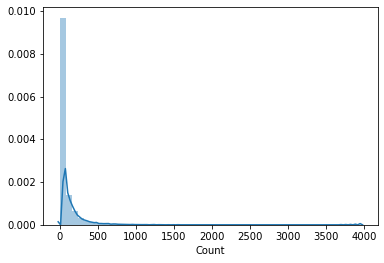

In [23]:
sns.distplot(wildFiresDF.Count)

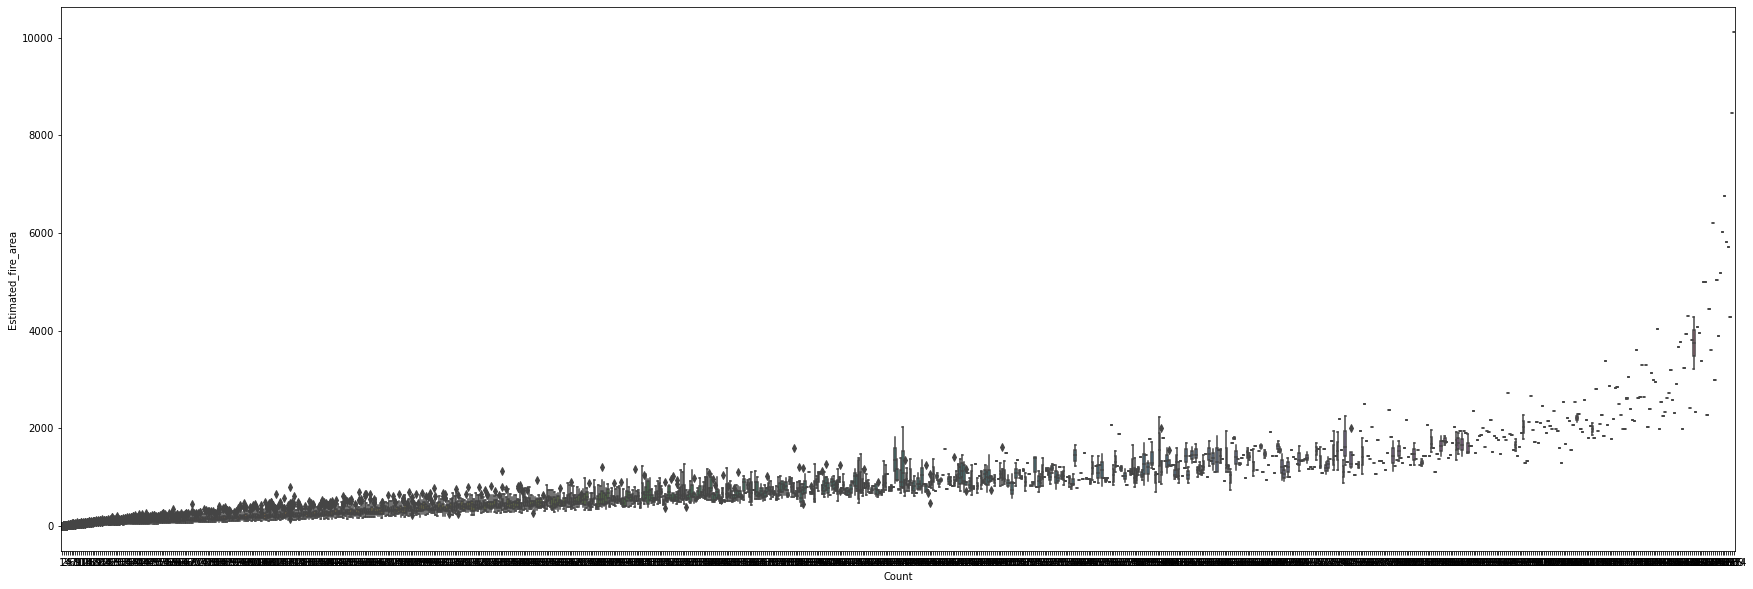

In [24]:
plt.figure(figsize=(30,10))
sns.boxplot(x = wildFiresDF.Count, y = wildFiresDF.Estimated_fire_area)


In [25]:
!pip install chart_studio



In [26]:
import scipy as sp
import chart_studio.plotly as py
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=True)

In [27]:
import plotly.offline as py

In [28]:
!pip install plotly==4.14.3

In [29]:
data = [go.Bar(x=wildFiresDF.Count,
            y=wildFiresDF.Estimated_fire_area)]

py.plot(data, filename='jupyter-basic_bar')

'jupyter-basic_bar.html'

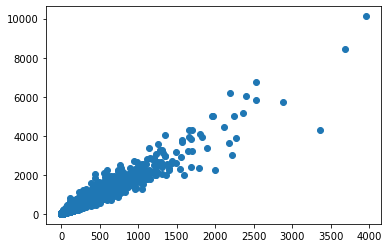

In [30]:
plt.scatter(wildFiresDF['Count'],wildFiresDF['Estimated_fire_area'] )
plt.show()

In [31]:
wildFiresDF.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [32]:
#converting the date variable into datetime

In [33]:
wildFiresDF["Date"] = pd.to_datetime(wildFiresDF.Date)

In [34]:
wildFiresDF.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
dtype: object

In [35]:
#checking for the first and last date in the dataset

In [36]:
wildFiresDF.Date.max(), wildFiresDF.Date.min()

(Timestamp('2021-01-29 00:00:00'), Timestamp('2005-01-01 00:00:00'))

In [37]:
# Insert missing date for each territory
t = np.arange(wildFiresDF.Date.min(), '2021-01-30', timedelta(days=1)).astype(datetime)
df_date=pd.DataFrame(t).rename(columns={0:'Date'})
wildFiresDF_complete = pd.DataFrame()
Region = wildFiresDF.Region.unique()

for i in Region:
    df = df_date.merge(wildFiresDF[wildFiresDF.Region==i],how='left',on='Date')
    df['Region'] = df['Region'].fillna(i) 
    wildFiresDF_complete = pd.concat([wildFiresDF_complete,df])

In [38]:
wildFiresDF_complete.Date.max(), wildFiresDF_complete.Date.min()

(Timestamp('2021-01-29 00:00:00'), Timestamp('2005-01-01 00:00:00'))

In [39]:
wildFiresDF.loc[wildFiresDF.Date == '2021-01-29'] #before

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
15394,QL,2021-01-29,32.717647,314.329412,68.917647,89.176471,6.966305,48.529412,17,N


In [40]:
wildFiresDF_complete.loc[wildFiresDF_complete.Date == '2021-01-29']  #after adding dates with no fires

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
5872,2021-01-29,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,2021-01-29,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,2021-01-29,QL,32.717647,314.329412,68.917647,89.176471,6.966305,48.529412,17.0,N
5872,2021-01-29,SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,2021-01-29,TA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,2021-01-29,VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5872,2021-01-29,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Compute year / month / day variables

wildFiresDF_complete['year']=wildFiresDF_complete['Date'].dt.year
wildFiresDF_complete['month']=wildFiresDF_complete['Date'].dt.month
wildFiresDF_complete['day']=wildFiresDF_complete['Date'].dt.day

# add count_nan for the visualization
wildFiresDF_complete['count_nan']=wildFiresDF_complete['Estimated_fire_area'].\
apply(lambda x: 1 if np.isnan(x) == True else 0)

In [42]:
wildFiresDF_complete.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,year,month,day,count_nan
0,2005-01-01,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,1,1,1
1,2005-01-02,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,1,2,1
2,2005-01-03,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,1,3,1
3,2005-01-04,NSW,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3.0,R,2005,1,4,0
4,2005-01-05,NSW,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8.0,R,2005,1,5,0


In [43]:
# fill the nan values of the variables
wildFiresDF_complete['Estimated_fire_area']=wildFiresDF_complete['Estimated_fire_area'].fillna(0)
wildFiresDF_complete['Mean_estimated_fire_brightness']=wildFiresDF_complete['Mean_estimated_fire_brightness'].fillna(0)
wildFiresDF_complete['Mean_estimated_fire_radiative_power']=wildFiresDF_complete['Mean_estimated_fire_radiative_power'].fillna(0)
wildFiresDF_complete['Mean_confidence']=wildFiresDF_complete['Mean_confidence'].fillna(0)
wildFiresDF_complete['Count']=wildFiresDF_complete['Count'].fillna(0)
wildFiresDF_complete['Replaced']=wildFiresDF_complete['Replaced'].fillna('N')

In [44]:
wildFiresDF_complete.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,year,month,day,count_nan
0,2005-01-01,NSW,0.00000,0.000000,0.0000,0.000000,NaN,NaN,0.0,N,2005,1,1,1
1,2005-01-02,NSW,0.00000,0.000000,0.0000,0.000000,NaN,NaN,0.0,N,2005,1,2,1
2,2005-01-03,NSW,0.00000,0.000000,0.0000,0.000000,NaN,NaN,0.0,N,2005,1,3,1
3,2005-01-04,NSW,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3.0,R,2005,1,4,0
4,2005-01-05,NSW,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8.0,R,2005,1,5,0


In [45]:
#check that nan have been replaced with 0

In [46]:
wildFiresDF_complete.loc[wildFiresDF_complete.Date == '2021-01-29']

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,year,month,day,count_nan
5872,2021-01-29,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,2021,1,29,1
5872,2021-01-29,NT,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,2021,1,29,1
5872,2021-01-29,QL,32.717647,314.329412,68.917647,89.176471,6.966305,48.529412,17.0,N,2021,1,29,0
5872,2021-01-29,SA,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,2021,1,29,1
5872,2021-01-29,TA,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,2021,1,29,1
5872,2021-01-29,VI,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,2021,1,29,1
5872,2021-01-29,WA,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,2021,1,29,1


# WEATHER FORECASTS

In [47]:
#importing the weather forecasts dataset
#since we only know the forecasts for the three days for which we have to make predictions we will use the forecasts with the shortest lead (these forecasts should be the most reliable)

In [48]:
forecasts = pd.read_csv('HistoricalWeatherForecasts.csv')

In [49]:
#filtering only forecasts with lead time = 5

In [50]:
forecasts = forecasts.loc[forecasts["Lead time"] == 5]

In [51]:
forecasts = forecasts.loc[forecasts["Lead time"] == 5]
precipitation = forecasts.loc[forecasts.Parameter == "Precipitation"]
precipitation.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]Pecip', 'min()': 'min()Precip', 'max()': 'max()Precip',
       'mean()': 'mean()Precip', 'variance()': 'variance()Precip'}, inplace=True)
precipitation.drop(columns=['Lead time', 'Parameter'], inplace=True)
relhumidity = forecasts.loc[forecasts.Parameter == "RelativeHumidity"]
relhumidity.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]RelHumid', 'min()': 'min()RelHumid', 'max()': 'max()RelHumid',
       'mean()': 'mean()RelHumid', 'variance()': 'variance()RelHumid'}, inplace=True)
relhumidity.drop(columns=['Lead time', 'Parameter'], inplace=True)
solarRad = forecasts.loc[forecasts.Parameter == "SolarRadiation"]
solarRad.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]solarRad', 'min()': 'min()solarRad', 'max()': 'max()solarRad',
       'mean()': 'mean()solarRad', 'variance()': 'variance()solarRad'}, inplace=True)
solarRad.drop(columns=['Lead time', 'Parameter'], inplace=True)
temp = forecasts.loc[forecasts.Parameter == "Temperature"]
temp.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]temp', 'min()': 'min()temp', 'max()': 'max()temp',
       'mean()': 'mean()temp', 'variance()': 'variance()temp'}, inplace=True)
temp.drop(columns=['Lead time', 'Parameter'], inplace=True)
windSpeed = forecasts.loc[forecasts.Parameter == "WindSpeed"]
windSpeed.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]windSpeed', 'min()': 'min()windSpeed', 'max()': 'max()windSpeed',
       'mean()': 'mean()windSpeed', 'variance()': 'variance()windSpeed'}, inplace=True)
windSpeed.drop(columns=['Lead time', 'Parameter'], inplace=True)
new_forecasts = precipitation.merge(relhumidity, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])
new_forecasts = new_forecasts.merge(windSpeed, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])
new_forecasts = new_forecasts.merge(solarRad, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])
new_forecasts = new_forecasts.merge(temp, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])
new_forecasts["Date"] = pd.to_datetime(new_forecasts.Date)

In [52]:
forecasts.Parameter.value_counts()

RelativeHumidity    17864
Temperature         17864
SolarRadiation      17839
WindSpeed           17836
Precipitation       14063
Name: Parameter, dtype: int64

In [53]:
#creating a dataframe for each weather paramter...renaming the columns adding a reference to the weather parameter they refer to and finally merging them into a single dataframe

In [54]:
precipitation = forecasts.loc[forecasts.Parameter == "Precipitation"]

In [55]:
precipitation.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]Pecip', 'min()': 'min()Precip', 'max()': 'max()Precip',
       'mean()': 'mean()Precip', 'variance()': 'variance()Precip'}, inplace=True)

In [56]:
precipitation.drop(columns=['Lead time', 'Parameter'], inplace=True)

In [57]:
relhumidity = forecasts.loc[forecasts.Parameter == "RelativeHumidity"]

In [58]:
relhumidity.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]RelHumid', 'min()': 'min()RelHumid', 'max()': 'max()RelHumid',
       'mean()': 'mean()RelHumid', 'variance()': 'variance()RelHumid'}, inplace=True)

In [59]:
relhumidity.drop(columns=['Lead time', 'Parameter'], inplace=True)

In [60]:
solarRad = forecasts.loc[forecasts.Parameter == "SolarRadiation"]

In [61]:
solarRad.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]solarRad', 'min()': 'min()solarRad', 'max()': 'max()solarRad',
       'mean()': 'mean()solarRad', 'variance()': 'variance()solarRad'}, inplace=True)

In [62]:
solarRad.drop(columns=['Lead time', 'Parameter'], inplace=True)

In [63]:
temp = forecasts.loc[forecasts.Parameter == "Temperature"]

In [64]:
temp.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]temp', 'min()': 'min()temp', 'max()': 'max()temp',
       'mean()': 'mean()temp', 'variance()': 'variance()temp'}, inplace=True)

In [65]:
temp.drop(columns=['Lead time', 'Parameter'], inplace=True)

In [66]:
windSpeed = forecasts.loc[forecasts.Parameter == "WindSpeed"]

In [67]:
windSpeed.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]windSpeed', 'min()': 'min()windSpeed', 'max()': 'max()windSpeed',
       'mean()': 'mean()windSpeed', 'variance()': 'variance()windSpeed'}, inplace=True)

In [68]:
windSpeed.drop(columns=['Lead time', 'Parameter'], inplace=True)

In [69]:
windSpeed

,Date,Region,count()[unit: km^2]windSpeed,min()windSpeed,max()windSpeed,mean()windSpeed,variance()windSpeed
3,2014-01-01,NSW,8.037682e+05,1.593531,6.989559,3.958822,1.334834
7,2014-01-01,NT,1.349817e+06,1.192912,12.156700,4.740253,4.871655
11,2014-01-01,QL,1.736319e+06,1.559428,7.026765,4.178836,1.352935
15,2014-01-01,SA,9.797103e+05,2.831450,15.038714,8.630796,10.752086
19,2014-01-01,TA,6.567142e+04,3.079223,8.109127,4.831787,1.000159
...,...,...,...,...,...,...,...
227040,2021-02-03,QL,1.736319e+06,0.968142,15.785018,4.494314,1.932235
227055,2021-02-03,SA,9.797103e+05,1.722697,6.719259,3.683344,0.759807
227070,2021-02-03,TA,6.567142e+04,1.443271,8.028457,2.705637,1.447423
227085,2021-02-03,VI,2.300457e+05,0.872873,6.373100,2.912143,0.930999


In [70]:
precipitation

,Date,Region,count()[unit: km^2]Pecip,min()Precip,max()Precip,mean()Precip,variance()Precip
15092,2015-07-06,NSW,8.037682e+05,0.000000,0.676588,0.015649,0.004120
15105,2015-07-06,NT,1.349817e+06,0.000000,1.775728,0.017325,0.012745
15118,2015-07-06,QL,1.736319e+06,0.000000,2.001911,0.054568,0.027684
15131,2015-07-06,SA,9.797103e+05,0.000000,4.364864,0.165038,0.150157
15144,2015-07-06,TA,6.567142e+04,0.847536,14.824793,4.985277,13.149893
...,...,...,...,...,...,...,...
227028,2021-02-03,QL,1.736319e+06,0.000000,144.020859,2.197306,76.446585
227043,2021-02-03,SA,9.797103e+05,0.000000,0.130236,0.000797,0.000054
227058,2021-02-03,TA,6.567142e+04,0.000000,3.091709,0.339864,0.359213
227073,2021-02-03,VI,2.300457e+05,0.000000,5.298052,0.070650,0.218685


In [71]:
relhumidity

,Date,Region,count()[unit: km^2]RelHumid,min()RelHumid,max()RelHumid,mean()RelHumid,variance()RelHumid
0,2014-01-01,NSW,8.037682e+05,7.482927,85.021118,28.223569,353.620815
4,2014-01-01,NT,1.349817e+06,14.796251,73.601479,39.799856,189.805002
8,2014-01-01,QL,1.736319e+06,7.028183,83.466888,40.504877,470.624907
12,2014-01-01,SA,9.797103e+05,6.606842,75.290993,26.038432,275.718715
16,2014-01-01,TA,6.567142e+04,68.435989,92.093201,85.672655,12.570180
...,...,...,...,...,...,...,...
227031,2021-02-03,QL,1.736319e+06,11.855491,96.102104,45.480350,471.740534
227046,2021-02-03,SA,9.797103e+05,12.405153,73.189850,29.065450,196.010266
227061,2021-02-03,TA,6.567142e+04,79.478294,93.680916,87.684071,12.103783
227076,2021-02-03,VI,2.300457e+05,29.702379,91.133904,59.855631,267.771883


In [72]:
solarRad

,Date,Region,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad
1,2014-01-01,NSW,8.037682e+05,24.865765,33.557598,31.647308,2.276068
5,2014-01-01,NT,1.349817e+06,18.851019,32.766205,28.016282,6.573279
9,2014-01-01,QL,1.736319e+06,17.929157,33.518051,30.337689,7.079362
13,2014-01-01,SA,9.797103e+05,11.718054,33.439438,27.126219,30.069684
17,2014-01-01,TA,6.567142e+04,12.340322,22.283730,17.549968,9.588782
...,...,...,...,...,...,...,...
227034,2021-02-03,QL,1.736319e+06,1.150908,32.017319,24.855744,32.834457
227049,2021-02-03,SA,9.797103e+05,18.261259,32.286980,28.199687,8.064357
227064,2021-02-03,TA,6.567142e+04,4.917494,27.416382,16.342422,13.358919
227079,2021-02-03,VI,2.300457e+05,4.531732,31.663456,23.384480,68.625939


In [73]:
temp

,Date,Region,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
2,2014-01-01,NSW,8.037682e+05,21.243755,36.929035,30.893523,17.918553
6,2014-01-01,NT,1.349817e+06,25.955570,39.907539,33.379110,6.605778
10,2014-01-01,QL,1.736319e+06,22.155766,40.503181,32.331884,22.150075
14,2014-01-01,SA,9.797103e+05,20.889954,38.834274,34.074006,15.097683
18,2014-01-01,TA,6.567142e+04,11.401472,20.020470,14.569532,2.292068
...,...,...,...,...,...,...,...
227037,2021-02-03,QL,1.736319e+06,20.638783,37.244339,29.602333,12.354788
227052,2021-02-03,SA,9.797103e+05,13.355332,30.996925,24.776672,16.677602
227067,2021-02-03,TA,6.567142e+04,10.509803,17.149212,14.018327,1.963352
227082,2021-02-03,VI,2.300457e+05,9.921582,20.779758,15.349947,8.457167


# MERGING FORECASTS PARAMTERS' DATAFRAMES

In [2]:
#merging previosuly created datasets with weather parameters

In [74]:
new_forecasts = precipitation.merge(relhumidity, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])


In [75]:
new_forecasts = new_forecasts.merge(windSpeed, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])

In [76]:
new_forecasts = new_forecasts.merge(solarRad, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])

In [77]:
new_forecasts = new_forecasts.merge(temp, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])

In [78]:
new_forecasts.head()

,Date,Region,count()[unit: km^2]Pecip,min()Precip,max()Precip,mean()Precip,variance()Precip,count()[unit: km^2]RelHumid,min()RelHumid,max()RelHumid,...,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
0,2015-07-06,NSW,8.037682e+05,0.000000,0.676588,0.015649,0.004120,8.037682e+05,36.506927,96.380577,...,8.037682e+05,1.310407,14.294098,11.804923,7.179963,8.037682e+05,1.781415,17.923838,10.280841,5.677777
1,2015-07-06,NT,1.349817e+06,0.000000,1.775728,0.017325,0.012745,1.349817e+06,22.928360,75.619980,...,1.349817e+06,8.691142,20.307533,17.706972,2.025979,1.349817e+06,11.268316,26.196993,18.207019,14.549913
2,2015-07-06,QL,1.736319e+06,0.000000,2.001911,0.054568,0.027684,1.736319e+06,30.285908,92.607628,...,1.736319e+06,7.298058,19.379251,16.036177,3.094750,1.736319e+06,8.465402,25.564709,17.935421,10.532778
3,2015-07-06,SA,9.797103e+05,0.000000,4.364864,0.165038,0.150157,9.797103e+05,29.739246,91.356522,...,9.797103e+05,3.959972,15.410563,12.210876,6.095881,9.797103e+05,7.636046,16.065647,13.257703,2.698994
4,2015-07-06,TA,6.567142e+04,0.847536,14.824793,4.985277,13.149893,6.567142e+04,71.484756,94.721146,...,6.567142e+04,0.742585,5.149638,2.396732,1.286419,6.567142e+04,1.832730,11.433212,5.788967,4.412144


In [79]:
new_forecasts.tail()

,Date,Region,count()[unit: km^2]Pecip,min()Precip,max()Precip,mean()Precip,variance()Precip,count()[unit: km^2]RelHumid,min()RelHumid,max()RelHumid,...,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
13879,2021-02-03,QL,1.736319e+06,0.0,144.020859,2.197306,76.446585,1.736319e+06,11.855491,96.102104,...,1.736319e+06,1.150908,32.017319,24.855744,32.834457,1.736319e+06,20.638783,37.244339,29.602333,12.354788
13880,2021-02-03,SA,9.797103e+05,0.0,0.130236,0.000797,0.000054,9.797103e+05,12.405153,73.189850,...,9.797103e+05,18.261259,32.286980,28.199687,8.064357,9.797103e+05,13.355332,30.996925,24.776672,16.677602
13881,2021-02-03,TA,6.567142e+04,0.0,3.091709,0.339864,0.359213,6.567142e+04,79.478294,93.680916,...,6.567142e+04,4.917494,27.416382,16.342422,13.358919,6.567142e+04,10.509803,17.149212,14.018327,1.963352
13882,2021-02-03,VI,2.300457e+05,0.0,5.298052,0.070650,0.218685,2.300457e+05,29.702379,91.133904,...,2.300457e+05,4.531732,31.663456,23.384480,68.625939,2.300457e+05,9.921582,20.779758,15.349947,8.457167
13883,2021-02-03,WA,2.542548e+06,0.0,37.947727,3.047417,38.243424,2.542548e+06,19.470699,81.846352,...,2.542548e+06,1.790249,30.492689,19.489609,59.990016,2.542548e+06,15.596161,34.871944,26.044550,15.859010


In [80]:
new_forecasts["Date"] = pd.to_datetime(new_forecasts.Date)

In [81]:
new_forecasts.Date.min(), new_forecasts.Date.max() 

(Timestamp('2015-07-06 00:00:00'), Timestamp('2021-02-03 00:00:00'))

# MERGING WILDFIRE DATAFRAME WITH THE MERGED FORECAST DATAFRAME

In [82]:
wildFiresDF_complete.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,year,month,day,count_nan
0,2005-01-01,NSW,0.00000,0.000000,0.0000,0.000000,NaN,NaN,0.0,N,2005,1,1,1
1,2005-01-02,NSW,0.00000,0.000000,0.0000,0.000000,NaN,NaN,0.0,N,2005,1,2,1
2,2005-01-03,NSW,0.00000,0.000000,0.0000,0.000000,NaN,NaN,0.0,N,2005,1,3,1
3,2005-01-04,NSW,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3.0,R,2005,1,4,0
4,2005-01-05,NSW,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8.0,R,2005,1,5,0


In [83]:
df = wildFiresDF_complete.merge(new_forecasts, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])

In [84]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [85]:
#new merged dataframe

In [86]:
df.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
0,2015-07-06,NSW,4.533333,300.483333,28.6,80.333333,1.527525,2.333333,3.0,R,...,803768.19762,1.310407,14.294098,11.804923,7.179963,803768.19762,1.781415,17.923838,10.280841,5.677777
1,2015-07-07,NSW,5.390000,307.000000,31.2,82.000000,5.887841,34.666667,4.0,R,...,803768.19762,3.958993,14.775929,12.370152,2.508597,803768.19762,0.099376,16.054276,9.670909,7.388896
2,2015-07-08,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,803768.19762,6.651114,14.922725,12.557472,2.167692,803768.19762,-0.059143,15.528275,8.917964,5.448867
3,2015-07-09,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,803768.19762,1.350860,14.840615,10.890758,10.691887,803768.19762,4.177390,15.895335,10.853388,3.343773
4,2015-07-10,NSW,1.800000,305.100000,29.9,79.000000,NaN,NaN,1.0,R,...,803768.19762,1.358067,13.248702,7.854180,11.847141,803768.19762,2.698585,17.526588,11.332001,5.363875


In [87]:
df.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min()solarRad', 'max()solarRad',
       'mean()solarRad', 'variance()solarRad', 'count()[unit: km^2]temp',
       'min()temp', 'max()temp', 'mean()temp', 'variance()temp'],
      dtype='object')

In [88]:
df.Date.min() , df.Date.max() 

(Timestamp('2015-07-06 00:00:00'), Timestamp('2021-01-29 00:00:00'))

In [89]:
df.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min()solarRad', 'max()solarRad',
       'mean()solarRad', 'variance()solarRad', 'count()[unit: km^2]temp',
       'min()temp', 'max()temp', 'mean()temp', 'variance()temp'],
      dtype='object')

In [90]:
#comparing month and estimated fire area...is there a relation?

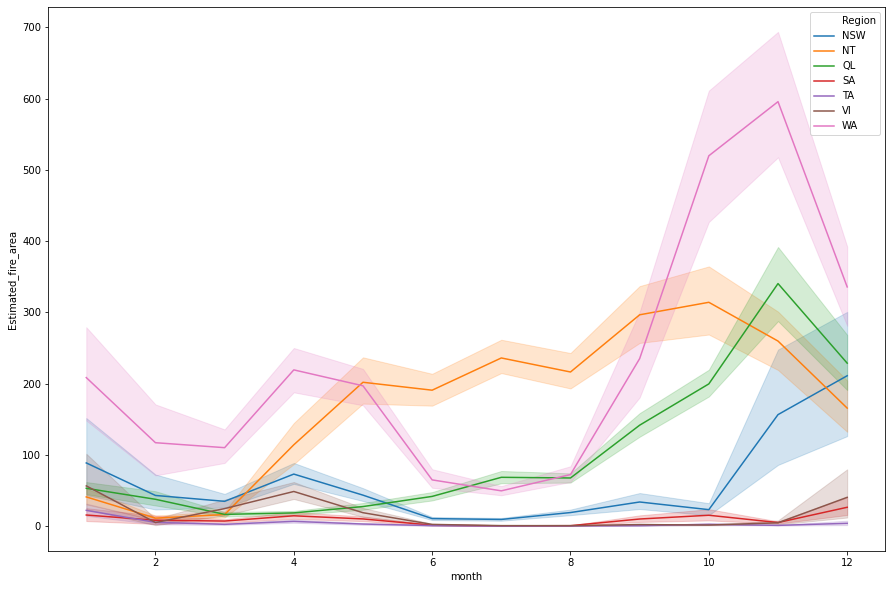

In [91]:
plt.figure(figsize=(15,10))
sns.lineplot(x = df.month, y = df.Estimated_fire_area, hue = df.Region)

In [92]:
#comparing the count of wildfires with the month...is there a relation?

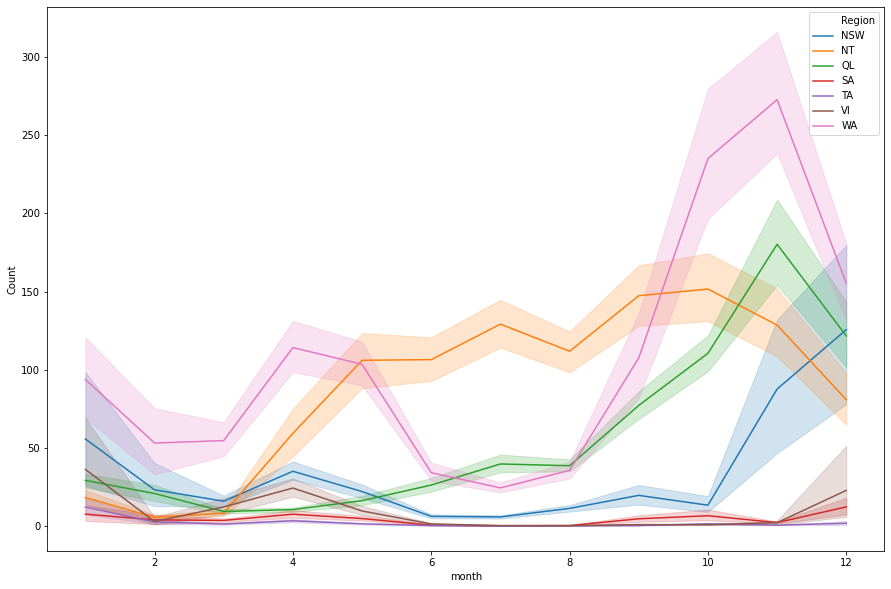

In [93]:
plt.figure(figsize=(15,10))
sns.lineplot(x = df.month, y = df.Count, hue = df.Region)

In [94]:
#looking for correlations between variables in the new dataframe...is some variable related to the target variable? are variables correlated between each other?

In [95]:
df.corr()

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,year,month,day,...,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
Estimated_fire_area,1.000000,0.284884,0.394045,0.294419,0.129517,0.082863,0.961644,-0.023160,0.167756,-0.014008,...,0.312427,0.151518,0.201971,0.226232,-0.020598,0.312498,0.187127,0.278235,0.262016,0.241377
Mean_estimated_fire_brightness,0.284884,1.000000,0.592877,0.997423,0.206281,0.147810,0.286389,0.003420,-0.005683,-0.000968,...,0.535799,0.087502,0.217731,0.247479,-0.019250,0.535925,0.290434,0.458766,0.414417,0.324406
Mean_estimated_fire_radiative_power,0.394045,0.592877,1.000000,0.602659,0.114277,0.094235,0.338145,-0.002270,0.025288,-0.001213,...,0.348150,0.104222,0.203079,0.219038,0.015331,0.348367,0.236054,0.333304,0.314064,0.247826
Mean_confidence,0.294419,0.997423,0.602659,1.000000,0.355011,0.315987,0.295661,0.003372,-0.004270,-0.000978,...,0.532436,0.088644,0.219223,0.248601,-0.017812,0.532554,0.289449,0.457214,0.413250,0.324279
Std_confidence,0.129517,0.206281,0.114277,0.355011,1.000000,0.952380,0.127988,-0.027995,0.060124,-0.006442,...,0.180522,0.056368,0.125758,0.129094,0.004866,0.180696,0.122071,0.178354,0.156059,0.103653
Var_confidence,0.082863,0.147810,0.094235,0.315987,0.952380,1.000000,0.080751,-0.025255,0.043680,0.001491,...,0.120496,0.039039,0.107011,0.105156,0.020452,0.120647,0.090918,0.131949,0.115633,0.080340
Count,0.961644,0.286389,0.338145,0.295661,0.127988,0.080751,1.000000,-0.013743,0.162738,-0.015050,...,0.295541,0.158896,0.197910,0.224286,-0.029194,0.295633,0.183536,0.269827,0.254185,0.223541
year,-0.023160,0.003420,-0.002270,0.003372,-0.027995,-0.025255,-0.013743,1.000000,-0.176149,-0.007647,...,-0.000069,0.009580,-0.002858,-0.004446,-0.004436,0.000285,0.033438,0.009177,0.021060,-0.009720
month,0.167756,-0.005683,0.025288,-0.004270,0.060124,0.043680,0.162738,-0.176149,1.000000,0.010615,...,0.000025,0.154779,0.128018,0.122500,0.005899,-0.000103,-0.157087,-0.108338,-0.119953,0.027558
day,-0.014008,-0.000968,-0.001213,-0.000978,-0.006442,0.001491,-0.015050,-0.007647,0.010615,1.000000,...,0.000016,-0.002457,-0.002882,-0.003638,0.000315,-0.000066,-0.000021,0.001065,0.002918,0.002000


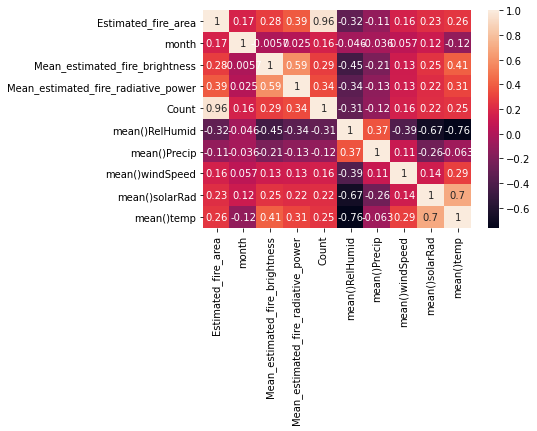

In [96]:
sns.heatmap(df[['Estimated_fire_area','month','Mean_estimated_fire_brightness','Mean_estimated_fire_radiative_power','Count','mean()RelHumid','mean()Precip','mean()windSpeed','mean()solarRad', 'mean()temp']].corr(), annot=True )

In [97]:
df.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
0,2015-07-06,NSW,4.533333,300.483333,28.6,80.333333,1.527525,2.333333,3.0,R,...,803768.19762,1.310407,14.294098,11.804923,7.179963,803768.19762,1.781415,17.923838,10.280841,5.677777
1,2015-07-07,NSW,5.390000,307.000000,31.2,82.000000,5.887841,34.666667,4.0,R,...,803768.19762,3.958993,14.775929,12.370152,2.508597,803768.19762,0.099376,16.054276,9.670909,7.388896
2,2015-07-08,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,803768.19762,6.651114,14.922725,12.557472,2.167692,803768.19762,-0.059143,15.528275,8.917964,5.448867
3,2015-07-09,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,803768.19762,1.350860,14.840615,10.890758,10.691887,803768.19762,4.177390,15.895335,10.853388,3.343773
4,2015-07-10,NSW,1.800000,305.100000,29.9,79.000000,NaN,NaN,1.0,R,...,803768.19762,1.358067,13.248702,7.854180,11.847141,803768.19762,2.698585,17.526588,11.332001,5.363875


In [98]:
df.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min()solarRad', 'max()solarRad',
       'mean()solarRad', 'variance()solarRad', 'count()[unit: km^2]temp',
       'min()temp', 'max()temp', 'mean()temp', 'variance()temp'],
      dtype='object')

In [99]:
#checking correlations among weather variables

In [100]:
df[["mean()Precip", "mean()RelHumid", "mean()windSpeed", "mean()solarRad", "mean()temp"]].corr()

,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp
mean()Precip,1.000000,0.370350,0.110420,-0.255368,-0.063201
mean()RelHumid,0.370350,1.000000,-0.387790,-0.674574,-0.761658
mean()windSpeed,0.110420,-0.387790,1.000000,0.135977,0.291223
mean()solarRad,-0.255368,-0.674574,0.135977,1.000000,0.704061
mean()temp,-0.063201,-0.761658,0.291223,0.704061,1.000000


# GRAPHS FOR  WEATHER PARAMTERS

In [101]:
#precipitation

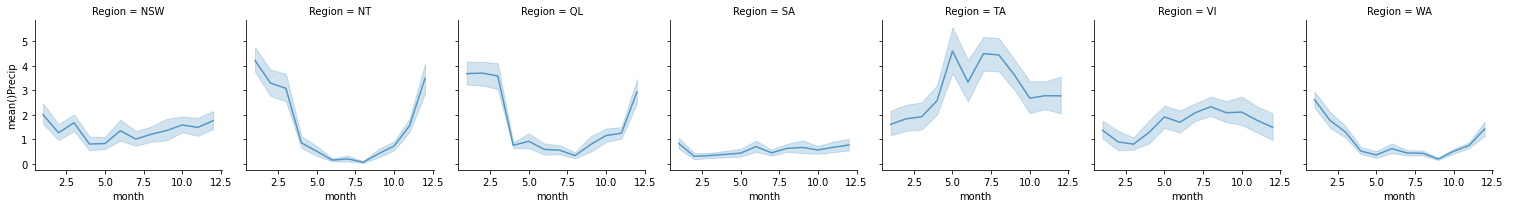

In [102]:
g = sns.FacetGrid(df, col="Region")
g.map(sns.lineplot, "month", "mean()Precip", alpha=.7)
g.add_legend()

In [103]:
#solar rad

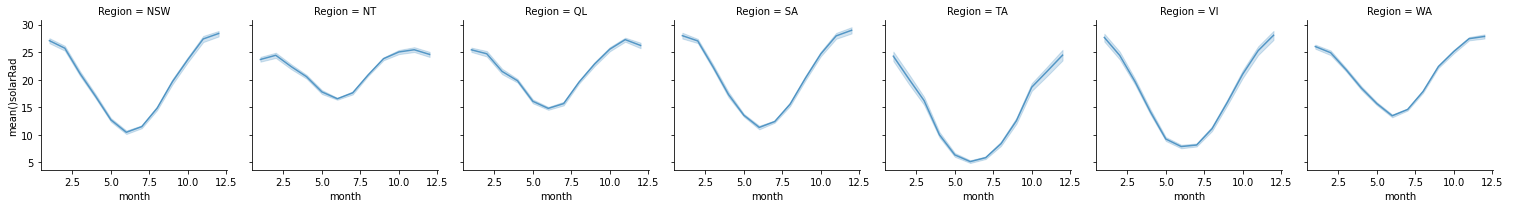

In [104]:
g = sns.FacetGrid(df, col="Region")
g.map(sns.lineplot, "month", "mean()solarRad", alpha=.7)
g.add_legend()

In [105]:
#temperature

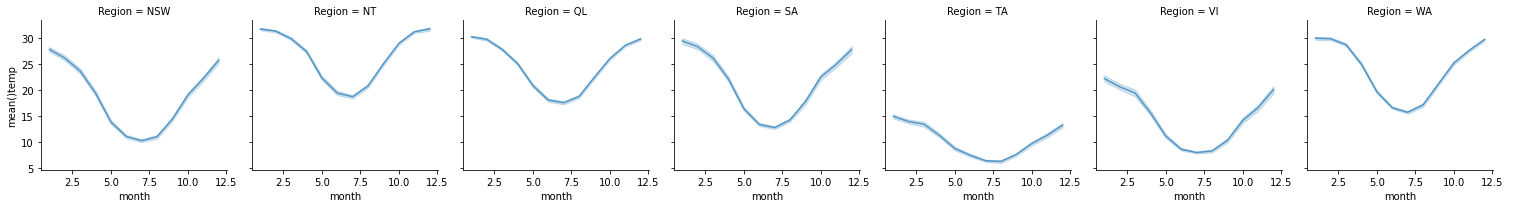

In [106]:
g = sns.FacetGrid(df, col="Region")
g.map(sns.lineplot, "month", "mean()temp", alpha=.7)
g.add_legend()

In [107]:
#wind speed

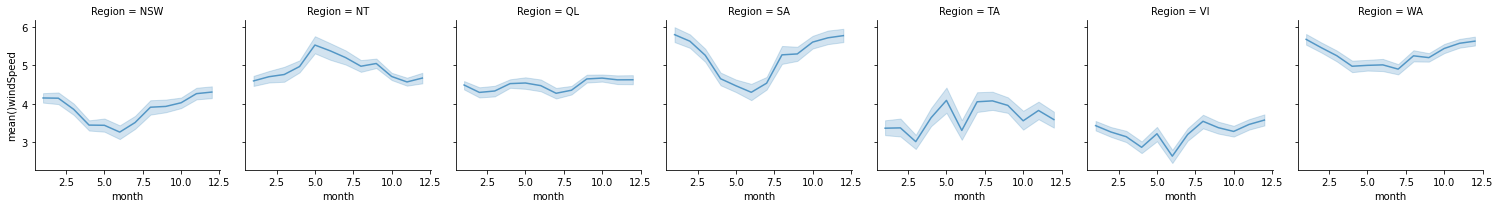

In [108]:
g = sns.FacetGrid(df, col="Region")
g.map(sns.lineplot, "month", "mean()windSpeed", alpha=.7)
g.add_legend()

In [109]:
#humidity

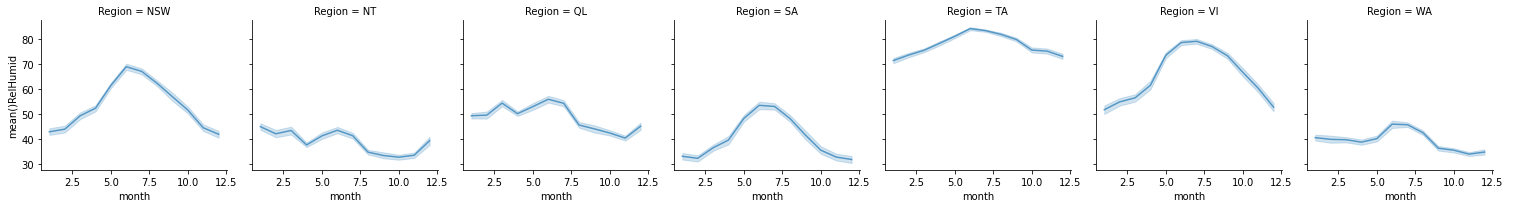

In [110]:
g = sns.FacetGrid(df, col="Region")
g.map(sns.lineplot, "month", "mean()RelHumid", alpha=.7)
g.add_legend()

# Historical weather 

In [3]:
#importing the historical weather dataset...from this dataset we retain data about the soilWater 

In [112]:
weather = pd.read_csv('HistoricalWeather.csv')

In [113]:
weather.head(10)

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,8.002343e+05,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,8.002343e+05,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,8.002343e+05,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,8.002343e+05,14.485785,35.878704,27.341182,18.562212
5,2005-01-01,NSW,WindSpeed,8.002343e+05,1.354448,7.670482,3.323550,0.850048
6,2005-01-01,NT,Precipitation,1.357561e+06,0.000000,315.266815,9.884958,546.059262
7,2005-01-01,NT,RelativeHumidity,1.357561e+06,14.558820,95.683342,61.494675,584.201131
8,2005-01-01,NT,SoilWaterContent,1.357561e+06,0.000000,0.496140,0.167735,0.026743
9,2005-01-01,NT,SolarRadiation,1.357561e+06,2.518120,31.634459,19.781791,58.942658


In [114]:
sdate = wildFiresDF.Date.min()
edate = wildFiresDF.Date.max()
regions = pd.DataFrame(list(wildFiresDF.Region.unique()), columns = ['Region'])
perimetro_date = pd.DataFrame(list(pd.date_range(sdate,edate,freq='d')), columns = ['Date'])
perimetro_date_reg = regions.assign(key=1).merge(perimetro_date.assign(key=1), how='outer', on='key').drop(columns = ['key'])

In [115]:
perimetro_date_reg

,Region,Date
0,NSW,2005-01-01
1,NSW,2005-01-02
2,NSW,2005-01-03
3,NSW,2005-01-04
4,NSW,2005-01-05
...,...,...
41106,WA,2021-01-25
41107,WA,2021-01-26
41108,WA,2021-01-27
41109,WA,2021-01-28


In [116]:
weather['Date'] = weather.Date.map(str).apply(lambda x: datetime_date(int(x[:4]), int(x[5:7]), int(x[8:10])))
weather['Date'] = pd.to_datetime(weather['Date'])
weather.dtypes

Date                   datetime64[ns]
Region                         object
Parameter                      object
count()[unit: km^2]           float64
min()                         float64
max()                         float64
mean()                        float64
variance()                    float64
dtype: object

In [117]:
weather

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000e+00,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,8.002343e+05,1.387719e+01,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,8.002343e+05,2.244790e-03,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,8.002343e+05,1.451501e+01,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,8.002343e+05,1.448578e+01,35.878704,27.341182,18.562212
...,...,...,...,...,...,...,...,...
246136,2021-01-23,WA,RelativeHumidity,2.528546e+06,2.461761e+01,91.604195,62.136811,332.811746
246137,2021-01-23,WA,SoilWaterContent,2.528546e+06,7.375299e-07,0.479402,0.139733,0.011813
246138,2021-01-23,WA,SolarRadiation,2.528546e+06,2.582241e+00,31.672697,22.091301,59.357413
246139,2021-01-23,WA,Temperature,2.528546e+06,1.914567e+01,34.780716,26.972257,9.312527


In [118]:
# Extract the parameter
param_weather = pd.DataFrame(weather.Parameter.unique(), columns = ['Parameter'])

In [119]:
param_weather

,Parameter
0,Precipitation
1,RelativeHumidity
2,SoilWaterContent
3,SolarRadiation
4,Temperature
5,WindSpeed


In [120]:
perimetro_date_weather = param_weather.assign(key=1).\
merge(perimetro_date_reg.assign(key=1), how= 'outer', on = 'key').\
drop(columns = ['key'])

In [121]:
perimetro_date_weather

,Parameter,Region,Date
0,Precipitation,NSW,2005-01-01
1,Precipitation,NSW,2005-01-02
2,Precipitation,NSW,2005-01-03
3,Precipitation,NSW,2005-01-04
4,Precipitation,NSW,2005-01-05
...,...,...,...
246661,WindSpeed,WA,2021-01-25
246662,WindSpeed,WA,2021-01-26
246663,WindSpeed,WA,2021-01-27
246664,WindSpeed,WA,2021-01-28


In [122]:
weather_completo = pd.merge(weather, perimetro_date_weather, how='outer').\
sort_values(by = 'Date').\
reset_index(drop=True)

In [123]:
weather_completo

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,SA,WindSpeed,991315.104985,2.023657,10.044715,4.657538,1.655908
2,2005-01-01,TA,Precipitation,67785.261409,0.003973,13.604791,3.099497,12.068597
3,2005-01-01,TA,RelativeHumidity,67785.261409,43.906574,81.501442,65.086764,111.754034
4,2005-01-01,TA,SoilWaterContent,67785.261409,0.000000,0.368189,0.211360,0.007121
...,...,...,...,...,...,...,...,...
246661,2021-01-29,VI,SolarRadiation,NaN,NaN,NaN,NaN,NaN
246662,2021-01-29,WA,Temperature,NaN,NaN,NaN,NaN,NaN
246663,2021-01-29,NSW,SoilWaterContent,NaN,NaN,NaN,NaN,NaN
246664,2021-01-29,SA,RelativeHumidity,NaN,NaN,NaN,NaN,NaN


In [124]:
weather_completo = weather_completo.\
sort_values(by = ['Region','Parameter','Date']).\
reset_index(drop=True)

In [125]:
weather_completo

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.0,1.836935,0.044274,0.028362
1,2005-01-02,NSW,Precipitation,800234.348986,0.0,6.854537,0.173879,0.271386
2,2005-01-03,NSW,Precipitation,800234.348986,0.0,14.969810,3.011912,10.308246
3,2005-01-04,NSW,Precipitation,800234.348986,0.0,22.842566,2.808620,17.383363
4,2005-01-05,NSW,Precipitation,800234.348986,0.0,7.657155,0.157935,0.273471
...,...,...,...,...,...,...,...,...
246661,2021-01-25,WA,WindSpeed,NaN,NaN,NaN,NaN,NaN
246662,2021-01-26,WA,WindSpeed,NaN,NaN,NaN,NaN,NaN
246663,2021-01-27,WA,WindSpeed,NaN,NaN,NaN,NaN,NaN
246664,2021-01-28,WA,WindSpeed,NaN,NaN,NaN,NaN,NaN


In [126]:
cols_to_transform = ['count()[unit: km^2]', 'min()', 'max()', 'mean()', 'variance()']

weather_completo[cols_to_transform] = weather_completo.groupby(['Region','Parameter'])[cols_to_transform].apply(lambda v: v.ffill())

In [127]:
weather_completo

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000,1.836935,0.044274,0.028362
1,2005-01-02,NSW,Precipitation,8.002343e+05,0.000000,6.854537,0.173879,0.271386
2,2005-01-03,NSW,Precipitation,8.002343e+05,0.000000,14.969810,3.011912,10.308246
3,2005-01-04,NSW,Precipitation,8.002343e+05,0.000000,22.842566,2.808620,17.383363
4,2005-01-05,NSW,Precipitation,8.002343e+05,0.000000,7.657155,0.157935,0.273471
...,...,...,...,...,...,...,...,...
246661,2021-01-25,WA,WindSpeed,2.528546e+06,2.157812,9.989105,5.148252,1.198810
246662,2021-01-26,WA,WindSpeed,2.528546e+06,2.157812,9.989105,5.148252,1.198810
246663,2021-01-27,WA,WindSpeed,2.528546e+06,2.157812,9.989105,5.148252,1.198810
246664,2021-01-28,WA,WindSpeed,2.528546e+06,2.157812,9.989105,5.148252,1.198810


In [128]:
weather_completo['Date'] = pd.to_datetime(weather_completo['Date'])
weather_completo['MONTH'] = pd.DatetimeIndex(weather_completo['Date']).month
weather_completo['DAY'] = pd.DatetimeIndex(weather_completo['Date']).day
weather_completo['YEAR'] = pd.DatetimeIndex(weather_completo['Date']).year

In [129]:
weather_completo.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance(),MONTH,DAY,YEAR
0,2005-01-01,NSW,Precipitation,800234.348986,0.0,1.836935,0.044274,0.028362,1,1,2005
1,2005-01-02,NSW,Precipitation,800234.348986,0.0,6.854537,0.173879,0.271386,1,2,2005
2,2005-01-03,NSW,Precipitation,800234.348986,0.0,14.969810,3.011912,10.308246,1,3,2005
3,2005-01-04,NSW,Precipitation,800234.348986,0.0,22.842566,2.808620,17.383363,1,4,2005
4,2005-01-05,NSW,Precipitation,800234.348986,0.0,7.657155,0.157935,0.273471,1,5,2005


In [130]:
#creating a dataframe for the SoilwaterContent parameter only

In [131]:
soilWater = weather_completo.loc[weather_completo.Parameter == "SoilWaterContent"]

In [132]:
soilWater.rename(columns={"mean()": "soilWaterMean", "MONTH": "month", "DAY": "day", "YEAR": "year"}, inplace=True)

In [133]:
soilWater

,Date,Region,Parameter,count()[unit: km^2],min(),max(),soilWaterMean,variance(),month,day,year
11746,2005-01-01,NSW,SoilWaterContent,8.002343e+05,2.244790e-03,0.414305,0.170931,0.007758,1,1,2005
11747,2005-01-02,NSW,SoilWaterContent,8.002343e+05,1.209517e-03,0.404071,0.169551,0.007293,1,2,2005
11748,2005-01-03,NSW,SoilWaterContent,8.002343e+05,1.088890e-02,0.405569,0.179981,0.006598,1,3,2005
11749,2005-01-04,NSW,SoilWaterContent,8.002343e+05,2.257813e-02,0.444927,0.214293,0.009965,1,4,2005
11750,2005-01-05,NSW,SoilWaterContent,8.002343e+05,1.994997e-02,0.442955,0.203951,0.009483,1,5,2005
...,...,...,...,...,...,...,...,...,...,...,...
229042,2021-01-25,WA,SoilWaterContent,2.528546e+06,7.375299e-07,0.479402,0.139733,0.011813,1,25,2021
229043,2021-01-26,WA,SoilWaterContent,2.528546e+06,7.375299e-07,0.479402,0.139733,0.011813,1,26,2021
229044,2021-01-27,WA,SoilWaterContent,2.528546e+06,7.375299e-07,0.479402,0.139733,0.011813,1,27,2021
229045,2021-01-28,WA,SoilWaterContent,2.528546e+06,7.375299e-07,0.479402,0.139733,0.011813,1,28,2021


In [134]:
#computing the mean value for the soilwatercontent by region, year and month...we will retain this parameter only

In [135]:
soilWater.groupby(["Region", "year", "month"]).soilWaterMean.mean().reset_index()

,Region,year,month,soilWaterMean
0,NSW,2005,1,0.185708
1,NSW,2005,2,0.192844
2,NSW,2005,3,0.181049
3,NSW,2005,4,0.162402
4,NSW,2005,5,0.163287
...,...,...,...,...
1346,WA,2020,9,0.053833
1347,WA,2020,10,0.051864
1348,WA,2020,11,0.060190
1349,WA,2020,12,0.097448


In [136]:
new_soilWater = pd.DataFrame(soilWater.groupby(["Region", "year", "month"]).soilWaterMean.mean().reset_index())

In [137]:
new_soilWater.head()

,Region,year,month,soilWaterMean
0,NSW,2005,1,0.185708
1,NSW,2005,2,0.192844
2,NSW,2005,3,0.181049
3,NSW,2005,4,0.162402
4,NSW,2005,5,0.163287


In [138]:
#check to see whether the values are correct

In [139]:
soilWater.loc[(soilWater.Region == "NSW") & (soilWater.year == 2005) & (soilWater.month == 4)].soilWaterMean.mean()

0.1624021341724538

In [140]:
#we can see that the value for the soil water content changes during the months and taking the region into consideration...it could be useful in helping predicting the area of wildifres

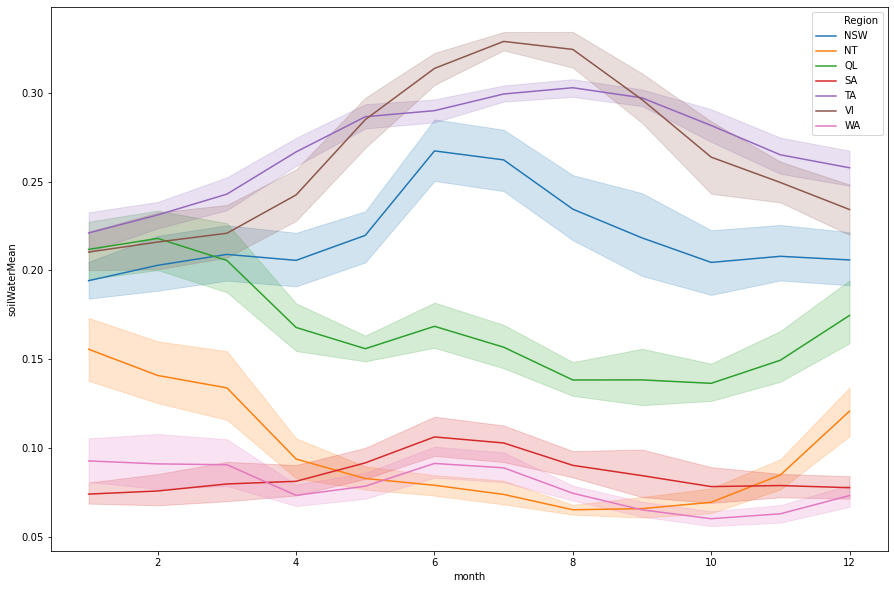

In [141]:
plt.figure(figsize=(15,10))
sns.lineplot(x = new_soilWater.month, y = new_soilWater.soilWaterMean, hue = new_soilWater.Region)

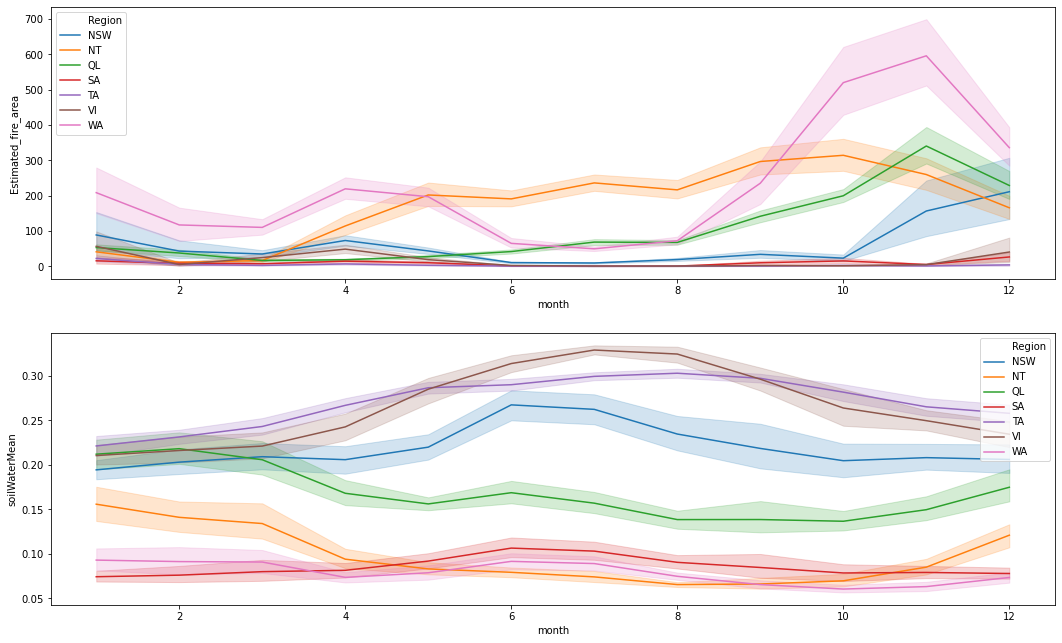

In [142]:
fig, ax =plt.subplots(2,1, figsize=(18,11))
sns.lineplot(x = df.month, y = df.Estimated_fire_area, hue = df.Region, ax = ax[0])
sns.lineplot(x = new_soilWater.month, y = new_soilWater.soilWaterMean, hue = new_soilWater.Region, ax = ax[1])
plt.legend(loc='upper right')

# MERGING MAIN DATAFRAME AND SOILWATER DATAFRAME

In [144]:
df.head(50)

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
0,2015-07-06,NSW,4.533333,300.483333,28.600000,80.333333,1.527525,2.333333,3.0,R,...,803768.19762,1.310407,14.294098,11.804923,7.179963,803768.19762,1.781415,17.923838,10.280841,5.677777
1,2015-07-07,NSW,5.390000,307.000000,31.200000,82.000000,5.887841,34.666667,4.0,R,...,803768.19762,3.958993,14.775929,12.370152,2.508597,803768.19762,0.099376,16.054276,9.670909,7.388896
2,2015-07-08,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,6.651114,14.922725,12.557472,2.167692,803768.19762,-0.059143,15.528275,8.917964,5.448867
3,2015-07-09,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,1.350860,14.840615,10.890758,10.691887,803768.19762,4.177390,15.895335,10.853388,3.343773
4,2015-07-10,NSW,1.800000,305.100000,29.900000,79.000000,NaN,NaN,1.0,R,...,803768.19762,1.358067,13.248702,7.854180,11.847141,803768.19762,2.698585,17.526588,11.332001,5.363875
5,2015-07-11,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,1.523247,14.565304,9.577912,12.037220,803768.19762,-2.409632,15.628942,7.771817,7.755012
6,2015-07-12,NSW,1.000000,302.450000,17.900000,78.000000,NaN,NaN,1.0,R,...,803768.19762,1.590154,14.836065,8.725824,13.091375,803768.19762,0.775156,12.558673,6.910638,4.538281
7,2015-07-13,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,1.151700,14.932759,6.836557,16.523581,803768.19762,0.457024,13.288690,8.096959,4.066573
8,2015-07-14,NSW,1.100000,304.100000,19.700000,80.000000,NaN,NaN,1.0,R,...,803768.19762,2.515874,14.776979,10.778649,8.166760,803768.19762,0.710603,14.038058,8.256251,7.084640
9,2015-07-15,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,5.336393,12.796947,9.994314,1.570921,803768.19762,0.212046,15.528144,10.026248,8.933202


In [145]:
#we merge the dataframe containg data regarding historical wildfires and weather forecasts with the dataframe containg data about soil water content

In [146]:
df = df.merge(new_soilWater, how='inner', left_on=["month", "Region", "year"], right_on=["month","Region", "year"])

In [147]:
df

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,NSW,4.533333,300.483333,28.600000,80.333333,1.527525,2.333333,3.0,R,...,1.310407,14.294098,11.804923,7.179963,8.037682e+05,1.781415,17.923838,10.280841,5.677777,0.301472
1,2015-07-07,NSW,5.390000,307.000000,31.200000,82.000000,5.887841,34.666667,4.0,R,...,3.958993,14.775929,12.370152,2.508597,8.037682e+05,0.099376,16.054276,9.670909,7.388896,0.301472
2,2015-07-08,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,6.651114,14.922725,12.557472,2.167692,8.037682e+05,-0.059143,15.528275,8.917964,5.448867,0.301472
3,2015-07-09,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,1.350860,14.840615,10.890758,10.691887,8.037682e+05,4.177390,15.895335,10.853388,3.343773,0.301472
4,2015-07-10,NSW,1.800000,305.100000,29.900000,79.000000,NaN,NaN,1.0,R,...,1.358067,13.248702,7.854180,11.847141,8.037682e+05,2.698585,17.526588,11.332001,5.363875,0.301472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13844,2021-01-25,WA,3.720000,317.100000,28.800000,80.500000,3.535534,12.500000,2.0,N,...,10.345953,32.274567,28.840989,13.219585,2.542548e+06,16.545300,35.947075,29.141662,21.907316,0.081647
13845,2021-01-26,WA,23.460000,333.564286,273.871429,90.714286,5.122313,26.238095,7.0,N,...,2.841005,32.120670,28.096255,25.156493,2.542548e+06,16.667585,36.594765,29.332267,24.436332,0.081647
13846,2021-01-27,WA,2.640000,342.875000,73.500000,93.500000,9.192388,84.500000,2.0,N,...,9.196171,32.974899,27.645799,21.844156,2.542548e+06,15.098558,37.357319,28.499065,31.795030,0.081647
13847,2021-01-28,WA,13.824000,330.595000,61.650000,90.000000,8.110350,65.777778,10.0,N,...,4.169340,31.633419,24.334182,33.740248,2.542548e+06,18.486301,37.463379,29.132831,15.140774,0.081647


In [148]:
df.Date.min(), df.Date.max()

(Timestamp('2015-07-06 00:00:00'), Timestamp('2021-01-29 00:00:00'))

In [149]:
df.isna().sum()

Date                                      0
Region                                    0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         5524
Var_confidence                         5524
Count                                     0
Replaced                                  0
year                                      0
month                                     0
day                                       0
count_nan                                 0
count()[unit: km^2]Pecip                  0
min()Precip                               0
max()Precip                               0
mean()Precip                              0
variance()Precip                          0
count()[unit: km^2]RelHumid               0
min()RelHumid                             0
max()RelHumid                             0
mean()RelHumid                  

In [150]:
df.corr()

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,year,month,day,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
Estimated_fire_area,1.000000,0.284884,0.394045,0.294419,0.129517,0.082863,0.961644,-0.023160,0.167756,-0.014008,...,0.151518,0.201971,0.226232,-0.020598,0.312498,0.187127,0.278235,0.262016,0.241377,-0.289106
Mean_estimated_fire_brightness,0.284884,1.000000,0.592877,0.997423,0.206281,0.147810,0.286389,0.003420,-0.005683,-0.000968,...,0.087502,0.217731,0.247479,-0.019250,0.535925,0.290434,0.458766,0.414417,0.324406,-0.393720
Mean_estimated_fire_radiative_power,0.394045,0.592877,1.000000,0.602659,0.114277,0.094235,0.338145,-0.002270,0.025288,-0.001213,...,0.104222,0.203079,0.219038,0.015331,0.348367,0.236054,0.333304,0.314064,0.247826,-0.310661
Mean_confidence,0.294419,0.997423,0.602659,1.000000,0.355011,0.315987,0.295661,0.003372,-0.004270,-0.000978,...,0.088644,0.219223,0.248601,-0.017812,0.532554,0.289449,0.457214,0.413250,0.324279,-0.390668
Std_confidence,0.129517,0.206281,0.114277,0.355011,1.000000,0.952380,0.127988,-0.027995,0.060124,-0.006442,...,0.056368,0.125758,0.129094,0.004866,0.180696,0.122071,0.178354,0.156059,0.103653,-0.182994
Var_confidence,0.082863,0.147810,0.094235,0.315987,0.952380,1.000000,0.080751,-0.025255,0.043680,0.001491,...,0.039039,0.107011,0.105156,0.020452,0.120647,0.090918,0.131949,0.115633,0.080340,-0.116965
Count,0.961644,0.286389,0.338145,0.295661,0.127988,0.080751,1.000000,-0.013743,0.162738,-0.015050,...,0.158896,0.197910,0.224286,-0.029194,0.295633,0.183536,0.269827,0.254185,0.223541,-0.278860
year,-0.023160,0.003420,-0.002270,0.003372,-0.027995,-0.025255,-0.013743,1.000000,-0.176149,-0.007647,...,0.009580,-0.002858,-0.004446,-0.004436,0.000285,0.033438,0.009177,0.021060,-0.009720,-0.037729
month,0.167756,-0.005683,0.025288,-0.004270,0.060124,0.043680,0.162738,-0.176149,1.000000,0.010615,...,0.154779,0.128018,0.122500,0.005899,-0.000103,-0.157087,-0.108338,-0.119953,0.027558,-0.018115
day,-0.014008,-0.000968,-0.001213,-0.000978,-0.006442,0.001491,-0.015050,-0.007647,0.010615,1.000000,...,-0.002457,-0.002882,-0.003638,0.000315,-0.000066,-0.000021,0.001065,0.002918,0.002000,0.000906


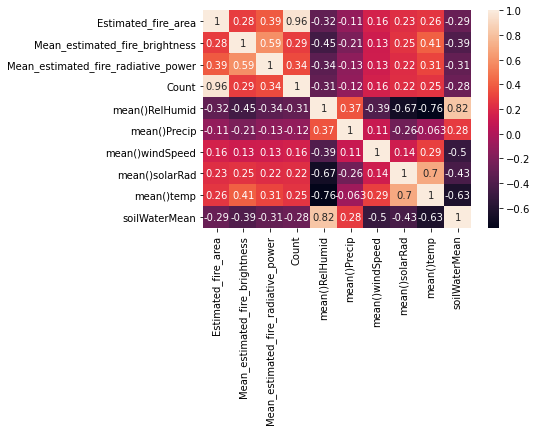

In [151]:
sns.heatmap(df[['Estimated_fire_area','Mean_estimated_fire_brightness','Mean_estimated_fire_radiative_power','Count','mean()RelHumid','mean()Precip','mean()windSpeed','mean()solarRad', 'mean()temp', 'soilWaterMean']].corr(), annot=True )

In [4]:
#we decide to create a model for each region...so we create a dataframe for each region

# NSW

In [153]:
nsw = df.loc[df.Region == "NSW"]

In [154]:
nsw.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,NSW,4.533333,300.483333,28.6,80.333333,1.527525,2.333333,3.0,R,...,1.310407,14.294098,11.804923,7.179963,803768.19762,1.781415,17.923838,10.280841,5.677777,0.301472
1,2015-07-07,NSW,5.390000,307.000000,31.2,82.000000,5.887841,34.666667,4.0,R,...,3.958993,14.775929,12.370152,2.508597,803768.19762,0.099376,16.054276,9.670909,7.388896,0.301472
2,2015-07-08,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,6.651114,14.922725,12.557472,2.167692,803768.19762,-0.059143,15.528275,8.917964,5.448867,0.301472
3,2015-07-09,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,1.350860,14.840615,10.890758,10.691887,803768.19762,4.177390,15.895335,10.853388,3.343773,0.301472
4,2015-07-10,NSW,1.800000,305.100000,29.9,79.000000,NaN,NaN,1.0,R,...,1.358067,13.248702,7.854180,11.847141,803768.19762,2.698585,17.526588,11.332001,5.363875,0.301472


In [155]:
nsw.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min()solarRad', 'max()solarRad',
       'mean()solarRad', 'variance()solarRad', 'count()[unit: km^2]temp',
       'min()temp', 'max()temp', 'mean()temp', 'variance()temp',
       'soilWaterMean'],
      dtype='object')

In [156]:
#lag per estimated_fire area, mean_brightness, mean_radiative_power

In [157]:
nsw["fire_area_lag3"] = nsw.Estimated_fire_area.shift(3)

In [158]:
nsw.head()

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean,fire_area_lag3
0,2015-07-06,NSW,4.533333,300.483333,28.6,80.333333,1.527525,2.333333,3.0,R,...,14.294098,11.804923,7.179963,803768.19762,1.781415,17.923838,10.280841,5.677777,0.301472,NaN
1,2015-07-07,NSW,5.390000,307.000000,31.2,82.000000,5.887841,34.666667,4.0,R,...,14.775929,12.370152,2.508597,803768.19762,0.099376,16.054276,9.670909,7.388896,0.301472,NaN
2,2015-07-08,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,14.922725,12.557472,2.167692,803768.19762,-0.059143,15.528275,8.917964,5.448867,0.301472,NaN
3,2015-07-09,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,14.840615,10.890758,10.691887,803768.19762,4.177390,15.895335,10.853388,3.343773,0.301472,4.533333
4,2015-07-10,NSW,1.800000,305.100000,29.9,79.000000,NaN,NaN,1.0,R,...,13.248702,7.854180,11.847141,803768.19762,2.698585,17.526588,11.332001,5.363875,0.301472,5.390000


In [159]:
nsw["fire_area_mean_5"] = nsw.Estimated_fire_area.shift(3).rolling(5).mean()
nsw["fire_area_mean_10"] = nsw.Estimated_fire_area.shift(3).rolling(10).mean()
nsw["fire_area_mean_15"] = nsw.Estimated_fire_area.shift(3).rolling(15).mean()

In [160]:
nsw.head(30)

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean,fire_area_lag3,fire_area_mean_5,fire_area_mean_10,fire_area_mean_15
0,2015-07-06,NSW,4.533333,300.483333,28.600000,80.333333,1.527525,2.333333,3.0,R,...,803768.19762,1.781415,17.923838,10.280841,5.677777,0.301472,NaN,NaN,NaN,NaN
1,2015-07-07,NSW,5.390000,307.000000,31.200000,82.000000,5.887841,34.666667,4.0,R,...,803768.19762,0.099376,16.054276,9.670909,7.388896,0.301472,NaN,NaN,NaN,NaN
2,2015-07-08,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,-0.059143,15.528275,8.917964,5.448867,0.301472,NaN,NaN,NaN,NaN
3,2015-07-09,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,4.177390,15.895335,10.853388,3.343773,0.301472,4.533333,NaN,NaN,NaN
4,2015-07-10,NSW,1.800000,305.100000,29.900000,79.000000,NaN,NaN,1.0,R,...,803768.19762,2.698585,17.526588,11.332001,5.363875,0.301472,5.390000,NaN,NaN,NaN
5,2015-07-11,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,-2.409632,15.628942,7.771817,7.755012,0.301472,0.000000,NaN,NaN,NaN
6,2015-07-12,NSW,1.000000,302.450000,17.900000,78.000000,NaN,NaN,1.0,R,...,803768.19762,0.775156,12.558673,6.910638,4.538281,0.301472,0.000000,NaN,NaN,NaN
7,2015-07-13,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,0.457024,13.288690,8.096959,4.066573,0.301472,1.800000,2.344667,NaN,NaN
8,2015-07-14,NSW,1.100000,304.100000,19.700000,80.000000,NaN,NaN,1.0,R,...,803768.19762,0.710603,14.038058,8.256251,7.084640,0.301472,0.000000,1.438000,NaN,NaN
9,2015-07-15,NSW,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,803768.19762,0.212046,15.528144,10.026248,8.933202,0.301472,1.000000,0.560000,NaN,NaN


In [161]:
nsw["brightness_lag3"] = nsw.Mean_estimated_fire_brightness.shift(3)
nsw["brightness_mean5"] = nsw.Mean_estimated_fire_brightness.shift(3).rolling(5).mean()
nsw["brightness_mean10"] = nsw.Mean_estimated_fire_brightness.shift(3).rolling(10).mean()
nsw["brightness_mean15"] = nsw.Mean_estimated_fire_brightness.shift(3).rolling(15).mean()

In [162]:
nsw["radiative_power_lag3"] = nsw.Mean_estimated_fire_radiative_power.shift(3)
nsw["radiative_power_mean5"] = nsw.Mean_estimated_fire_radiative_power.shift(3).rolling(5).mean()
nsw["radiative_power_mean10"] = nsw.Mean_estimated_fire_radiative_power.shift(3).rolling(10).mean()
nsw["radiative_power_mean15"] = nsw.Mean_estimated_fire_radiative_power.shift(3).rolling(15).mean()

In [163]:
nsw["count_lag3"] = nsw.Count.shift(3)
nsw["count_mean5"] = nsw.Count.shift(3).rolling(5).mean()
nsw["count_mean10"] = nsw.Count.shift(3).rolling(10).mean()
nsw["count_mean15"] = nsw.Count.shift(3).rolling(15).mean()

In [5]:
#exploring variables distribution...can some transformations be applied to get a more normal distribution?

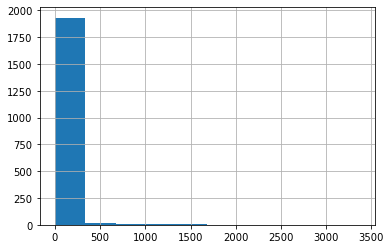

In [164]:
nsw.count_lag3.hist()

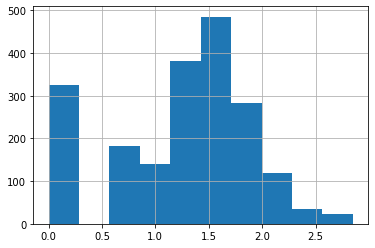

In [165]:
np.sqrt(np.log(nsw.count_lag3+1)).hist()

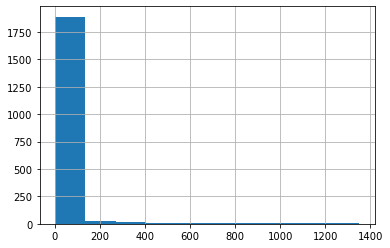

In [166]:
nsw.count_mean5.hist()

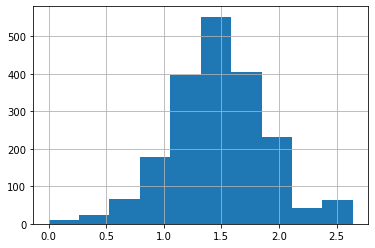

In [167]:
np.sqrt(np.log(nsw.count_mean10+1)).hist()

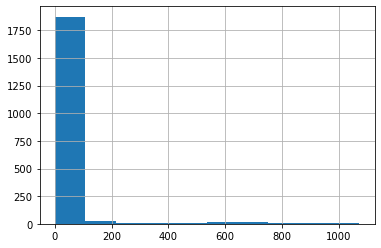

In [168]:
nsw.count_mean10.hist()

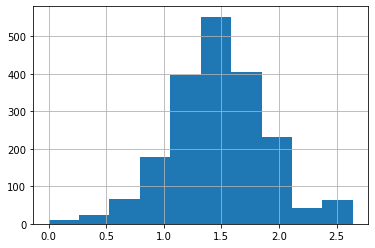

In [169]:
np.sqrt(np.log(nsw.count_mean10+1)).hist()

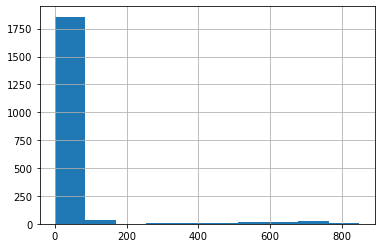

In [170]:
nsw.count_mean15.hist()

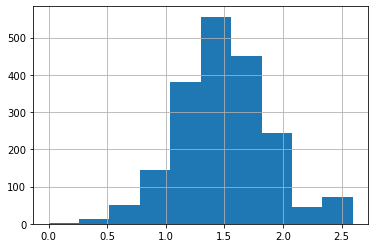

In [171]:
np.sqrt(np.log(nsw.count_mean15+1)).hist()

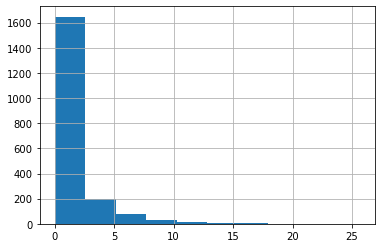

In [172]:
nsw["mean()Precip"].hist()

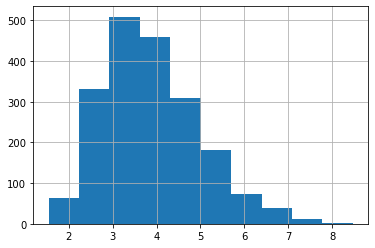

In [173]:
nsw["mean()windSpeed"].hist()

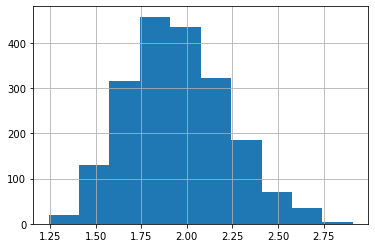

In [174]:
np.sqrt(nsw["mean()windSpeed"]).hist()

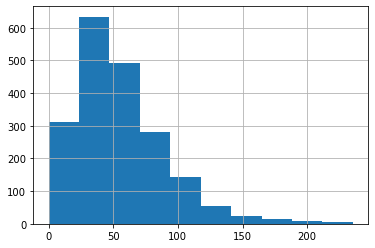

In [175]:
nsw.radiative_power_mean5.hist()

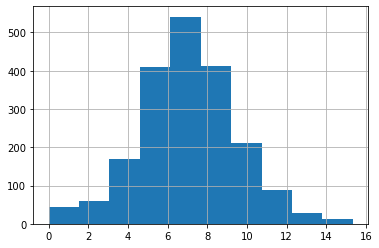

In [176]:
np.sqrt(nsw.radiative_power_mean5).hist()

In [6]:
#apply transformations to get more normal distributed variables

In [177]:
nsw["soilWaterSqrt"] = np.sqrt(nsw.soilWaterMean)
nsw["fire_area_lag3Log"] = np.log(nsw.fire_area_lag3+1)
nsw["fire_area_mean5Log"] = np.log(nsw.fire_area_mean_5+1)
nsw["fire_area_mean10Log"] = np.log(nsw.fire_area_mean_10+1)
nsw["fire_area_mean15Log"] = np.log(nsw.fire_area_mean_15+1)
nsw["radiative_power_lagLog"] = np.log(nsw.radiative_power_lag3+1)
nsw["radiative_power_mean5sqrt"] = np.sqrt(nsw.radiative_power_mean5)
nsw["radiative_power_mean10sqrt"] = np.sqrt(nsw.radiative_power_mean10)
nsw["radiative_power_mean15sqrt"] = np.sqrt(nsw.radiative_power_mean15)
nsw["Precip_log"] = np.log(nsw["mean()Precip"]+1)
nsw["windSpeed_sqrt"] = np.sqrt(nsw["mean()windSpeed"])
nsw["Count_lag3_log_sqrt"] = np.sqrt(np.log(nsw.count_lag3+1))
nsw["Count_mean5_log_sqrt"] = np.sqrt(np.log(nsw.count_mean5+1))
nsw["Count_mean10_log_sqrt"] = np.sqrt(np.log(nsw.count_mean10+1))
nsw["Count_mean15_log_sqrt"] = np.sqrt(np.log(nsw.count_mean15+1))

In [178]:
nsw.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min()solarRad', 'max()solarRad',
       'mean()solarRad', 'variance()solarRad', 'count()[unit: km^2]temp',
       'min()temp', 'max()temp', 'mean()temp', 'variance()temp',
       'soilWaterMean', 'fire_area_lag3', 'fire_area_mean_5',
       'fire_area_mean_10', 'fire_area_mean_15', 'brightness_lag3',
       'brightness_mean5', 'brightness_mean10', 'brightness_

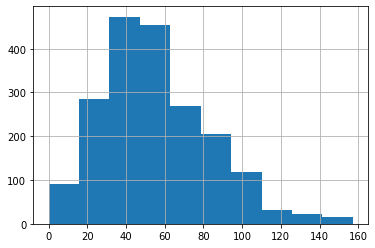

In [179]:
nsw.radiative_power_mean15.hist()

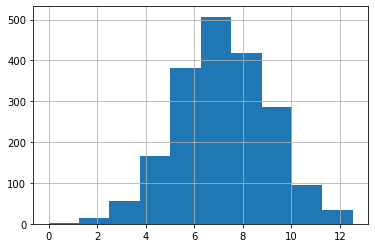

In [180]:
np.sqrt(nsw.radiative_power_mean15).hist()

In [7]:
#we only keep dates from july 2015 since we don't have complete values for earlier dates

In [181]:
nsw = nsw.loc[nsw.Date > "2015-07-22"]

In [182]:
nsw.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min()solarRad', 'max()solarRad',
       'mean()solarRad', 'variance()solarRad', 'count()[unit: km^2]temp',
       'min()temp', 'max()temp', 'mean()temp', 'variance()temp',
       'soilWaterMean', 'fire_area_lag3', 'fire_area_mean_5',
       'fire_area_mean_10', 'fire_area_mean_15', 'brightness_lag3',
       'brightness_mean5', 'brightness_mean10', 'brightness_

In [8]:
#filtering only the variables we will use to train the model

In [183]:
nsw_final = nsw[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]
                
                
                
           
       

In [184]:
nsw_final.isna().sum()

month                         0
mean()Precip                  0
mean()RelHumid                0
mean()windSpeed               0
mean()solarRad                0
mean()temp                    0
soilWaterSqrt                 0
fire_area_lag3Log             0
fire_area_mean5Log            0
fire_area_mean10Log           0
fire_area_mean15Log           0
radiative_power_lagLog        0
radiative_power_mean5sqrt     0
radiative_power_mean10sqrt    0
radiative_power_mean15sqrt    0
Precip_log                    0
windSpeed_sqrt                0
brightness_lag3               0
brightness_mean5              0
brightness_mean10             0
brightness_mean15             0
Count_lag3_log_sqrt           0
Count_mean5_log_sqrt          0
Count_mean10_log_sqrt         0
Count_mean15_log_sqrt         0
dtype: int64

In [9]:
#we standardize variables since they have different scales

In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(nsw_final)
scaled_df = pd.DataFrame(scaler.transform(nsw_final))
scaled_df.columns = nsw_final.columns

scaled_df.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
0,0.082834,-0.216129,2.114523,-1.372779,-1.721083,-0.833439,2.019471,-0.913967,-1.396563,-1.673062,...,0.027336,-1.495610,0.347457,-1.809339,-2.106382,-1.950741,-0.629071,-1.280945,-1.784787,-1.665377
1,0.082834,3.380976,1.682256,-0.384323,-1.488555,-1.160756,2.019471,-0.886502,-1.306383,-1.615385,...,2.725925,-0.332992,0.371011,-1.019417,-1.649257,-1.942654,-0.629071,-1.162238,-1.693330,-1.772267
2,0.082834,-0.540491,1.499550,-0.726301,-1.255503,-0.887003,2.019471,-1.001965,-1.249622,-1.615385,...,-0.804721,-0.711635,0.342318,-0.238086,-1.645918,-1.945112,-0.629071,-1.059995,-1.693330,-1.961595
3,0.082834,-0.517507,1.185673,0.613940,-1.392746,-1.395050,2.019471,-1.412931,-1.249622,-1.615385,...,-0.728885,0.668838,-2.267417,-0.238086,-1.645918,-1.945112,-1.878640,-1.059995,-1.693330,-1.961595
4,0.082834,-0.555102,1.128961,0.044222,-1.003385,-1.821080,2.019471,-1.412931,-1.511247,-1.659342,...,-0.854901,0.113900,-2.267417,-1.039226,-2.097182,-1.945112,-1.878640,-1.595915,-1.784787,-1.961595


In [10]:
#checking standardized variables

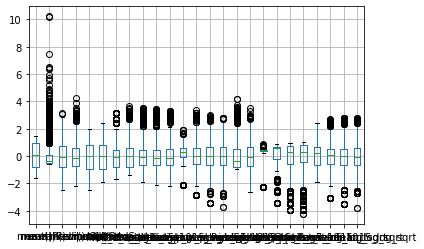

In [186]:
scaled_df.boxplot()

In [11]:
#checking correlations among standardized variables

In [187]:
scaled_df.corr()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
month,1.000000,0.008197,0.017269,0.093171,0.134205,-0.206376,0.093414,-0.116340,-0.139440,-0.145000,...,-0.011077,0.090163,-0.114010,-0.149554,-0.157031,-0.156984,-0.125996,-0.140755,-0.144322,-0.144219
mean()Precip,0.008197,1.000000,0.292532,0.238089,-0.129354,0.070900,0.133279,-0.080661,-0.077244,-0.088801,...,0.908767,0.237148,-0.035539,-0.052535,-0.085012,-0.087804,-0.078787,-0.081605,-0.105287,-0.092962
mean()RelHumid,0.017269,0.292532,1.000000,-0.110096,-0.831153,-0.746021,0.626033,-0.242568,-0.245287,-0.256462,...,0.279836,-0.125879,-0.183945,-0.228395,-0.257191,-0.248510,-0.224359,-0.227393,-0.243597,-0.231127
mean()windSpeed,0.093171,0.238089,-0.110096,1.000000,0.151669,0.139370,-0.187420,0.030491,0.049447,0.039885,...,0.286705,0.995986,0.045395,0.056178,0.045738,0.045050,0.034354,0.057979,0.037746,0.034697
mean()solarRad,0.134205,-0.129354,-0.831153,0.151669,1.000000,0.756772,-0.486261,0.065912,0.072652,0.088490,...,-0.098538,0.174046,0.037061,0.039048,0.048013,0.039065,0.032870,0.033858,0.051436,0.052326
mean()temp,-0.206376,0.070900,-0.746021,0.139370,0.756772,1.000000,-0.500163,0.119089,0.148983,0.156400,...,0.131628,0.162042,0.112470,0.146799,0.157744,0.157060,0.097606,0.113900,0.120904,0.127202
soilWaterSqrt,0.093414,0.133279,0.626033,-0.187420,-0.486261,-0.500163,1.000000,-0.445191,-0.514104,-0.527874,...,0.099323,-0.200471,-0.330855,-0.495771,-0.566105,-0.593729,-0.438891,-0.529266,-0.548574,-0.544010
fire_area_lag3Log,-0.116340,-0.080661,-0.242568,0.030491,0.065912,0.119089,-0.445191,1.000000,0.799870,0.736490,...,-0.084852,0.035059,0.635460,0.561205,0.548266,0.535798,0.938151,0.768517,0.716841,0.687636
fire_area_mean5Log,-0.139440,-0.077244,-0.245287,0.049447,0.072652,0.148983,-0.514104,0.799870,1.000000,0.924459,...,-0.077430,0.052114,0.419446,0.664327,0.664712,0.655890,0.719491,0.963275,0.902031,0.858336
fire_area_mean10Log,-0.145000,-0.088801,-0.256462,0.039885,0.088490,0.156400,-0.527874,0.736490,0.924459,1.000000,...,-0.085900,0.041585,0.354742,0.577151,0.683458,0.694813,0.648599,0.880643,0.976401,0.944477


In [12]:
#we dedice the create a new feature as a linear combinations of the weather variables

In [188]:
scaled_df["score1"] = -0.09*scaled_df['Precip_log'] - 0.30*scaled_df['mean()RelHumid'] + 0.15* scaled_df['windSpeed_sqrt'] + 0.21*scaled_df['mean()solarRad'] + 0.25*scaled_df['mean()temp']





In [189]:
scaled_df.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt,score1
0,0.082834,-0.216129,2.114523,-1.372779,-1.721083,-0.833439,2.019471,-0.913967,-1.396563,-1.673062,...,-1.495610,0.347457,-1.809339,-2.106382,-1.950741,-0.629071,-1.280945,-1.784787,-1.665377,-1.430946
1,0.082834,3.380976,1.682256,-0.384323,-1.488555,-1.160756,2.019471,-0.886502,-1.306383,-1.615385,...,-0.332992,0.371011,-1.019417,-1.649257,-1.942654,-0.629071,-1.162238,-1.693330,-1.772267,-1.402744
2,0.082834,-0.540491,1.499550,-0.726301,-1.255503,-0.887003,2.019471,-1.001965,-1.249622,-1.615385,...,-0.711635,0.342318,-0.238086,-1.645918,-1.945112,-0.629071,-1.059995,-1.693330,-1.961595,-0.969592
3,0.082834,-0.517507,1.185673,0.613940,-1.392746,-1.395050,2.019471,-1.412931,-1.249622,-1.615385,...,0.668838,-2.267417,-0.238086,-1.645918,-1.945112,-1.878640,-1.059995,-1.693330,-1.961595,-0.831016
4,0.082834,-0.555102,1.128961,0.044222,-1.003385,-1.821080,2.019471,-1.412931,-1.511247,-1.659342,...,0.113900,-2.267417,-1.039226,-2.097182,-1.945112,-1.878640,-1.595915,-1.784787,-1.961595,-0.910643


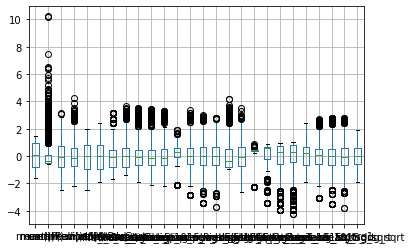

In [190]:
scaled_df.boxplot()

In [191]:
scaled_df.corr()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt,score1
month,1.000000,0.008197,0.017269,0.093171,0.134205,-0.206376,0.093414,-0.116340,-0.139440,-0.145000,...,0.090163,-0.114010,-0.149554,-0.157031,-0.156984,-0.125996,-0.140755,-0.144322,-0.144219,-0.018755
mean()Precip,0.008197,1.000000,0.292532,0.238089,-0.129354,0.070900,0.133279,-0.080661,-0.077244,-0.088801,...,0.237148,-0.035539,-0.052535,-0.085012,-0.087804,-0.078787,-0.081605,-0.105287,-0.092962,-0.191164
mean()RelHumid,0.017269,0.292532,1.000000,-0.110096,-0.831153,-0.746021,0.626033,-0.242568,-0.245287,-0.256462,...,-0.125879,-0.183945,-0.228395,-0.257191,-0.248510,-0.224359,-0.227393,-0.243597,-0.231127,-0.939872
mean()windSpeed,0.093171,0.238089,-0.110096,1.000000,0.151669,0.139370,-0.187420,0.030491,0.049447,0.039885,...,0.995986,0.045395,0.056178,0.045738,0.045050,0.034354,0.057979,0.037746,0.034697,0.297666
mean()solarRad,0.134205,-0.129354,-0.831153,0.151669,1.000000,0.756772,-0.486261,0.065912,0.072652,0.088490,...,0.174046,0.037061,0.039048,0.048013,0.039065,0.032870,0.033858,0.051436,0.052326,0.911080
mean()temp,-0.206376,0.070900,-0.746021,0.139370,0.756772,1.000000,-0.500163,0.119089,0.148983,0.156400,...,0.162042,0.112470,0.146799,0.157744,0.157060,0.097606,0.113900,0.120904,0.127202,0.859994
soilWaterSqrt,0.093414,0.133279,0.626033,-0.187420,-0.486261,-0.500163,1.000000,-0.445191,-0.514104,-0.527874,...,-0.200471,-0.330855,-0.495771,-0.566105,-0.593729,-0.438891,-0.529266,-0.548574,-0.544010,-0.605119
fire_area_lag3Log,-0.116340,-0.080661,-0.242568,0.030491,0.065912,0.119089,-0.445191,1.000000,0.799870,0.736490,...,0.035059,0.635460,0.561205,0.548266,0.535798,0.938151,0.768517,0.716841,0.687636,0.172321
fire_area_mean5Log,-0.139440,-0.077244,-0.245287,0.049447,0.072652,0.148983,-0.514104,0.799870,1.000000,0.924459,...,0.052114,0.419446,0.664327,0.664712,0.655890,0.719491,0.963275,0.902031,0.858336,0.187777
fire_area_mean10Log,-0.145000,-0.088801,-0.256462,0.039885,0.088490,0.156400,-0.527874,0.736490,0.924459,1.000000,...,0.041585,0.354742,0.577151,0.683458,0.694813,0.648599,0.880643,0.976401,0.944477,0.198061


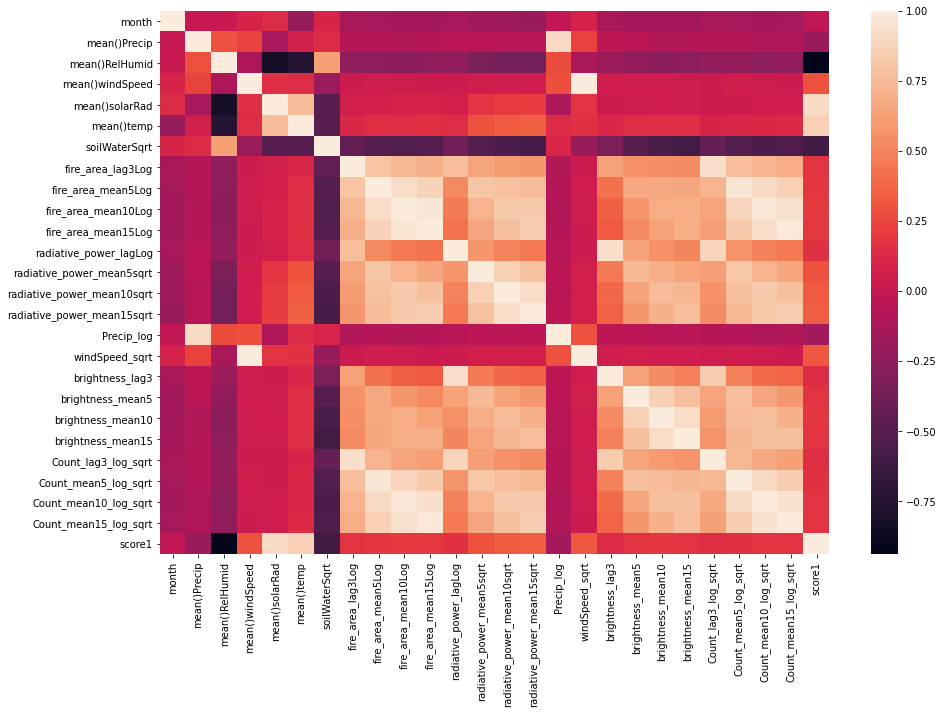

In [192]:
plt.figure(figsize=(15,10))
sns.heatmap(scaled_df.corr())

In [193]:
nsw.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min()solarRad', 'max()solarRad',
       'mean()solarRad', 'variance()solarRad', 'count()[unit: km^2]temp',
       'min()temp', 'max()temp', 'mean()temp', 'variance()temp',
       'soilWaterMean', 'fire_area_lag3', 'fire_area_mean_5',
       'fire_area_mean_10', 'fire_area_mean_15', 'brightness_lag3',
       'brightness_mean5', 'brightness_mean10', 'brightness_

In [195]:
y_NSW = nsw.loc[nsw.Date > "2015-07-22"].Estimated_fire_area

In [196]:
y_NSW.mean()

64.60584262118005

In [13]:
#we filter the feature that will be used to train the model

In [197]:
X_NSW = scaled_df[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [14]:
#we split the dataset into train and test

In [198]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_NSW, y_NSW, 
                                                    test_size =0.20, #by default is 80%-20%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(1568, 15) (393, 15)


In [15]:
#below the algortihm with which we got the best results

In [199]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_NSW = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[100,110,120], "learning_rate":[0.1,0.3,0.5,1,2], 
              "loss": ['ls', 'lad'], "random_state" : [42] ,
             "max_depth":[3,4], }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs_NSW = GridSearchCV(regressor_NSW, parameters, cv=3) 

gs_NSW = gs_NSW.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_NSW.best_score_, gs_NSW.best_params_))
means = gs_NSW.cv_results_['mean_test_score']
stds = gs_NSW.cv_results_['std_test_score']
params = gs_NSW.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_NSW.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.359415 using {'learning_rate': 0.5, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 110, 'random_state': 42}
0.269708 (0.073086) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
0.267381 (0.075125) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 110, 'random_state': 42}
0.268826 (0.075350) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 120, 'random_state': 42}
0.090243 (0.138768) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'n_estimators': 100, 'random_state': 42}
0.090495 (0.138557) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'n_estimators': 110, 'random_state': 42}
0.090906 (0.137931) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'n_estimators': 120, 'random_state': 42}
0.277165 (0.077762) with: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
0.283015 (0.

0.7707096149400332

In [200]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs_NSW.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs_NSW.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs_NSW.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs_NSW.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs_NSW.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs_NSW.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs_NSW.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs_NSW.predict(X_test))))

MAE train:  30.644187857853435
MSE train:  35452.734525296066
RMSE train:  188.2889654900044
r2:  0.7211015165225316
MAE test:  44.216071004981885
MSE test:  24910.47419374989
RMSE test:  157.83052364403375
r2:  0.877900686262423


In [ ]:
tot = 0.80 * mae + 0.2 * rmse

In [203]:
predictions_NSW = gs_NSW.predict(X_test)

In [205]:
pred_df = pd.DataFrame({'Actual':y_test, 'Pred':predictions_NSW}) 
pred_df.head()

,Actual,Pred
1376,21.754286,9.402386
1304,4.783333,17.649585
795,3.105000,13.618677
1837,14.217500,1.298315
773,47.107407,26.519266


In [16]:
#we perform feature importance....how does the algorithm makes decisions?

In [482]:
!pip install shap

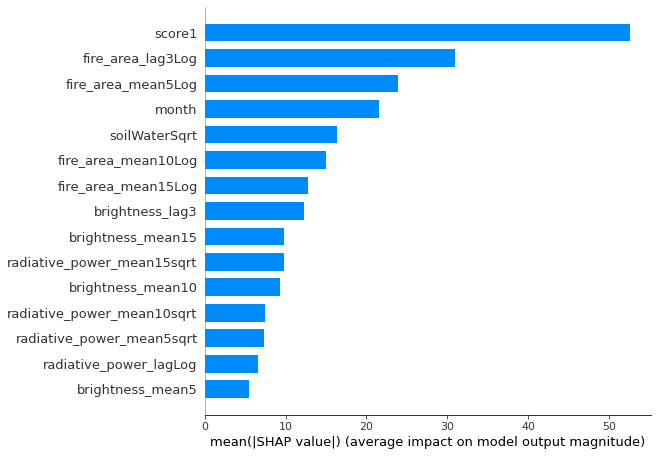

In [485]:
df_X_train=pd.DataFrame(X_train)
import shap 
gs_NSW = GradientBoostingRegressor(n_estimators=110, max_depth= 3,
              learning_rate= 0.5, loss='ls', random_state= 42, )
gs_NSW.fit(X_train,y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(gs_NSW)
shap_values = explainer(df_X_train)


 

explainer_rf = shap.TreeExplainer(gs_NSW,categorical_features=scaled_df)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")


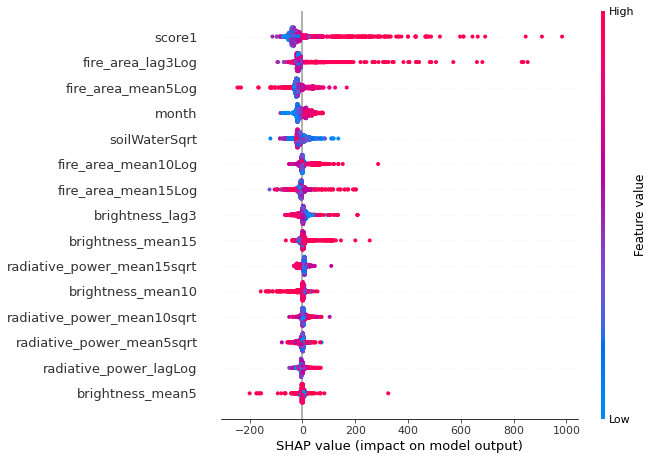

In [486]:
shap.summary_plot(shap_values, df_X_train)

# CREATING DATAFRAME FOR THE OTHER REGIONS

we now create a dataframe for each region and perform the same steps previously expalined in terms of preprocessing and model creation...for more information check lines of code above with explantation of each step

In [206]:
lista = ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']

for i in range(7):
    index = i
    lista[index] = df.loc[df.Region == str(lista[index])]
    lista[index]["fire_area_lag3"] = lista[index].Estimated_fire_area.shift(3)
    lista[index]["fire_area_mean_5"] = lista[index].Estimated_fire_area.shift(3).rolling(5).mean()
    lista[index]["fire_area_mean_10"] = lista[index].Estimated_fire_area.shift(3).rolling(10).mean()
    lista[index]["fire_area_mean_15"] = lista[index].Estimated_fire_area.shift(3).rolling(15).mean()
    lista[index]["brightness_lag3"] = lista[index].Mean_estimated_fire_brightness.shift(3)
    lista[index]["brightness_mean5"] = lista[index].Mean_estimated_fire_brightness.shift(3).rolling(5).mean()
    lista[index]["brightness_mean10"] = lista[index].Mean_estimated_fire_brightness.shift(3).rolling(10).mean()
    lista[index]["brightness_mean15"] = lista[index].Mean_estimated_fire_brightness.shift(3).rolling(15).mean()
    lista[index]["radiative_power_lag3"] = lista[index].Mean_estimated_fire_radiative_power.shift(3)
    lista[index]["radiative_power_mean5"] = lista[index].Mean_estimated_fire_radiative_power.shift(3).rolling(5).mean()
    lista[index]["radiative_power_mean10"] = lista[index].Mean_estimated_fire_radiative_power.shift(3).rolling(10).mean()
    lista[index]["radiative_power_mean15"] = lista[index].Mean_estimated_fire_radiative_power.shift(3).rolling(15).mean()
    lista[index]["count_lag3"] = lista[index].Count.shift(3)
    lista[index]["count_mean5"] = lista[index].Count.shift(3).rolling(5).mean()
    lista[index]["count_mean10"] = lista[index].Count.shift(3).rolling(10).mean()
    lista[index]["count_mean15"] = lista[index].Count.shift(3).rolling(15).mean()
    

In [207]:
NT = lista[1]
QL = lista[2]
SA = lista[3]
TA = lista[4]
VI = lista[5]
WA = lista[6]


# NT

In [208]:
NT["soilWaterSqrt"] = np.sqrt(NT.soilWaterMean)
NT["fire_area_lag3Log"] = np.log(NT.fire_area_lag3+1)
NT["fire_area_mean5Log"] = np.log(NT.fire_area_mean_5+1)
NT["fire_area_mean10Log"] = np.log(NT.fire_area_mean_10+1)
NT["fire_area_mean15Log"] = np.log(NT.fire_area_mean_15+1)
NT["radiative_power_lagLog"] = np.log(NT.radiative_power_lag3+1)
NT["radiative_power_mean5sqrt"] = np.sqrt(NT.radiative_power_mean5)
NT["radiative_power_mean10sqrt"] = np.sqrt(NT.radiative_power_mean10)
NT["radiative_power_mean15sqrt"] = np.sqrt(NT.radiative_power_mean15)
NT["Precip_log"] = np.log(NT["mean()Precip"]+1)
NT["windSpeed_sqrt"] = np.sqrt(NT["mean()windSpeed"])
NT["Count_lag3_log_sqrt"] = np.sqrt(np.log(NT.count_lag3+1))
NT["Count_mean5_log_sqrt"] = np.sqrt(np.log(NT.count_mean5+1))
NT["Count_mean10_log_sqrt"] = np.sqrt(np.log(NT.count_mean10+1))
NT["Count_mean15_log_sqrt"] = np.sqrt(np.log(NT.count_mean15+1))

In [209]:
NT = NT.loc[NT.Date > "2015-07-22"]

In [210]:
NT_final = NT[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [211]:
NT_final.isna().sum()

month                         0
mean()Precip                  0
mean()RelHumid                0
mean()windSpeed               0
mean()solarRad                0
mean()temp                    0
soilWaterSqrt                 0
fire_area_lag3Log             0
fire_area_mean5Log            0
fire_area_mean10Log           0
fire_area_mean15Log           0
radiative_power_lagLog        0
radiative_power_mean5sqrt     0
radiative_power_mean10sqrt    0
radiative_power_mean15sqrt    0
Precip_log                    0
windSpeed_sqrt                0
brightness_lag3               0
brightness_mean5              0
brightness_mean10             0
brightness_mean15             0
Count_lag3_log_sqrt           0
Count_mean5_log_sqrt          0
Count_mean10_log_sqrt         0
Count_mean15_log_sqrt         0
dtype: int64

In [212]:
from sklearn.preprocessing import StandardScaler

scaler_NT = StandardScaler().fit(NT_final)
scaled_NT = pd.DataFrame(scaler_NT.transform(NT_final))
scaled_NT.columns = NT_final.columns

scaled_NT.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
0,0.083099,-0.325449,0.148374,-1.648044,-1.339159,-0.855081,-0.696511,0.860409,0.520963,0.650054,...,-0.146110,-1.814365,0.357251,0.410051,0.438244,0.449633,0.808388,0.584680,0.682355,0.622371
1,0.083099,-0.533019,0.989455,0.210233,-1.226349,-1.020145,-0.696511,0.875099,0.624582,0.620603,...,-0.732018,0.266144,0.427566,0.422978,0.441901,0.457799,0.700690,0.616826,0.609135,0.642872
2,0.083099,-0.525182,1.055242,-1.138984,-0.987222,-0.635322,-0.696511,0.934977,0.740822,0.674257,...,-0.704780,-1.190347,0.357675,0.440595,0.447299,0.460679,0.797808,0.691350,0.652187,0.674906
3,0.083099,-0.501091,1.077425,1.519892,-1.130813,-1.040742,-0.696511,0.795144,0.774144,0.653861,...,-0.624242,1.491418,0.403622,0.449791,0.456331,0.469164,0.711466,0.687097,0.620527,0.683754
4,0.083099,-0.537055,0.450448,2.766733,-1.242791,-1.578789,-0.696511,0.780126,0.836878,0.668915,...,-0.746256,2.539460,0.369492,0.472989,0.461192,0.469537,0.713572,0.738683,0.648286,0.679795


In [213]:
scaled_NT["score1"] = -0.09*scaled_NT['Precip_log'] - 0.30*scaled_NT['mean()RelHumid'] + 0.15* scaled_NT['windSpeed_sqrt'] + 0.21*scaled_NT['mean()solarRad'] + 0.25*scaled_NT['mean()temp']




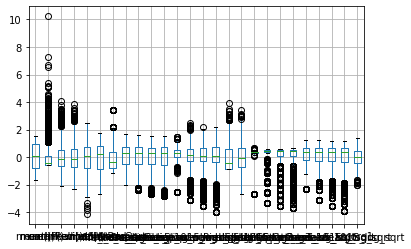

In [214]:
scaled_NT.boxplot()

In [215]:
y_NT = NT.loc[NT.Date > "2015-07-22"].Estimated_fire_area

In [216]:
y_NT.mean()

176.8399974097369

In [217]:
X_NT = scaled_NT[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [218]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_NT, y_NT, 
                                                    test_size =0.20, #by default is 80%-20%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(1569, 15) (393, 15)


In [219]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [528]:
X_train, X_test, y_train, y_test = train_test_split(X_NT, y_NT, train_size=0.75, test_size=0.25, random_state=1)
    
# this will later be applied in the light14 df (which will has already included the cloud values by hour) 
# in a new column ("values of natural light")
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs3_NT = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs3_NT.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

# find the optimal parameters 
model = XGBRegressor()
param_grid = {
    'n_estimators': [100,110,120],
    'colsample_bytree': [0.5, 0.6],
    'max_depth': [ 2,3,4,5,6],
    'reg_alpha': [1.7],
    'reg_lambda': [1.0],
    'subsample': [0.5],
    "learning_rate" : [0.01]
}

model_NT, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=7)

Fitting 7 folds for each of 30 candidates, totalling 210 fits


In [221]:
print(np.sqrt(-model_NT.best_score_))
print(model_NT.best_params_)

168.75570915970195
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 120, 'reg_alpha': 1.7, 'reg_lambda': 1.0, 'subsample': 0.5}


In [455]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, model_NT.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, model_NT.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, model_NT.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, model_NT.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, model_NT.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, model_NT.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, model_NT.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, model_NT.predict(X_test))))

MAE train:  73.56543837109871
MSE train:  22103.97176282547
RMSE train:  148.67404535703423
r2:  0.6381843829908884
MAE test:  58.85940536108696
MSE test:  9079.15202313635
RMSE test:  95.28458439399498
r2:  0.6334210110965861


In [223]:
predictions_NT = model_NT.predict(X_test)

In [225]:
pred_df_NT = pd.DataFrame({'Actual':y_test, 'Pred':predictions_NT}) 
pred_df.head(25).max()

Actual    1207.057173
Pred       442.293610
dtype: float64

(array([1750., 2000., 2250., 2500., 2750., 3000., 3250., 3500., 3750.,
        4000., 4250.]),
 <a list of 11 Text major ticklabel objects>)

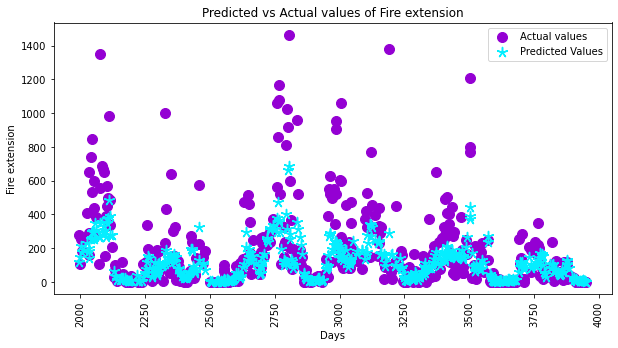

In [227]:
plt.figure(figsize=(10,5))
plt.scatter(pred_df_NT.index.values, pred_df_NT["Actual"],label="Actual values", s=100, color = "#9400D3", marker='o')
plt.scatter(pred_df_NT.index.values, pred_df_NT["Pred"],label="Predicted Values", s=100, color = "#05eeff", marker=(5, 2))
plt.legend()
plt.xlabel("Days")
plt.ylabel('Fire extension')
plt.title("Predicted vs Actual values of Fire extension")
plt.xticks(rotation=90)

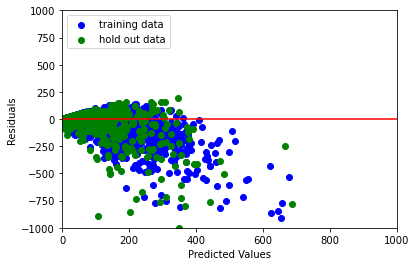

In [228]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(model_NT.predict(X_train),model_NT.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(model_NT.predict(X_test),model_NT.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=2000, color="r")
plt.xlim([0,1000])
plt.ylim([-1000,1000])
plt.show()

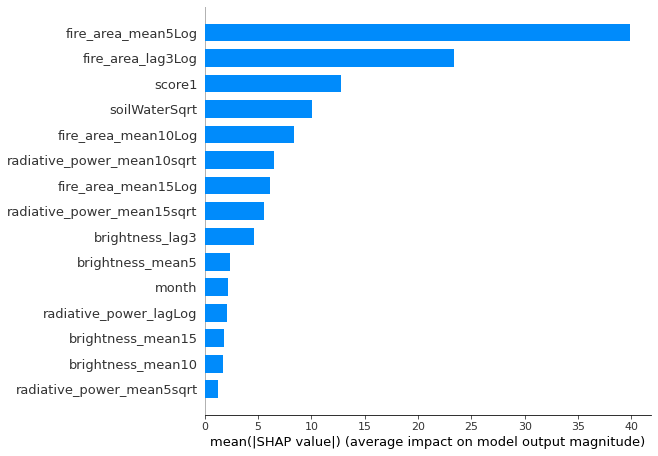

In [529]:
df_X_train=pd.DataFrame(X_train)

Xgs_NT = XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.01, max_depth=6, n_estimators= 120, reg_alpha= 1.7, reg_lambda= 1.0, subsample= 0.5)
Xgs_NT.fit(X_train,y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(Xgs_NT)
shap_values = explainer(X_train)




explainer_rf = shap.TreeExplainer(Xgs_NT,categorical_features=scaled_NT)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")

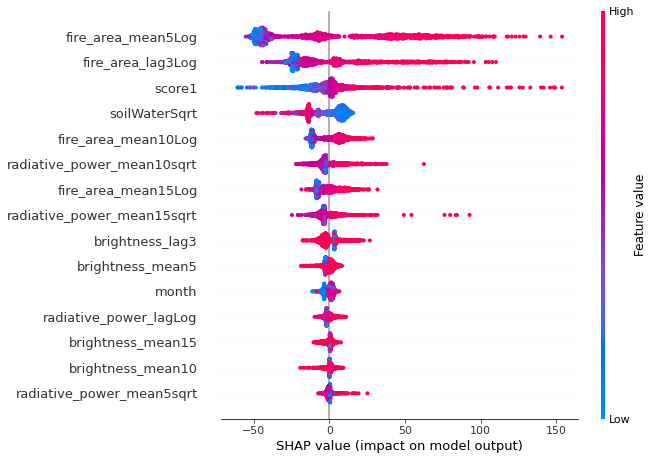

In [530]:
shap.summary_plot(shap_values, df_X_train)

# SA

In [230]:
SA["soilWaterSqrt"] = np.sqrt(SA.soilWaterMean)
SA["fire_area_lag3Log"] = np.log(SA.fire_area_lag3+1)
SA["fire_area_mean5Log"] = np.log(SA.fire_area_mean_5+1)
SA["fire_area_mean10Log"] = np.log(SA.fire_area_mean_10+1)
SA["fire_area_mean15Log"] = np.log(SA.fire_area_mean_15+1)
SA["radiative_power_lagLog"] = np.log(SA.radiative_power_lag3+1)
SA["radiative_power_mean5sqrt"] = np.sqrt(SA.radiative_power_mean5)
SA["radiative_power_mean10sqrt"] = np.sqrt(SA.radiative_power_mean10)
SA["radiative_power_mean15sqrt"] = np.sqrt(SA.radiative_power_mean15)
SA["Precip_log"] = np.log(SA["mean()Precip"]+1)
SA["windSpeed_sqrt"] = np.sqrt(SA["mean()windSpeed"])
SA["Count_lag3_log_sqrt"] = np.sqrt(np.log(SA.count_lag3+1))
SA["Count_mean5_log_sqrt"] = np.sqrt(np.log(SA.count_mean5+1))
SA["Count_mean10_log_sqrt"] = np.sqrt(np.log(SA.count_mean10+1))
SA["Count_mean15_log_sqrt"] = np.sqrt(np.log(SA.count_mean15+1))

In [231]:
SA = SA.loc[SA.Date > "2015-07-22"]

In [232]:
SA_final = SA[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [233]:
SA_final.isna().sum()

month                         0
mean()Precip                  0
mean()RelHumid                0
mean()windSpeed               0
mean()solarRad                0
mean()temp                    0
soilWaterSqrt                 0
fire_area_lag3Log             0
fire_area_mean5Log            0
fire_area_mean10Log           0
fire_area_mean15Log           0
radiative_power_lagLog        0
radiative_power_mean5sqrt     0
radiative_power_mean10sqrt    0
radiative_power_mean15sqrt    0
Precip_log                    0
windSpeed_sqrt                0
brightness_lag3               0
brightness_mean5              0
brightness_mean10             0
brightness_mean15             0
Count_lag3_log_sqrt           0
Count_mean5_log_sqrt          0
Count_mean10_log_sqrt         0
Count_mean15_log_sqrt         0
dtype: int64

In [234]:
from sklearn.preprocessing import StandardScaler

scaler_SA = StandardScaler().fit(SA_final)
scaled_SA = pd.DataFrame(scaler_SA.transform(SA_final))
scaled_SA.columns = SA_final.columns

scaled_SA.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
0,0.082834,0.531160,1.049690,-0.743913,-1.511113,-1.110714,0.887634,-0.089415,-0.767915,-0.977951,...,1.080636,-0.728327,1.351215,-0.429878,-0.832027,-1.028561,0.579229,-0.461633,-0.884018,-1.135712
1,0.082834,0.686974,1.408880,-1.000451,-1.481956,-1.387872,0.887634,-0.596079,-0.767915,-0.977951,...,1.263537,-1.021982,-0.708323,-0.429878,-0.832027,-1.028561,-0.668521,-0.461633,-0.884018,-1.135712
2,0.082834,0.715934,2.004470,-0.307608,-1.800726,-1.191832,0.887634,-0.596079,-0.767915,-0.977951,...,1.295928,-0.254577,-0.708323,-0.429878,-0.832027,-1.028561,-0.668521,-0.461633,-0.884018,-1.135712
3,0.082834,0.004378,1.612271,0.574950,-1.709095,-1.649678,0.887634,0.847912,-0.231432,-0.629043,...,0.318904,0.624097,1.348091,0.167546,-0.490179,-0.780313,1.232785,0.191546,-0.311394,-0.616290
4,0.082834,-0.430723,1.371599,-0.498336,-1.167889,-1.702528,0.887634,-0.596079,-0.231432,-0.629043,...,-0.597959,-0.457989,-0.708323,0.167546,-0.490179,-0.780313,-0.668521,0.191546,-0.311394,-0.616290


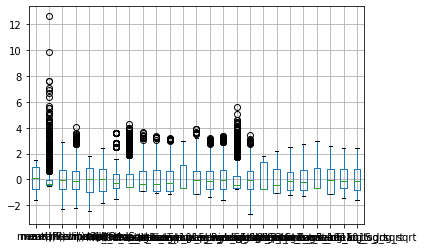

In [235]:
scaled_SA.boxplot()

In [236]:
scaled_SA["score1"] = -0.09*scaled_SA['Precip_log'] - 0.30*scaled_SA['mean()RelHumid'] + 0.15* scaled_SA['windSpeed_sqrt'] + 0.21*scaled_SA['mean()solarRad'] + 0.25*scaled_SA['mean()temp']

In [237]:
y_SA = SA.loc[SA.Date > "2015-07-22"].Estimated_fire_area

In [238]:
y_SA.mean()

9.753000395306481

In [239]:
X_SA = scaled_SA[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [240]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_SA, y_SA, 
                                                    test_size =0.20, #by default is 80%-20%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(1568, 15) (393, 15)


In [241]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_SA = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[100,110,120], "learning_rate":[0.1,0.3,0.5,1,2], 
              "loss": ['ls', 'lad'], "random_state" : [42] ,
             "max_depth":[2,3], }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs_SA = GridSearchCV(regressor_SA, parameters, cv=3) 

gs_SA = gs_SA.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_SA.best_score_, gs_SA.best_params_))
means = gs_SA.cv_results_['mean_test_score']
stds = gs_SA.cv_results_['std_test_score']
params = gs_SA.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_SA.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.080655 using {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 110, 'random_state': 42}
0.078551 (0.024221) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 100, 'random_state': 42}
0.080655 (0.023695) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 110, 'random_state': 42}
0.071126 (0.033168) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 120, 'random_state': 42}
0.037436 (0.067934) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
0.032482 (0.062848) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 110, 'random_state': 42}
0.028822 (0.061185) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 120, 'random_state': 42}
-0.018451 (0.033329) with: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 2, 'n_estimators': 100, 'random_state': 42}
-0.018443 (0

0.48136727310834915

In [250]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs_SA.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs_SA.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs_SA.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs_SA.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs_SA.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs_SA.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs_SA.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs_SA.predict(X_test))))

MAE train:  8.669172413075602
MSE train:  417.8153213688795
RMSE train:  20.440531337733848
r2:  0.8182915961893847
MAE test:  13.988723203330503
MSE test:  1656.417796692946
RMSE test:  40.699112971819744
r2:  0.6938063657162199


In [251]:
predictions_SA = gs_SA.predict(X_test)

In [252]:
pred_df_SA = pd.DataFrame({'Actual':y_test, 'Pred':predictions_SA}) 
pred_df.min()

Actual    0.000000
Pred      2.200995
dtype: float64

(array([5750., 6000., 6250., 6500., 6750., 7000., 7250., 7500., 7750.,
        8000., 8250.]),
 <a list of 11 Text major ticklabel objects>)

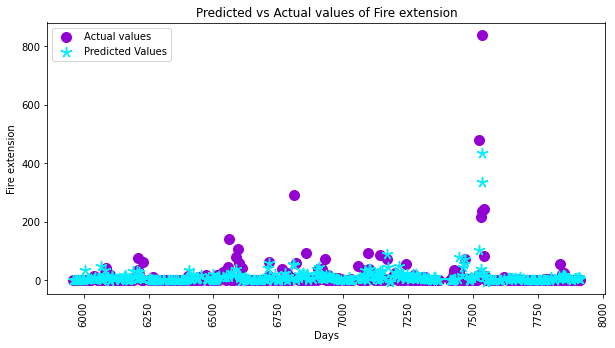

In [254]:
plt.figure(figsize=(10,5))
plt.scatter(pred_df_SA.index.values, pred_df_SA["Actual"],label="Actual values", s=100, color = "#9400D3", marker='o')
plt.scatter(pred_df_SA.index.values, pred_df_SA["Pred"],label="Predicted Values", s=100, color = "#05eeff", marker=(5, 2))
plt.legend()
plt.xlabel("Days")
plt.ylabel('Fire extension')
plt.title("Predicted vs Actual values of Fire extension")
plt.xticks(rotation=90)

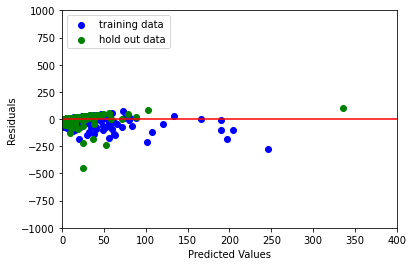

In [255]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs_SA.predict(X_train),gs_SA.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs_SA.predict(X_test),gs_SA.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=2000, color="r")
plt.xlim([0,400])
plt.ylim([-1000,1000])
plt.show()

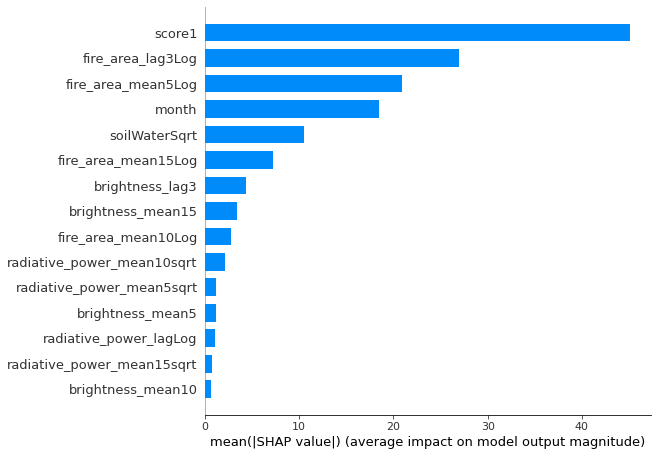

In [491]:
df_X_train=pd.DataFrame(X_train)

gs_SA = GradientBoostingRegressor(n_estimators=110, max_depth= 2,
              learning_rate= 0.1, loss='ls', random_state= 42, )
gs_SA.fit(X_train,y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(gs_SA)
shap_values = explainer(X_train)


import shap  

explainer_rf = shap.TreeExplainer(gs_SA,categorical_features=scaled_SA)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")

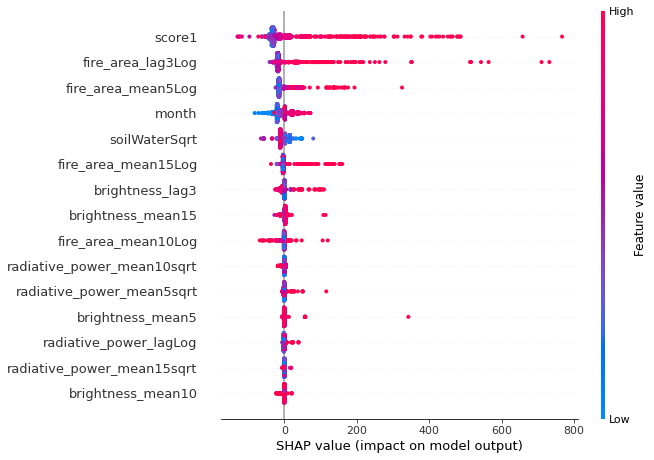

In [492]:
shap.summary_plot(shap_values, df_X_train)

# TA

In [256]:
TA["soilWaterSqrt"] = np.sqrt(TA.soilWaterMean)
TA["fire_area_lag3Log"] = np.log(TA.fire_area_lag3+1)
TA["fire_area_mean5Log"] = np.log(TA.fire_area_mean_5+1)
TA["fire_area_mean10Log"] = np.log(TA.fire_area_mean_10+1)
TA["fire_area_mean15Log"] = np.log(TA.fire_area_mean_15+1)
TA["radiative_power_lagLog"] = np.log(TA.radiative_power_lag3+1)
TA["radiative_power_mean5sqrt"] = np.sqrt(TA.radiative_power_mean5)
TA["radiative_power_mean10sqrt"] = np.sqrt(TA.radiative_power_mean10)
TA["radiative_power_mean15sqrt"] = np.sqrt(TA.radiative_power_mean15)
TA["Precip_log"] = np.log(TA["mean()Precip"]+1)
TA["windSpeed_sqrt"] = np.sqrt(TA["mean()windSpeed"])
TA["Count_lag3_log_sqrt"] = np.sqrt(np.log(TA.count_lag3+1))
TA["Count_mean5_log_sqrt"] = np.sqrt(np.log(TA.count_mean5+1))
TA["Count_mean10_log_sqrt"] = np.sqrt(np.log(TA.count_mean10+1))
TA["Count_mean15_log_sqrt"] = np.sqrt(np.log(TA.count_mean15+1))

In [257]:
TA = TA.loc[TA.Date > "2015-07-22"]

In [258]:
TA_final = TA[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [259]:
TA_final.isna().sum()

month                         0
mean()Precip                  0
mean()RelHumid                0
mean()windSpeed               0
mean()solarRad                0
mean()temp                    0
soilWaterSqrt                 0
fire_area_lag3Log             0
fire_area_mean5Log            0
fire_area_mean10Log           0
fire_area_mean15Log           0
radiative_power_lagLog        0
radiative_power_mean5sqrt     0
radiative_power_mean10sqrt    0
radiative_power_mean15sqrt    0
Precip_log                    0
windSpeed_sqrt                0
brightness_lag3               0
brightness_mean5              0
brightness_mean10             0
brightness_mean15             0
Count_lag3_log_sqrt           0
Count_mean5_log_sqrt          0
Count_mean10_log_sqrt         0
Count_mean15_log_sqrt         0
dtype: int64

In [260]:
from sklearn.preprocessing import StandardScaler

scaler_TA = StandardScaler().fit(TA_final)
scaled_TA = pd.DataFrame(scaler_TA.transform(TA_final))
scaled_TA.columns = TA_final.columns

scaled_TA.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
0,0.082834,0.670548,0.914958,0.464550,-0.947229,-0.763972,0.779117,-0.464722,-0.696724,-0.810224,...,1.145924,0.564534,-0.564265,-0.868477,-1.005606,-1.088134,-0.533301,-0.961294,-1.198659,-1.357552
1,0.082834,1.220564,0.760607,1.078467,-1.121075,-0.971154,0.779117,-0.464722,-0.696724,-0.810224,...,1.498252,1.115701,-0.564265,-0.868477,-1.005606,-1.088134,-0.533301,-0.961294,-1.198659,-1.357552
2,0.082834,2.454756,0.419554,2.919997,-0.927181,-0.535999,0.779117,-0.464722,-0.696724,-0.810224,...,2.035667,2.520414,-0.564265,-0.868477,-1.005606,-1.088134,-0.533301,-0.961294,-1.198659,-1.357552
3,0.082834,0.257792,0.139308,1.654183,-0.909213,-1.782932,0.779117,-0.464722,-0.696724,-0.810224,...,0.787510,1.588735,-0.564265,-0.868477,-1.005606,-1.088134,-0.533301,-0.961294,-1.198659,-1.357552
4,0.082834,-0.360175,0.603886,0.617681,-1.103992,-1.445584,0.779117,-0.464722,-0.696724,-0.810224,...,-0.113881,0.707288,-0.564265,-0.868477,-1.005606,-1.088134,-0.533301,-0.961294,-1.198659,-1.357552


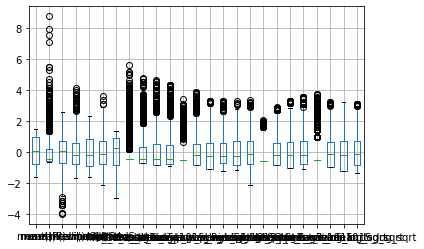

In [261]:
scaled_TA.boxplot()

In [262]:
scaled_TA["score1"] = -0.09*scaled_TA['Precip_log'] - 0.30*scaled_TA['mean()RelHumid'] + 0.15* scaled_TA['windSpeed_sqrt']

In [263]:
y_TA = TA.loc[TA.Date > "2015-07-22"].Estimated_fire_area

In [264]:
y_TA.mean()

4.130993475359001

In [265]:
X_TA = scaled_TA[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [266]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_TA, y_TA, 
                                                    test_size =0.20, #by default is 80%-20%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(1568, 15) (393, 15)


In [267]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_TA = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[100,110,120], "learning_rate":[0.1,0.3,0.5,1,2], 
              "loss": ['ls', 'lad'], "random_state" : [42] ,
             "max_depth":[2,3], }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs_TA = GridSearchCV(regressor_TA, parameters, cv=3) 

gs_TA = gs_TA.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_TA.best_score_, gs_TA.best_params_))
means = gs_TA.cv_results_['mean_test_score']
stds = gs_TA.cv_results_['std_test_score']
params = gs_TA.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_TA.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.109704 using {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 120, 'random_state': 42}
-0.128084 (0.591706) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 100, 'random_state': 42}
-0.114191 (0.586633) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 110, 'random_state': 42}
-0.108042 (0.581941) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 120, 'random_state': 42}
-0.064869 (0.425572) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
-0.066260 (0.427888) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 110, 'random_state': 42}
-0.067386 (0.429288) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 120, 'random_state': 42}
0.041056 (0.037207) with: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 2, 'n_estimators': 100, 'random_state': 42}
0.0410

0.1400275918866689

In [268]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs_TA.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs_TA.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs_TA.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs_TA.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs_TA.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs_TA.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs_TA.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs_TA.predict(X_test))))

MAE train:  4.031143750419471
MSE train:  489.8393718039134
RMSE train:  22.132315102670876
r2:  0.3486131228078039
MAE test:  2.8667420419479077
MSE test:  121.1794991232233
RMSE test:  11.008156027383665
r2:  0.37420260807037264


In [269]:
predictions_TA = gs_TA.predict(X_test)

In [271]:
pred_df_TA = pd.DataFrame({'Actual':y_test, 'Pred':predictions_TA}) 
pred_df.head(50)

,Actual,Pred
2115,336.701486,277.164032
2618,58.140000,32.322571
3663,2.200000,4.154703
3520,98.181774,86.148178
3912,0.000000,15.093009
3589,0.000000,10.197479
2703,266.097344,119.437706
3329,58.225000,53.162540
3439,54.039524,164.589310
3503,1207.057173,442.293610


(array([ 7750.,  8000.,  8250.,  8500.,  8750.,  9000.,  9250.,  9500.,
         9750., 10000.]),
 <a list of 10 Text major ticklabel objects>)

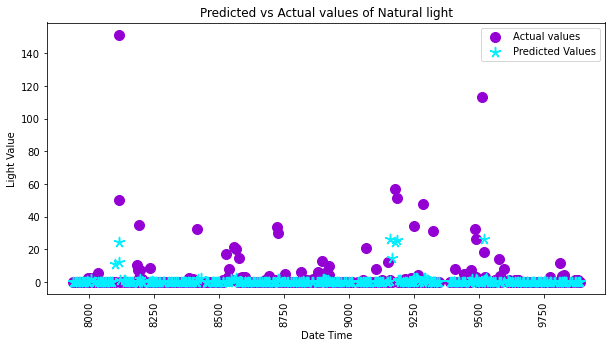

In [272]:
plt.figure(figsize=(10,5))
plt.scatter(pred_df_TA.index.values, pred_df_TA["Actual"],label="Actual values", s=100, color = "#9400D3", marker='o')
plt.scatter(pred_df_TA.index.values, pred_df_TA["Pred"],label="Predicted Values", s=100, color = "#05eeff", marker=(5, 2))
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Light Value')
plt.title("Predicted vs Actual values of Natural light")
plt.xticks(rotation=90)

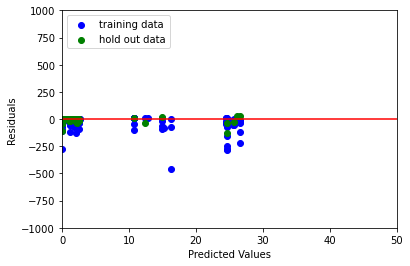

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs_TA.predict(X_train),gs_TA.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs_TA.predict(X_test),gs_TA.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=2000, color="r")
plt.xlim([0,50])
plt.ylim([-1000,1000])
plt.show()

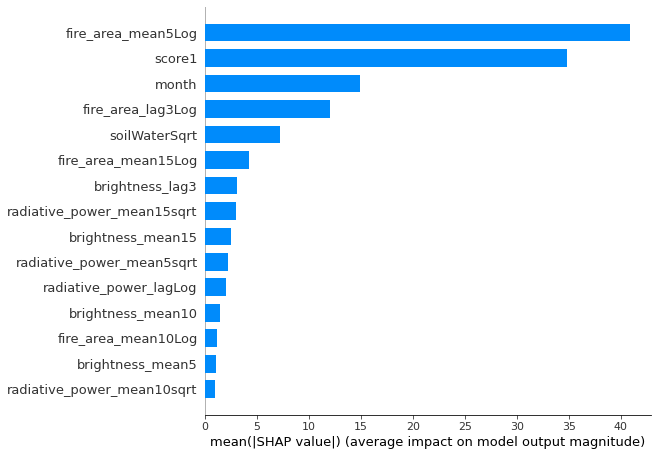

In [493]:
df_X_train=pd.DataFrame(X_train)

gs_TA = GradientBoostingRegressor(n_estimators=120, max_depth= 3,
              learning_rate= 0.3, loss='lad', random_state= 42, )
gs_TA.fit(X_train,y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(gs_TA)
shap_values = explainer(X_train)


import shap  

explainer_rf = shap.TreeExplainer(gs_TA,categorical_features=scaled_TA)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")


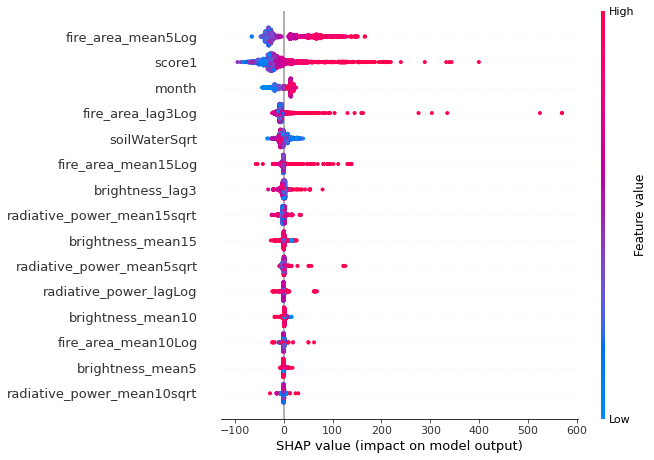

In [494]:
shap.summary_plot(shap_values, df_X_train)

# VI

In [274]:
VI["soilWaterSqrt"] = np.sqrt(VI.soilWaterMean)
VI["fire_area_lag3Log"] = np.log(VI.fire_area_lag3+1)
VI["fire_area_mean5Log"] = np.log(VI.fire_area_mean_5+1)
VI["fire_area_mean10Log"] = np.log(VI.fire_area_mean_10+1)
VI["fire_area_mean15Log"] = np.log(VI.fire_area_mean_15+1)
VI["radiative_power_lagLog"] = np.log(VI.radiative_power_lag3+1)
VI["radiative_power_mean5sqrt"] = np.sqrt(VI.radiative_power_mean5)
VI["radiative_power_mean10sqrt"] = np.sqrt(VI.radiative_power_mean10)
VI["radiative_power_mean15sqrt"] = np.sqrt(VI.radiative_power_mean15)
VI["Precip_log"] = np.log(VI["mean()Precip"]+1)
VI["windSpeed_sqrt"] = np.sqrt(VI["mean()windSpeed"])
VI["Count_lag3_log_sqrt"] = np.sqrt(np.log(VI.count_lag3+1))
VI["Count_mean5_log_sqrt"] = np.sqrt(np.log(VI.count_mean5+1))
VI["Count_mean10_log_sqrt"] = np.sqrt(np.log(VI.count_mean10+1))
VI["Count_mean15_log_sqrt"] = np.sqrt(np.log(VI.count_mean15+1))

In [275]:
VI = VI.loc[VI.Date > "2015-07-22"]

In [276]:
VI_final = VI[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [277]:
VI_final.isna().sum()

month                         0
mean()Precip                  0
mean()RelHumid                0
mean()windSpeed               0
mean()solarRad                0
mean()temp                    0
soilWaterSqrt                 0
fire_area_lag3Log             0
fire_area_mean5Log            0
fire_area_mean10Log           0
fire_area_mean15Log           0
radiative_power_lagLog        0
radiative_power_mean5sqrt     0
radiative_power_mean10sqrt    0
radiative_power_mean15sqrt    0
Precip_log                    0
windSpeed_sqrt                0
brightness_lag3               0
brightness_mean5              0
brightness_mean10             0
brightness_mean15             0
Count_lag3_log_sqrt           0
Count_mean5_log_sqrt          0
Count_mean10_log_sqrt         0
Count_mean15_log_sqrt         0
dtype: int64

In [278]:
from sklearn.preprocessing import StandardScaler

scaler_VI = StandardScaler().fit(VI_final)
scaled_VI = pd.DataFrame(scaler_VI.transform(VI_final))
scaled_VI.columns = VI_final.columns

scaled_VI.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
0,0.082834,-0.456901,0.461486,-0.341653,-0.935893,-0.742003,1.155927,0.458429,-0.322859,-0.643885,...,-0.521401,-0.276251,1.250599,0.642771,-0.239924,-0.590757,0.995404,0.137658,-0.338723,-0.610373
1,0.082834,1.406625,1.343294,-0.563378,-1.225869,-1.237317,1.155927,-0.606279,-0.396781,-0.643885,...,1.762857,-0.520006,-0.744565,0.070969,-0.239924,-0.590757,-0.694439,0.035007,-0.338723,-0.610373
2,0.082834,2.594565,0.403472,1.134199,-1.009754,-0.779057,1.155927,-0.606279,-0.396781,-0.643885,...,2.335181,1.141586,-0.744565,0.070969,-0.239924,-0.590757,-0.694439,0.035007,-0.338723,-0.610373
3,0.082834,0.064173,1.056841,0.548434,-1.062555,-1.666195,1.155927,0.278553,-0.231095,-0.535852,...,0.558440,0.614488,1.246235,0.643009,0.080323,-0.365163,0.809883,0.223972,-0.183884,-0.464076
4,0.082834,-0.159710,1.383305,-0.211804,-1.294374,-1.347643,1.155927,0.473691,-0.088440,-0.403548,...,0.192389,-0.138084,1.233640,0.642580,0.398543,-0.140997,0.809883,0.298314,-0.061076,-0.345794


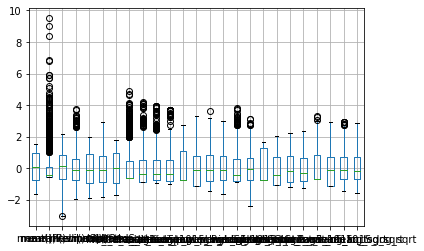

In [279]:
scaled_VI.boxplot()

In [280]:
scaled_VI["score1"] = -0.09*scaled_VI['Precip_log'] - 0.30*scaled_VI['mean()RelHumid'] + 0.15* scaled_VI['windSpeed_sqrt'] + 0.21*scaled_VI['mean()solarRad'] + 0.25*scaled_VI['mean()temp']


In [281]:
y_VI = VI.loc[VI.Date > "2015-07-22"].Estimated_fire_area

In [282]:
y_VI.mean()

17.19808238880418

In [283]:
X_VI = scaled_VI[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [284]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_VI, y_VI, 
                                                    test_size =0.20, #by default is 80%-20%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(1568, 15) (393, 15)


In [464]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_VI = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[100,110,120], "learning_rate":[0.1,0.3,0.5,1,2], 
              "loss": ['ls', 'lad'], "random_state" : [42] ,
             "max_depth":[2,3], }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs_VI = GridSearchCV(regressor_VI, parameters, cv=3) 

gs_VI = gs_VI.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_VI.best_score_, gs_VI.best_params_))
means = gs_VI.cv_results_['mean_test_score']
stds = gs_VI.cv_results_['std_test_score']
params = gs_VI.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_VI.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.538127 using {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 110, 'random_state': 42}
0.535166 (0.104814) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 100, 'random_state': 42}
0.538127 (0.106054) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 110, 'random_state': 42}
0.535052 (0.107759) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 120, 'random_state': 42}
0.520235 (0.103001) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
0.521204 (0.101878) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 110, 'random_state': 42}
0.518846 (0.102915) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 120, 'random_state': 42}
0.495597 (0.056759) with: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 2, 'n_estimators': 100, 'random_state': 42}
0.496405 (0.0

0.45681758337526823

In [465]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs_VI.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs_VI.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs_VI.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs_VI.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs_VI.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs_VI.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs_VI.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs_VI.predict(X_test))))

MAE train:  45.89641509552636
MSE train:  5931.029436670905
RMSE train:  77.01317703270594
r2:  0.9170380165146917
MAE test:  51.499862265808694
MSE test:  8236.169660695703
RMSE test:  90.75334517633884
r2:  0.6758828177837252


In [462]:
predictions_VI = gs_VI.predict(X_test)

In [463]:
pred_df_VI = pd.DataFrame({'Actual':y_test, 'Pred':predictions_VI}) 
pred_df.head(50)

,Actual,Pred
2115,336.701486,277.164032
2618,58.140000,32.322571
3663,2.200000,4.154703
3520,98.181774,86.148178
3912,0.000000,15.093009
3589,0.000000,10.197479
2703,266.097344,119.437706
3329,58.225000,53.162540
3439,54.039524,164.589310
3503,1207.057173,442.293610


(array([ 9750., 10000., 10250., 10500., 10750., 11000., 11250., 11500.,
        11750., 12000.]),
 <a list of 10 Text major ticklabel objects>)

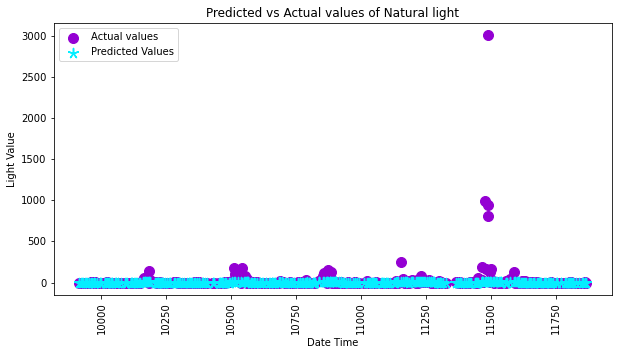

In [291]:
plt.figure(figsize=(10,5))
plt.scatter(pred_df_VI.index.values, pred_df_VI["Actual"],label="Actual values", s=100, color = "#9400D3", marker='o')
plt.scatter(pred_df_VI.index.values, pred_df_VI["Pred"],label="Predicted Values", s=100, color = "#05eeff", marker=(5, 2))
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Light Value')
plt.title("Predicted vs Actual values of Natural light")
plt.xticks(rotation=90)

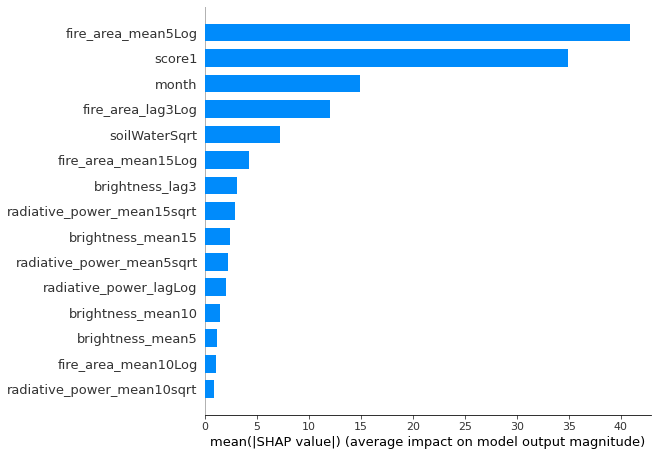

In [495]:
df_X_train=pd.DataFrame(X_train)

gs_VI = GradientBoostingRegressor(n_estimators=100, max_depth= 3,
              learning_rate= 0.3, loss='lad', random_state= 42, )
gs_VI.fit(X_train,y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(gs_VI)
shap_values = explainer(X_train)


import shap  

explainer_rf = shap.TreeExplainer(gs_VI,categorical_features=scaled_VI)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")

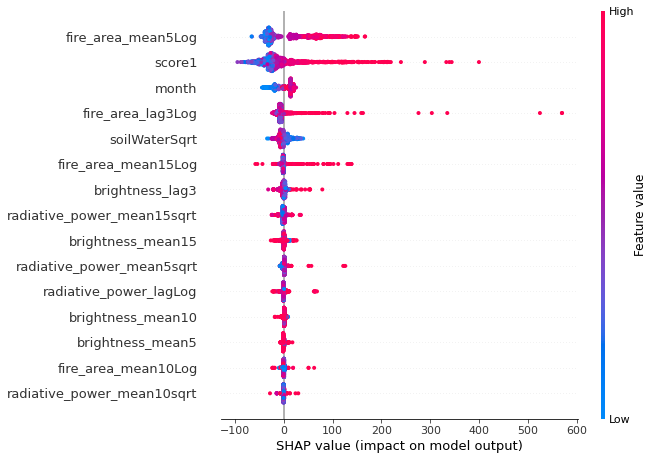

In [496]:
shap.summary_plot(shap_values, df_X_train)

# WA

In [293]:
WA["soilWaterSqrt"] = np.sqrt(WA.soilWaterMean)
WA["fire_area_lag3Log"] = np.log(WA.fire_area_lag3+1)
WA["fire_area_mean5Log"] = np.log(WA.fire_area_mean_5+1)
WA["fire_area_mean10Log"] = np.log(WA.fire_area_mean_10+1)
WA["fire_area_mean15Log"] = np.log(WA.fire_area_mean_15+1)
WA["radiative_power_lagLog"] = np.log(WA.radiative_power_lag3+1)
WA["radiative_power_mean5sqrt"] = np.sqrt(WA.radiative_power_mean5)
WA["radiative_power_mean10sqrt"] = np.sqrt(WA.radiative_power_mean10)
WA["radiative_power_mean15sqrt"] = np.sqrt(WA.radiative_power_mean15)
WA["Precip_log"] = np.log(WA["mean()Precip"]+1)
WA["windSpeed_sqrt"] = np.sqrt(WA["mean()windSpeed"])
WA["Count_lag3_log_sqrt"] = np.sqrt(np.log(WA.count_lag3+1))
WA["Count_mean5_log_sqrt"] = np.sqrt(np.log(WA.count_mean5+1))
WA["Count_mean10_log_sqrt"] = np.sqrt(np.log(WA.count_mean10+1))
WA["Count_mean15_log_sqrt"] = np.sqrt(np.log(WA.count_mean15+1))

In [294]:
WA = WA.loc[WA.Date > "2015-07-22"]

In [295]:
WA_final = WA[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [296]:
WA_final.isna().sum()

month                         0
mean()Precip                  0
mean()RelHumid                0
mean()windSpeed               0
mean()solarRad                0
mean()temp                    0
soilWaterSqrt                 0
fire_area_lag3Log             0
fire_area_mean5Log            0
fire_area_mean10Log           0
fire_area_mean15Log           0
radiative_power_lagLog        0
radiative_power_mean5sqrt     0
radiative_power_mean10sqrt    0
radiative_power_mean15sqrt    0
Precip_log                    0
windSpeed_sqrt                0
brightness_lag3               0
brightness_mean5              0
brightness_mean10             0
brightness_mean15             0
Count_lag3_log_sqrt           0
Count_mean5_log_sqrt          0
Count_mean10_log_sqrt         0
Count_mean15_log_sqrt         0
dtype: int64

In [297]:
from sklearn.preprocessing import StandardScaler

scaler_WA = StandardScaler().fit(WA_final)
scaled_WA = pd.DataFrame(scaler_WA.transform(WA_final))
scaled_WA.columns = WA_final.columns

scaled_WA.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
0,0.083099,1.319774,1.814720,-2.581722,-1.643300,-1.463515,0.768074,-0.372626,-0.827556,-0.984894,...,1.679644,-2.940170,0.007886,0.052650,0.016948,-0.991756,-0.271134,-0.668291,-0.970804,-1.316873
1,0.083099,-0.027071,2.906030,-0.717923,-2.010593,-1.526690,0.768074,-0.195908,-0.720039,-0.890630,...,0.284817,-0.704515,0.245132,0.171274,0.073447,-0.907536,0.070985,-0.531558,-0.815395,-1.135834
2,0.083099,0.662993,2.636034,-0.738201,-1.911105,-1.564514,0.768074,-0.782797,-0.689457,-0.971752,...,1.122381,-0.726371,-0.132197,0.104376,0.053616,-0.941422,-0.393293,-0.484794,-0.815395,-1.109809
3,0.083099,-0.318117,2.459637,1.285564,-1.598141,-1.748969,0.768074,-0.441558,-0.697109,-0.910681,...,-0.218155,1.273590,-0.053801,0.081500,0.031084,-0.936672,-0.393293,-0.478361,-0.787694,-1.060068
4,0.083099,-0.616175,1.516370,1.301913,-1.116562,-1.433604,0.768074,-0.940216,-0.738837,-0.965510,...,-0.920835,1.288485,-0.123393,-0.018023,0.023112,-0.051134,-1.301640,-0.643600,-0.839256,-1.044126


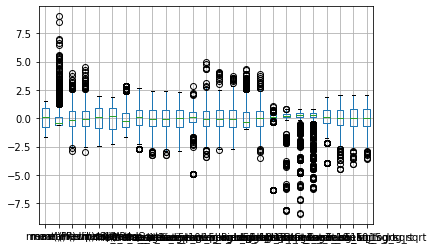

In [298]:
scaled_WA.boxplot()

In [299]:
scaled_WA["score1"] = -0.09*scaled_WA['Precip_log'] - 0.30*scaled_WA['mean()RelHumid'] + 0.15* scaled_WA['windSpeed_sqrt'] + 0.21*scaled_WA['mean()solarRad'] + 0.25*scaled_WA['mean()temp']


In [300]:
y_WA = WA.loc[WA.Date > "2015-07-22"].Estimated_fire_area

In [301]:
y_WA.mean()

236.4849300917937

In [302]:
X_WA = scaled_WA[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [303]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_WA, y_WA, 
                                                    test_size =0.20, #by default is 80%-20%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(1569, 15) (393, 15)


In [525]:
X_train, X_test, y_train, y_test = train_test_split(X_WA, y_WA, train_size=0.75, test_size=0.25, random_state=1)
    
# this will later be applied in the light14 df (which will has already included the cloud values by hour) 
# in a new column ("values of natural light")
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs_WA = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs_WA.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

# find the optimal parameters 
model = XGBRegressor()
param_grid = {
    'n_estimators': [100,110,120],
    'colsample_bytree': [0.5, 0.6],
    'max_depth': [ 2,3,4,5,6],
    'reg_alpha': [1.7],
    'reg_lambda': [1.0],
    'subsample': [0.5],
    "learning_rate" : [0.01]
}

model_WA, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=7)

Fitting 7 folds for each of 30 candidates, totalling 210 fits


In [508]:
print(np.sqrt(-model_WA.best_score_))
print(model_WA.best_params_)

330.1810053102837
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 120, 'reg_alpha': 1.7, 'reg_lambda': 1.0, 'subsample': 0.5}


In [510]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, model_WA.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, model_WA.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, model_WA.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, model_WA.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, model_WA.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, model_WA.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, model_WA.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, model_WA.predict(X_test))))

MAE train:  112.52944821782978
MSE train:  72202.48544380444
RMSE train:  268.70520174310815
r2:  0.7600899052696731
MAE test:  135.2729173889065
MSE test:  92931.128736821
RMSE test:  304.84607384189974
r2:  0.5816345992338385


In [511]:
predictions_WA = model_WA.predict(X_test)

In [512]:
pred_df_WA = pd.DataFrame({'Actual':y_test, 'Pred':predictions_WA}) 
pred_df.head(50)

,Actual,Pred
2115,336.701486,277.164032
2618,58.140000,32.322571
3663,2.200000,4.154703
3520,98.181774,86.148178
3912,0.000000,15.093009
3589,0.000000,10.197479
2703,266.097344,119.437706
3329,58.225000,53.162540
3439,54.039524,164.589310
3503,1207.057173,442.293610


(array([11750., 12000., 12250., 12500., 12750., 13000., 13250., 13500.,
        13750., 14000.]),
 <a list of 10 Text major ticklabel objects>)

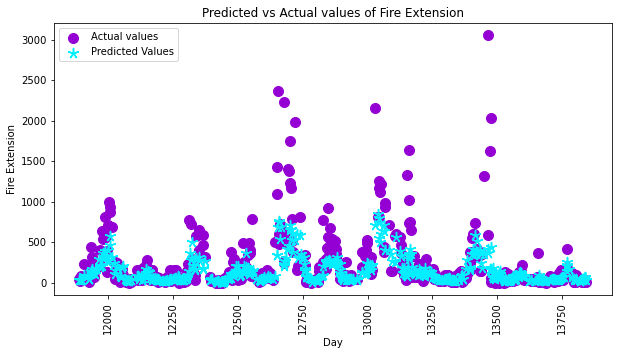

In [513]:
plt.figure(figsize=(10,5))
plt.scatter(pred_df_WA.index.values, pred_df_WA["Actual"],label="Actual values", s=100, color = "#9400D3", marker='o')
plt.scatter(pred_df_WA.index.values, pred_df_WA["Pred"],label="Predicted Values", s=100, color = "#05eeff", marker=(5, 2))
plt.legend()
plt.xlabel("Day")
plt.ylabel('Fire Extension')
plt.title("Predicted vs Actual values of Fire Extension")
plt.xticks(rotation=90)

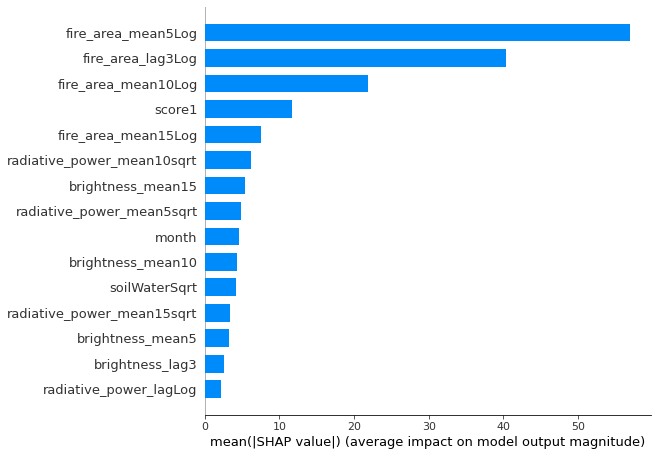

In [526]:
df_X_train=pd.DataFrame(X_train)

Xgs_WA = XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.01, max_depth=6, n_estimators= 120, reg_alpha= 1.7, reg_lambda= 1.0, subsample= 0.5)
Xgs_WA.fit(X_train,y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(Xgs_WA)
shap_values = explainer(X_train)


import shap  

explainer_rf = shap.TreeExplainer(Xgs_WA,categorical_features=scaled_WA)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")


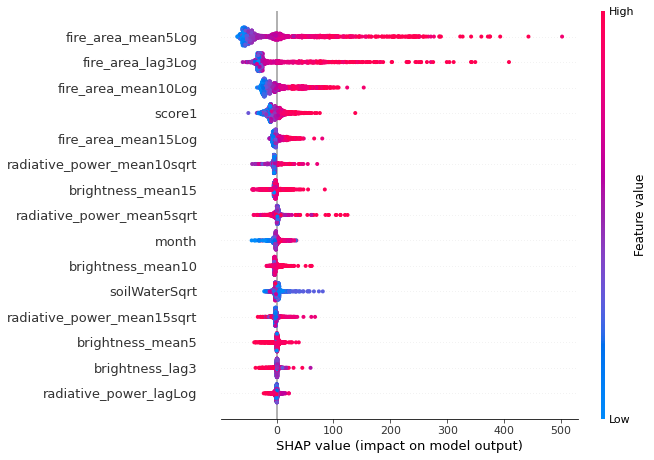

In [527]:
shap.summary_plot(shap_values, df_X_train)

# QL

In [322]:
QL["soilWaterSqrt"] = np.sqrt(QL.soilWaterMean)
QL["fire_area_lag3Log"] = np.log(QL.fire_area_lag3+1)
QL["fire_area_mean5Log"] = np.log(QL.fire_area_mean_5+1)
QL["fire_area_mean10Log"] = np.log(QL.fire_area_mean_10+1)
QL["fire_area_mean15Log"] = np.log(QL.fire_area_mean_15+1)
QL["radiative_power_lagLog"] = np.log(QL.radiative_power_lag3+1)
QL["radiative_power_mean5sqrt"] = np.sqrt(QL.radiative_power_mean5)
QL["radiative_power_mean10sqrt"] = np.sqrt(QL.radiative_power_mean10)
QL["radiative_power_mean15sqrt"] = np.sqrt(QL.radiative_power_mean15)
QL["Precip_log"] = np.log(QL["mean()Precip"]+1)
QL["windSpeed_sqrt"] = np.sqrt(QL["mean()windSpeed"])
QL["Count_lag3_log_sqrt"] = np.sqrt(np.log(QL.count_lag3+1))
QL["Count_mean5_log_sqrt"] = np.sqrt(np.log(QL.count_mean5+1))
QL["Count_mean10_log_sqrt"] = np.sqrt(np.log(QL.count_mean10+1))
QL["Count_mean15_log_sqrt"] = np.sqrt(np.log(QL.count_mean15+1))

In [323]:
QL = QL.loc[QL.Date > "2015-07-22"]

In [324]:
QL_final = QL[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [325]:
QL_final.isna().sum()

month                         0
mean()Precip                  0
mean()RelHumid                0
mean()windSpeed               0
mean()solarRad                0
mean()temp                    0
soilWaterSqrt                 0
fire_area_lag3Log             0
fire_area_mean5Log            0
fire_area_mean10Log           0
fire_area_mean15Log           0
radiative_power_lagLog        0
radiative_power_mean5sqrt     0
radiative_power_mean10sqrt    0
radiative_power_mean15sqrt    0
Precip_log                    0
windSpeed_sqrt                0
brightness_lag3               0
brightness_mean5              0
brightness_mean10             0
brightness_mean15             0
Count_lag3_log_sqrt           0
Count_mean5_log_sqrt          0
Count_mean10_log_sqrt         0
Count_mean15_log_sqrt         0
dtype: int64

In [326]:
from sklearn.preprocessing import StandardScaler

scaler_QL = StandardScaler().fit(QL_final)
scaled_QL = pd.DataFrame(scaler_QL.transform(QL_final))
scaled_QL.columns = QL_final.columns

scaled_QL.head()

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
0,0.083099,0.054521,2.119857,-2.211555,-1.718191,-0.539978,-0.570646,-1.335884,0.356716,0.551947,...,0.496339,-2.451365,-0.055946,0.148532,0.250821,0.303801,-1.042827,0.460524,0.616472,0.360688
1,0.083099,-0.424713,1.005453,-0.133208,-1.239429,-0.803435,-0.570646,0.217820,0.330460,0.532866,...,-0.340670,-0.088977,0.050489,0.139333,0.253161,0.287145,0.191436,0.382260,0.628541,0.375655
2,0.083099,-0.611862,1.558887,-1.203395,-1.256717,-0.304751,-0.570646,-0.043592,0.116737,0.397453,...,-0.870955,-1.233977,0.058859,0.103392,0.236845,0.275602,-0.192663,0.100183,0.489060,0.369452
3,0.083099,-0.567694,0.864570,0.230782,-1.203588,-0.785119,-0.570646,-0.974693,-0.055100,0.245115,...,-0.727058,0.274046,-0.033618,0.084560,0.194447,0.236011,-0.671022,-0.008162,0.405279,0.340304
4,0.083099,-0.627075,0.044985,1.907745,-1.112939,-1.582363,-0.570646,-0.311144,-0.545377,0.031180,...,-0.924053,1.814658,0.128963,0.050360,0.186007,0.254308,-0.234464,-0.661255,0.104541,0.341593


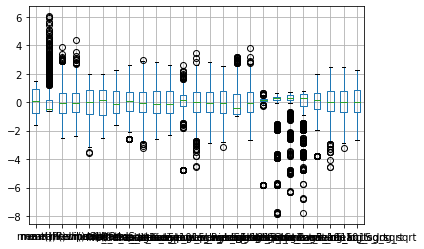

In [327]:
scaled_QL.boxplot()

In [328]:
scaled_QL["score1"] = -0.09*scaled_QL['Precip_log'] - 0.30*scaled_QL['mean()RelHumid'] + 0.15* scaled_QL['windSpeed_sqrt'] + 0.21*scaled_QL['mean()solarRad'] + 0.25*scaled_QL['mean()temp']


In [329]:
y_QL = QL.loc[QL.Date > "2015-07-22"].Estimated_fire_area

In [330]:
y_QL.mean()

109.8002214786813

In [331]:
X_QL = scaled_QL[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [332]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_QL, y_QL, 
                                                    test_size =0.20, #by default is 80%-20%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(1569, 15) (393, 15)


In [521]:
X_train, X_test, y_train, y_test = train_test_split(X_QL, y_QL, train_size=0.75, test_size=0.25, random_state=1)
    
# this will later be applied in the light14 df (which will has already included the cloud values by hour) 
# in a new column ("values of natural light")
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs2_QL = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs2_QL.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

# find the optimal parameters 
model = XGBRegressor()
param_grid = {
    'n_estimators': [100,110,120],
    'colsample_bytree': [0.5, 0.6],
    'max_depth': [ 2,3,4,5,6],
    'reg_alpha': [1.7],
    'reg_lambda': [1.0],
    'subsample': [0.5],
    "learning_rate" : [0.01]
}

model_QL, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=7)

Fitting 7 folds for each of 30 candidates, totalling 210 fits


In [334]:
print(np.sqrt(-model_QL.best_score_))
print(model_QL.best_params_)

139.913970357378
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 120, 'reg_alpha': 1.7, 'reg_lambda': 1.0, 'subsample': 0.5}


In [474]:
y_train_pred = pd.Series(model_QL.predict(X_train)).apply(lambda x: round(x))
y_test_pred = pd.Series(model_QL.predict(X_test)).apply(lambda x: round(x))

print(f'MAE Train is {mean_absolute_error(y_train_pred, y_train)}')
print(f'RMSE Train is {np.sqrt(mean_squared_error(y_train_pred, y_train))}')
print(f'r2: {np.sqrt(metrics.r2_score(y_train_pred, y_train))}\n')

print(f'MAE Test is {mean_absolute_error(y_test_pred, y_test)}')
print(f'RMSE Test is {np.sqrt(mean_squared_error(y_test_pred, y_test))}') 
print(f'r2: {np.sqrt(metrics.r2_score(y_test_pred, y_test))}') 

MAE Train is 51.93523327252753
RMSE Train is 116.31652341378549
r2: nan

MAE Test is 45.25591668590428
RMSE Test is 88.20386562980683
r2: nan


In [475]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, model_QL.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, model_QL.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, model_QL.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, model_QL.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, model_QL.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, model_QL.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, model_QL.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, model_QL.predict(X_test))))

MAE train:  51.933966313390094
MSE train:  13528.56568577787
RMSE train:  116.31236256640078
r2:  0.7982667877623381
MAE test:  45.254929751046504
MSE test:  7780.341397963225
RMSE test:  88.20624353164138
r2:  0.6977677595284778


In [338]:
predictions_QL = model_QL.predict(X_test)
pred_df_QL = pd.DataFrame({'Actual':y_test, 'Pred':predictions_QL}) 
pred_df.head(50)

,Actual,Pred
2115,336.701486,277.164032
2618,58.140000,32.322571
3663,2.200000,4.154703
3520,98.181774,86.148178
3912,0.000000,15.093009
3589,0.000000,10.197479
2703,266.097344,119.437706
3329,58.225000,53.162540
3439,54.039524,164.589310
3503,1207.057173,442.293610


(array([3750., 4000., 4250., 4500., 4750., 5000., 5250., 5500., 5750.,
        6000., 6250.]),
 <a list of 11 Text major ticklabel objects>)

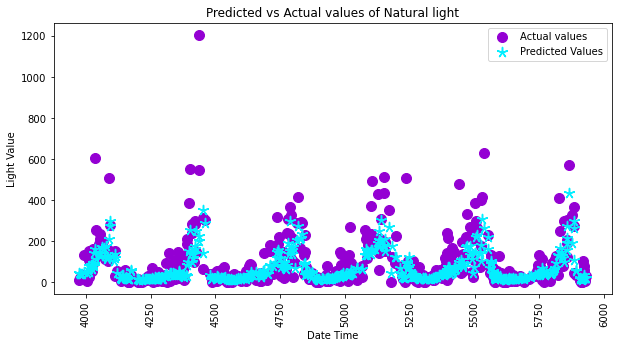

In [339]:
plt.figure(figsize=(10,5))
plt.scatter(pred_df_QL.index.values, pred_df_QL["Actual"],label="Actual values", s=100, color = "#9400D3", marker='o')
plt.scatter(pred_df_QL.index.values, pred_df_QL["Pred"],label="Predicted Values", s=100, color = "#05eeff", marker=(5, 2))
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Light Value')
plt.title("Predicted vs Actual values of Natural light")
plt.xticks(rotation=90)

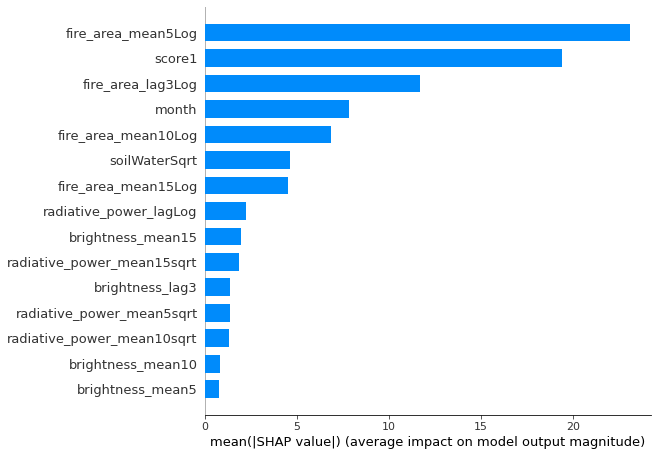

In [522]:
df_X_train=pd.DataFrame(X_train)

Xgs_QL = XGBRegressor(colsample_bytree= 0.6, learning_rate= 0.01, max_depth=6, n_estimators= 120, reg_alpha= 1.7, reg_lambda= 1.0, subsample= 0.5)
Xgs_QL.fit(X_train,y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(Xgs_QL)
shap_values = explainer(X_train)




explainer_rf = shap.TreeExplainer(Xgs_QL,categorical_features=scaled_QL)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")

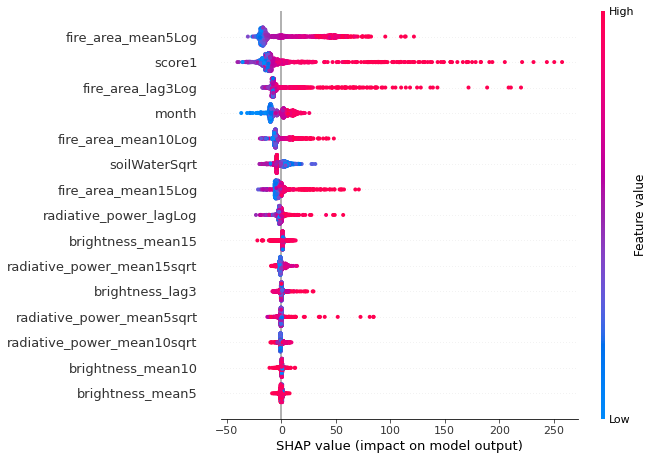

In [523]:
shap.summary_plot(shap_values, df_X_train)

# PREDICTIONS

We now create the dataset for te three days for which predictions are required.
To do this we: 
1. import dataset created with the other jupyter "historical_wildfires_dates_predictions_datasetCreation.ipynb"
2. add remaing features (soil water and score)
3. perform the same preprocessing 
4. compute predictions

These steps are performed for each region

In [340]:
weather_pred = pd.read_csv('HistoricalWeatherForecasts.csv')

In [341]:
weather_pred.head()

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [342]:
weather_pred = weather_pred.loc[weather_pred["Lead time"] == 5]

precipitation_pred = weather_pred.loc[weather_pred.Parameter == "Precipitation"]
precipitation_pred.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]Pecip', 'min()': 'min()Precip', 'max()': 'max()Precip',
       'mean()': 'mean()Precip', 'variance()': 'variance()Precip'}, inplace=True)
precipitation_pred.drop(columns=['Lead time', 'Parameter'], inplace=True)

relhumidity_pred = weather_pred.loc[forecasts.Parameter == "RelativeHumidity"]
relhumidity_pred.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]RelHumid', 'min()': 'min()RelHumid', 'max()': 'max()RelHumid',
       'mean()': 'mean()RelHumid', 'variance()': 'variance()RelHumid'}, inplace=True)
relhumidity_pred.drop(columns=['Lead time', 'Parameter'], inplace=True)

solarRad_pred = weather_pred.loc[forecasts.Parameter == "SolarRadiation"]
solarRad_pred.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]solarRad', 'min()': 'min()solarRad', 'max()': 'max()solarRad',
       'mean()': 'mean()solarRad', 'variance()': 'variance()solarRad'}, inplace=True)
solarRad_pred.drop(columns=['Lead time', 'Parameter'], inplace=True)

temp_pred = weather_pred.loc[forecasts.Parameter == "Temperature"]
temp_pred.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]temp', 'min()': 'min()temp', 'max()': 'max()temp',
       'mean()': 'mean()temp', 'variance()': 'variance()temp'}, inplace=True)
temp_pred.drop(columns=['Lead time', 'Parameter'], inplace=True)

windSpeed_pred = weather_pred.loc[forecasts.Parameter == "WindSpeed"]
windSpeed_pred.rename(columns={'count()[unit: km^2]':'count()[unit: km^2]windSpeed', 'min()': 'min()windSpeed', 'max()': 'max()windSpeed',
       'mean()': 'mean()windSpeed', 'variance()': 'variance()windSpeed'}, inplace=True)
windSpeed_pred.drop(columns=['Lead time', 'Parameter'], inplace=True)

new_weather_pred = precipitation_pred.merge(relhumidity_pred, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])
new_weather_pred = new_weather_pred.merge(windSpeed_pred, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])
new_weather_pred = new_weather_pred.merge(solarRad_pred, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])
new_weather_pred = new_weather_pred.merge(temp_pred, how='inner', left_on=["Date", "Region"], right_on=["Date","Region"])

new_weather_pred["Date"] = pd.to_datetime(new_weather_pred.Date)

In [343]:
new_weather_pred.head()

,Date,Region,count()[unit: km^2]Pecip,min()Precip,max()Precip,mean()Precip,variance()Precip,count()[unit: km^2]RelHumid,min()RelHumid,max()RelHumid,...,count()[unit: km^2]solarRad,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp
0,2015-07-06,NSW,8.037682e+05,0.000000,0.676588,0.015649,0.004120,8.037682e+05,36.506927,96.380577,...,8.037682e+05,1.310407,14.294098,11.804923,7.179963,8.037682e+05,1.781415,17.923838,10.280841,5.677777
1,2015-07-06,NT,1.349817e+06,0.000000,1.775728,0.017325,0.012745,1.349817e+06,22.928360,75.619980,...,1.349817e+06,8.691142,20.307533,17.706972,2.025979,1.349817e+06,11.268316,26.196993,18.207019,14.549913
2,2015-07-06,QL,1.736319e+06,0.000000,2.001911,0.054568,0.027684,1.736319e+06,30.285908,92.607628,...,1.736319e+06,7.298058,19.379251,16.036177,3.094750,1.736319e+06,8.465402,25.564709,17.935421,10.532778
3,2015-07-06,SA,9.797103e+05,0.000000,4.364864,0.165038,0.150157,9.797103e+05,29.739246,91.356522,...,9.797103e+05,3.959972,15.410563,12.210876,6.095881,9.797103e+05,7.636046,16.065647,13.257703,2.698994
4,2015-07-06,TA,6.567142e+04,0.847536,14.824793,4.985277,13.149893,6.567142e+04,71.484756,94.721146,...,6.567142e+04,0.742585,5.149638,2.396732,1.286419,6.567142e+04,1.832730,11.433212,5.788967,4.412144


In [344]:
new_weather_pred.Date.max()

Timestamp('2021-02-03 00:00:00')

In [345]:
new_weather_pred['year']=new_weather_pred['Date'].dt.year
new_weather_pred['month']=new_weather_pred['Date'].dt.month
new_weather_pred['day']=new_weather_pred['Date'].dt.day

In [346]:
new_soilWater

,Region,year,month,soilWaterMean
0,NSW,2005,1,0.185708
1,NSW,2005,2,0.192844
2,NSW,2005,3,0.181049
3,NSW,2005,4,0.162402
4,NSW,2005,5,0.163287
...,...,...,...,...
1346,WA,2020,9,0.053833
1347,WA,2020,10,0.051864
1348,WA,2020,11,0.060190
1349,WA,2020,12,0.097448


In [347]:
add_soil_water_pred = new_soilWater.loc[(new_soilWater.year == 2020)&(new_soilWater.month == 2)]

In [348]:
add_soil_water_pred["year"] = 2021

In [349]:
add_soil_water_pred

,Region,year,month,soilWaterMean
181,NSW,2021,2,0.226776
374,NT,2021,2,0.150223
567,QL,2021,2,0.242919
760,SA,2021,2,0.071434
953,TA,2021,2,0.244585
1146,VI,2021,2,0.238573
1339,WA,2021,2,0.077930


In [350]:
frames = [new_soilWater, add_soil_water_pred]

In [351]:
soilWater_pred = pd.concat(frames)

In [352]:
new_pred = new_weather_pred.merge(soilWater_pred, how='inner', left_on=["month", "Region", "year"], right_on=["month","Region", "year"])

In [353]:
new_pred.tail()

,Date,Region,count()[unit: km^2]Pecip,min()Precip,max()Precip,mean()Precip,variance()Precip,count()[unit: km^2]RelHumid,min()RelHumid,max()RelHumid,...,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,year,month,day,soilWaterMean
13879,2021-02-02,VI,2.300457e+05,0.0,5.628950,0.525842,1.232327,2.300457e+05,39.394714,87.013390,...,37.411353,2.300457e+05,10.080166,17.730930,13.835419,4.763908,2021,2,2,0.238573
13880,2021-02-03,VI,2.300457e+05,0.0,5.298052,0.070650,0.218685,2.300457e+05,29.702379,91.133904,...,68.625939,2.300457e+05,9.921582,20.779758,15.349947,8.457167,2021,2,3,0.238573
13881,2021-02-01,WA,2.542548e+06,0.0,41.893772,3.610323,35.990771,2.542548e+06,23.327627,85.130768,...,58.773740,2.542548e+06,17.013016,35.319794,25.606243,22.154151,2021,2,1,0.077930
13882,2021-02-02,WA,2.542548e+06,0.0,87.386444,5.429156,101.290391,2.542548e+06,20.654184,80.760147,...,32.042776,2.542548e+06,18.107708,34.505043,27.671341,10.205618,2021,2,2,0.077930
13883,2021-02-03,WA,2.542548e+06,0.0,37.947727,3.047417,38.243424,2.542548e+06,19.470699,81.846352,...,59.990016,2.542548e+06,15.596161,34.871944,26.044550,15.859010,2021,2,3,0.077930


In [354]:
new_pred.columns

Index(['Date', 'Region', 'count()[unit: km^2]Pecip', 'min()Precip',
       'max()Precip', 'mean()Precip', 'variance()Precip',
       'count()[unit: km^2]RelHumid', 'min()RelHumid', 'max()RelHumid',
       'mean()RelHumid', 'variance()RelHumid', 'count()[unit: km^2]windSpeed',
       'min()windSpeed', 'max()windSpeed', 'mean()windSpeed',
       'variance()windSpeed', 'count()[unit: km^2]solarRad', 'min()solarRad',
       'max()solarRad', 'mean()solarRad', 'variance()solarRad',
       'count()[unit: km^2]temp', 'min()temp', 'max()temp', 'mean()temp',
       'variance()temp', 'year', 'month', 'day', 'soilWaterMean'],
      dtype='object')

## PREDICTIONS NSW

In [355]:
NSW_wildfires_pred = pd.read_csv("NSW.csv")

In [356]:
NSW_wildfires_pred["Date"] = pd.to_datetime(NSW_wildfires_pred.Date)

In [357]:
NSW_wildfires_pred = NSW_wildfires_pred.merge(new_pred, how='inner', left_on=["Date", "Region", "year", "month", "day"], right_on=["Date","Region",  "year", "month", "day"])



In [358]:
NSW_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,NSW,4.533333,300.483333,28.6,80.333333,1.527525,2.333333,3.0,R,...,1.310407,14.294098,11.804923,7.179963,803768.19762,1.781415,17.923838,10.280841,5.677777,0.301472
1,2015-07-07,NSW,5.390000,307.000000,31.2,82.000000,5.887841,34.666667,4.0,R,...,3.958993,14.775929,12.370152,2.508597,803768.19762,0.099376,16.054276,9.670909,7.388896,0.301472
2,2015-07-08,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,6.651114,14.922725,12.557472,2.167692,803768.19762,-0.059143,15.528275,8.917964,5.448867,0.301472
3,2015-07-09,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,1.350860,14.840615,10.890758,10.691887,803768.19762,4.177390,15.895335,10.853388,3.343773,0.301472
4,2015-07-10,NSW,1.800000,305.100000,29.9,79.000000,NaN,NaN,1.0,R,...,1.358067,13.248702,7.854180,11.847141,803768.19762,2.698585,17.526588,11.332001,5.363875,0.301472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,2021-01-28,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,2.836624,32.234394,25.141611,40.999368,803768.19762,13.397596,34.641548,26.569831,20.018600,0.200928
1977,2021-01-29,NSW,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.0,N,...,3.717626,29.583067,20.265943,31.462288,803768.19762,14.299734,33.591160,25.655986,19.271200,0.200928
1978,2021-01-30,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.581000,31.168509,22.241571,23.207815,803768.19762,16.339705,35.168537,25.653809,17.939364,0.200928
1979,2021-01-31,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.892982,31.965412,24.719842,22.594823,803768.19762,14.280686,34.913353,25.927487,23.472193,0.200928


In [359]:
NSW_wildfires_pred.columns

Index(['Date', 'Region', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month', 'day', 'count_nan', 'fire_area_lag3',
       'fire_area_mean_5', 'fire_area_mean_10', 'fire_area_mean_15',
       'brightness_lag3', 'brightness_mean5', 'brightness_mean10',
       'brightness_mean15', 'radiative_power_lag3', 'radiative_power_mean5',
       'radiative_power_mean10', 'radiative_power_mean15', 'count_lag3',
       'count_mean5', 'count_mean10', 'count_mean15',
       'count()[unit: km^2]Pecip', 'min()Precip', 'max()Precip',
       'mean()Precip', 'variance()Precip', 'count()[unit: km^2]RelHumid',
       'min()RelHumid', 'max()RelHumid', 'mean()RelHumid',
       'variance()RelHumid', 'count()[unit: km^2]windSpeed', 'min()windSpeed',
       'max()windSpeed', 'mean()windSpeed', 'variance()windSpeed',
       'count()[unit: km^2]solarRad', 'min(

In [360]:
NSW_wildfires_pred["soilWaterSqrt"] = np.sqrt(NSW_wildfires_pred.soilWaterMean)
NSW_wildfires_pred["fire_area_lag3Log"] = np.log(NSW_wildfires_pred.fire_area_lag3+1)
NSW_wildfires_pred["fire_area_mean5Log"] = np.log(NSW_wildfires_pred.fire_area_mean_5+1)
NSW_wildfires_pred["fire_area_mean10Log"] = np.log(NSW_wildfires_pred.fire_area_mean_10+1)
NSW_wildfires_pred["fire_area_mean15Log"] = np.log(NSW_wildfires_pred.fire_area_mean_15+1)
NSW_wildfires_pred["radiative_power_lagLog"] = np.log(NSW_wildfires_pred.radiative_power_lag3+1)
NSW_wildfires_pred["radiative_power_mean5sqrt"] = np.sqrt(NSW_wildfires_pred.radiative_power_mean5)
NSW_wildfires_pred["radiative_power_mean10sqrt"] = np.sqrt(NSW_wildfires_pred.radiative_power_mean10)
NSW_wildfires_pred["radiative_power_mean15sqrt"] = np.sqrt(NSW_wildfires_pred.radiative_power_mean15)
NSW_wildfires_pred["Precip_log"] = np.log(NSW_wildfires_pred["mean()Precip"]+1)
NSW_wildfires_pred["windSpeed_sqrt"] = np.sqrt(NSW_wildfires_pred["mean()windSpeed"])
NSW_wildfires_pred["Count_lag3_log_sqrt"] = np.sqrt(np.log(NSW_wildfires_pred.count_lag3+1))
NSW_wildfires_pred["Count_mean5_log_sqrt"] = np.sqrt(np.log(NSW_wildfires_pred.count_mean5+1))
NSW_wildfires_pred["Count_mean10_log_sqrt"] = np.sqrt(np.log(NSW_wildfires_pred.count_mean10+1))
NSW_wildfires_pred["Count_mean15_log_sqrt"] = np.sqrt(np.log(NSW_wildfires_pred.count_mean15+1))

In [361]:
NSW_wildfires_pred = NSW_wildfires_pred.loc[NSW_wildfires_pred.Date > "2021-01-29"]

In [362]:
dates_NSW = NSW_wildfires_pred[["Date", "Region"]]

In [363]:
NSW_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,radiative_power_lagLog,radiative_power_mean5sqrt,radiative_power_mean10sqrt,radiative_power_mean15sqrt,Precip_log,windSpeed_sqrt,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1978,2021-01-30,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.01676,11.215837,10.071453,10.024392,1.359706,1.808698,1.268636,1.362460,1.405020,1.380967
1979,2021-01-31,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,8.507937,9.973339,9.259146,0.957132,2.046637,0.000000,1.312542,1.389792,1.342687
1980,2021-02-01,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,4.176721,9.823060,9.259146,0.981557,2.164894,0.000000,1.284001,1.368138,1.342687


In [364]:
NSW_wildfires_pred = NSW_wildfires_pred[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [365]:
NSW_wildfires_pred

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1978,1,2.895047,62.004716,3.271390,22.241571,25.653809,0.44825,1.609438,2.717902,2.709686,...,1.359706,1.808698,315.2625,254.486618,290.959475,284.661817,1.268636,1.362460,1.405020,1.380967
1979,1,1.604216,53.781555,4.188725,24.719842,25.927487,0.44825,0.000000,2.484240,2.683795,...,0.957132,2.046637,0.0000,190.316618,259.112809,261.333484,0.000000,1.312542,1.389792,1.342687
1980,2,1.668609,51.122886,4.686767,23.329859,25.311044,0.47621,0.000000,2.108029,2.641415,...,0.981557,2.164894,0.0000,127.736618,227.910309,261.333484,0.000000,1.284001,1.368138,1.342687


In [366]:
NSW_wildfires_pred_stand = pd.DataFrame(scaler.transform(NSW_wildfires_pred))
NSW_wildfires_pred_stand.columns = NSW_wildfires_pred.columns
NSW_wildfires_pred_stand["score1"] = -0.09*NSW_wildfires_pred_stand['Precip_log'] - 0.30*NSW_wildfires_pred_stand['mean()RelHumid'] + 0.15* NSW_wildfires_pred_stand['windSpeed_sqrt'] + 0.21*NSW_wildfires_pred_stand['mean()solarRad'] + 0.25*NSW_wildfires_pred_stand['mean()temp']
NSW_wildfires_pred_stand = NSW_wildfires_pred_stand[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [367]:
estimated_area_NSW = predictions = gs_NSW.predict(NSW_wildfires_pred_stand)

In [368]:
estimated_area_NSW

array([19.34634237,  4.76561095, 13.48896623])

In [369]:
dates_NSW["Fire_estimated_area"] = estimated_area_NSW

In [370]:
dates_NSW

,Date,Region,Fire_estimated_area
1978,2021-01-30,NSW,19.346342
1979,2021-01-31,NSW,4.765611
1980,2021-02-01,NSW,13.488966


## PREDICTIONS QL

In [371]:
QL_wildfires_pred = pd.read_csv("QL.csv")

In [372]:
QL_wildfires_pred["Date"] = pd.to_datetime(QL_wildfires_pred.Date)

In [373]:
QL_wildfires_pred = QL_wildfires_pred.merge(new_pred, how='inner', left_on=["Date", "Region", "year", "month", "day"], right_on=["Date","Region",  "year", "month", "day"])



In [374]:
QL_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,QL,27.414706,317.394118,44.070588,84.882353,5.775837,33.360294,17.0,R,...,7.298058,19.379251,16.036177,3.094750,1.736319e+06,8.465402,25.564709,17.935421,10.532778,0.137742
1,2015-07-07,QL,36.108000,316.242500,47.305000,84.550000,8.450942,71.418421,20.0,R,...,8.449808,19.602495,16.575151,2.698533,1.736319e+06,6.630989,25.742508,17.298187,11.273064,0.137742
2,2015-07-08,QL,33.463000,320.071667,41.780000,86.966667,8.458757,71.550575,30.0,R,...,14.165189,19.913078,16.879016,1.892767,1.736319e+06,6.926640,26.002844,17.035602,15.505208,0.137742
3,2015-07-09,QL,29.141538,310.657692,58.146154,86.692308,7.409280,54.897436,13.0,R,...,9.755589,20.570242,16.323836,3.087989,1.736319e+06,6.572390,25.533501,18.282508,11.467745,0.137742
4,2015-07-10,QL,18.568667,317.296667,39.713333,85.466667,7.576907,57.409524,15.0,R,...,1.977183,20.559414,14.278381,19.864709,1.736319e+06,10.339111,26.644560,19.237387,11.196936,0.137742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2021-01-28,QL,65.100000,310.705405,34.440541,88.405405,9.190755,84.469970,37.0,N,...,2.937026,31.598263,25.867644,16.916211,1.736319e+06,19.892965,37.628937,31.043739,15.324475,0.215243
1978,2021-01-29,QL,32.717647,314.329412,68.917647,89.176471,6.966305,48.529412,17.0,N,...,5.423421,29.744467,24.324742,16.292473,1.736319e+06,19.099442,38.778637,30.085481,19.981321,0.215243
1979,2021-01-30,QL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.431030,30.997988,26.319139,31.225065,1.736319e+06,19.415413,38.681797,30.060553,18.657759,0.215243
1980,2021-01-31,QL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.704669,31.210682,26.577576,19.625756,1.736319e+06,18.099407,38.564091,29.691890,18.673227,0.215243


In [375]:
QL_wildfires_pred["soilWaterSqrt"] = np.sqrt(QL_wildfires_pred.soilWaterMean)
QL_wildfires_pred["fire_area_lag3Log"] = np.log(QL_wildfires_pred.fire_area_lag3+1)
QL_wildfires_pred["fire_area_mean5Log"] = np.log(QL_wildfires_pred.fire_area_mean_5+1)
QL_wildfires_pred["fire_area_mean10Log"] = np.log(QL_wildfires_pred.fire_area_mean_10+1)
QL_wildfires_pred["fire_area_mean15Log"] = np.log(QL_wildfires_pred.fire_area_mean_15+1)
QL_wildfires_pred["radiative_power_lagLog"] = np.log(QL_wildfires_pred.radiative_power_lag3+1)
QL_wildfires_pred["radiative_power_mean5sqrt"] = np.sqrt(QL_wildfires_pred.radiative_power_mean5)
QL_wildfires_pred["radiative_power_mean10sqrt"] = np.sqrt(QL_wildfires_pred.radiative_power_mean10)
QL_wildfires_pred["radiative_power_mean15sqrt"] = np.sqrt(QL_wildfires_pred.radiative_power_mean15)
QL_wildfires_pred["Precip_log"] = np.log(QL_wildfires_pred["mean()Precip"]+1)
QL_wildfires_pred["windSpeed_sqrt"] = np.sqrt(QL_wildfires_pred["mean()windSpeed"])
QL_wildfires_pred["Count_lag3_log_sqrt"] = np.sqrt(np.log(QL_wildfires_pred.count_lag3+1))
QL_wildfires_pred["Count_mean5_log_sqrt"] = np.sqrt(np.log(QL_wildfires_pred.count_mean5+1))
QL_wildfires_pred["Count_mean10_log_sqrt"] = np.sqrt(np.log(QL_wildfires_pred.count_mean10+1))
QL_wildfires_pred["Count_mean15_log_sqrt"] = np.sqrt(np.log(QL_wildfires_pred.count_mean15+1))

In [376]:
QL_wildfires_pred = QL_wildfires_pred.loc[QL_wildfires_pred.Date > "2021-01-29"]

In [377]:
dates_QL = QL_wildfires_pred[["Date", "Region"]]

In [378]:
QL_wildfires_pred = QL_wildfires_pred[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]



In [379]:
QL_wildfires_pred

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1979,1,4.402920,47.931033,5.130884,26.319139,30.060553,0.463943,4.128907,3.539389,3.268308,...,1.686940,2.265145,318.918750,321.016590,318.601474,319.503503,1.869895,1.765772,1.691804,1.761559
1980,1,2.893481,48.948290,4.891464,26.577576,29.691890,0.463943,4.191169,3.733454,3.477444,...,1.359304,2.211666,310.705405,320.723862,317.815765,318.185658,1.907246,1.802880,1.742112,1.781146
1981,2,0.745959,46.135125,4.165293,25.782648,29.776253,0.492868,3.518021,3.768501,3.529281,...,0.557304,2.040905,314.329412,319.321509,317.591206,318.136530,1.700109,1.802880,1.748916,1.754664


In [380]:
QL_wildfires_pred_stand = pd.DataFrame(scaler_QL.transform(QL_wildfires_pred))
QL_wildfires_pred_stand.columns = QL_wildfires_pred.columns
QL_wildfires_pred_stand["score1"] = -0.09*QL_wildfires_pred_stand['Precip_log'] - 0.30*QL_wildfires_pred_stand['mean()RelHumid'] + 0.15* QL_wildfires_pred_stand['windSpeed_sqrt'] + 0.21*QL_wildfires_pred_stand['mean()solarRad'] + 0.25*QL_wildfires_pred_stand['mean()temp']
QL_wildfires_pred_stand = QL_wildfires_pred_stand[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [381]:
estimated_area_QL = predictions = model_QL.predict(QL_wildfires_pred_stand)

In [382]:
estimated_area_QL

array([19.469894, 19.821287, 19.542118], dtype=float32)

In [383]:
dates_QL["Fire_estimated_area"] = estimated_area_QL

In [384]:
dates_QL

,Date,Region,Fire_estimated_area
1979,2021-01-30,QL,19.469894
1980,2021-01-31,QL,19.821287
1981,2021-02-01,QL,19.542118


## PREDICTIONS SA

In [385]:
SA_wildfires_pred = pd.read_csv("SA.csv")
SA_wildfires_pred["Date"] = pd.to_datetime(SA_wildfires_pred.Date)
SA_wildfires_pred = SA_wildfires_pred.merge(new_pred, how='inner', left_on=["Date", "Region", "year", "month", "day"], right_on=["Date","Region",  "year", "month", "day"])



In [386]:
SA_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,SA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,3.959972,15.410563,12.210876,6.095881,979710.252773,7.636046,16.065647,13.257703,2.698994,0.098759
1,2015-07-07,SA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,3.352502,15.594007,12.561520,3.913754,979710.252773,7.896036,16.732052,13.593312,3.352517,0.098759
2,2015-07-08,SA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,2.232895,15.540177,12.160832,5.096898,979710.252773,8.788057,16.314535,13.583955,2.695553,0.098759
3,2015-07-09,SA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,3.786338,15.342335,11.309292,8.294027,979710.252773,8.391326,17.206856,13.237099,3.833157,0.098759
4,2015-07-10,SA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,4.832675,15.172681,11.529635,4.782349,979710.252773,8.137580,17.897724,12.224159,3.275343,0.098759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,2021-01-28,SA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,11.008492,32.618526,29.375137,15.999906,979710.252773,16.687216,34.332680,24.270657,16.095368,0.061985
1977,2021-01-29,SA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,13.432022,30.972404,28.087842,8.776925,979710.252773,18.052137,38.789593,27.672460,32.735528,0.061985
1978,2021-01-30,SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.198706,31.585396,29.085279,6.072295,979710.252773,16.405315,38.012836,26.820083,30.712856,0.061985
1979,2021-01-31,SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.738478,32.248798,28.844795,8.650224,979710.252773,15.480936,38.552212,28.828446,28.583590,0.061985


In [387]:
SA_wildfires_pred["soilWaterSqrt"] = np.sqrt(SA_wildfires_pred.soilWaterMean)
SA_wildfires_pred["fire_area_lag3Log"] = np.log(SA_wildfires_pred.fire_area_lag3+1)
SA_wildfires_pred["fire_area_mean5Log"] = np.log(SA_wildfires_pred.fire_area_mean_5+1)
SA_wildfires_pred["fire_area_mean10Log"] = np.log(SA_wildfires_pred.fire_area_mean_10+1)
SA_wildfires_pred["fire_area_mean15Log"] = np.log(SA_wildfires_pred.fire_area_mean_15+1)
SA_wildfires_pred["radiative_power_lagLog"] = np.log(SA_wildfires_pred.radiative_power_lag3+1)
SA_wildfires_pred["radiative_power_mean5sqrt"] = np.sqrt(SA_wildfires_pred.radiative_power_mean5)
SA_wildfires_pred["radiative_power_mean10sqrt"] = np.sqrt(SA_wildfires_pred.radiative_power_mean10)
SA_wildfires_pred["radiative_power_mean15sqrt"] = np.sqrt(SA_wildfires_pred.radiative_power_mean15)
SA_wildfires_pred["Precip_log"] = np.log(SA_wildfires_pred["mean()Precip"]+1)
SA_wildfires_pred["windSpeed_sqrt"] = np.sqrt(SA_wildfires_pred["mean()windSpeed"])
SA_wildfires_pred["Count_lag3_log_sqrt"] = np.sqrt(np.log(SA_wildfires_pred.count_lag3+1))
SA_wildfires_pred["Count_mean5_log_sqrt"] = np.sqrt(np.log(SA_wildfires_pred.count_mean5+1))
SA_wildfires_pred["Count_mean10_log_sqrt"] = np.sqrt(np.log(SA_wildfires_pred.count_mean10+1))
SA_wildfires_pred["Count_mean15_log_sqrt"] = np.sqrt(np.log(SA_wildfires_pred.count_mean15+1))

In [388]:
SA_wildfires_pred = SA_wildfires_pred.loc[SA_wildfires_pred.Date > "2021-01-29"]

In [389]:
dates_SA = SA_wildfires_pred[["Date", "Region"]]

In [390]:
SA_wildfires_pred = SA_wildfires_pred[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [391]:
SA_wildfires_pred

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1978,1,0.008552,44.259088,7.206418,29.085279,26.820083,0.248968,0.0,1.414882e+00,1.109552,...,0.008515,2.684477,0.0,7.101500e+01,157.8075,105.205,0.0,0.580062,0.685568,0.580062
1979,1,0.127342,33.706803,5.550140,28.844795,28.828446,0.248968,0.0,1.414882e+00,1.061257,...,0.119863,2.355874,0.0,7.101500e+01,127.4275,105.205,0.0,0.580062,0.636761,0.580062
1980,2,0.084020,43.593231,8.287069,21.560179,23.526910,0.267272,0.0,9.903189e-14,1.014506,...,0.080676,2.878727,0.0,1.250555e-13,96.0375,105.205,0.0,0.000000,0.580062,0.580062


In [392]:
SA_wildfires_pred_stand = pd.DataFrame(scaler_SA.transform(SA_wildfires_pred))
SA_wildfires_pred_stand.columns = SA_wildfires_pred.columns
SA_wildfires_pred_stand["score1"] = -0.09*SA_wildfires_pred_stand['Precip_log'] - 0.30*SA_wildfires_pred_stand['mean()RelHumid'] + 0.15* SA_wildfires_pred_stand['windSpeed_sqrt'] + 0.21*SA_wildfires_pred_stand['mean()solarRad'] + 0.25*SA_wildfires_pred_stand['mean()temp']
SA_wildfires_pred_stand = SA_wildfires_pred_stand[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [393]:
estimated_area_SA = predictions = gs_SA.predict(SA_wildfires_pred_stand)

In [394]:
estimated_area_SA

array([ 5.46253322, 10.9005777 ,  6.5026123 ])

In [395]:
dates_SA["Fire_estimated_area"] = estimated_area_SA

In [396]:
dates_SA

,Date,Region,Fire_estimated_area
1978,2021-01-30,SA,5.462533
1979,2021-01-31,SA,10.900578
1980,2021-02-01,SA,6.502612


## PREDICTIONS TA

In [397]:
TA_wildfires_pred = pd.read_csv("TA.csv")
TA_wildfires_pred["Date"] = pd.to_datetime(TA_wildfires_pred.Date)
TA_wildfires_pred = TA_wildfires_pred.merge(new_pred, how='inner', left_on=["Date", "Region", "year", "month", "day"], right_on=["Date","Region",  "year", "month", "day"])



In [398]:
TA_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,TA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,0.742585,5.149638,2.396732,1.286419,65671.416905,1.832730,11.433212,5.788967,4.412144,0.297365
1,2015-07-07,TA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,3.001835,7.730320,6.401461,1.531896,65671.416905,3.654914,12.983819,7.164745,4.780893,0.297365
2,2015-07-08,TA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,3.990696,8.903342,7.095844,0.816851,65671.416905,3.138956,13.075358,6.743812,5.289850,0.297365
3,2015-07-09,TA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,3.561836,8.456970,6.551705,1.300781,65671.416905,4.874751,13.761160,7.927371,4.420237,0.297365
4,2015-07-10,TA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,4.509703,8.013882,7.034778,0.408727,65671.416905,4.263762,13.302643,7.633481,4.577469,0.297365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,2021-01-28,TA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,6.481041,30.812206,23.731782,34.803835,65671.416905,10.623460,16.006334,12.567553,1.136375,0.241266
1977,2021-01-29,TA,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,2.362705,17.528498,4.780824,3.498395,65671.416905,11.035124,19.111446,13.913716,3.087957,0.241266
1978,2021-01-30,TA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.522256,26.682907,18.368294,11.058584,65671.416905,9.793205,18.176624,13.464211,3.706672,0.241266
1979,2021-01-31,TA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.772300,30.170973,18.212190,57.749326,65671.416905,11.342452,17.284584,14.004604,1.273578,0.241266


In [399]:
TA_wildfires_pred["soilWaterSqrt"] = np.sqrt(TA_wildfires_pred.soilWaterMean)
TA_wildfires_pred["fire_area_lag3Log"] = np.log(TA_wildfires_pred.fire_area_lag3+1)
TA_wildfires_pred["fire_area_mean5Log"] = np.log(TA_wildfires_pred.fire_area_mean_5+1)
TA_wildfires_pred["fire_area_mean10Log"] = np.log(TA_wildfires_pred.fire_area_mean_10+1)
TA_wildfires_pred["fire_area_mean15Log"] = np.log(TA_wildfires_pred.fire_area_mean_15+1)
TA_wildfires_pred["radiative_power_lagLog"] = np.log(TA_wildfires_pred.radiative_power_lag3+1)
TA_wildfires_pred["radiative_power_mean5sqrt"] = np.sqrt(TA_wildfires_pred.radiative_power_mean5)
TA_wildfires_pred["radiative_power_mean10sqrt"] = np.sqrt(TA_wildfires_pred.radiative_power_mean10)
TA_wildfires_pred["radiative_power_mean15sqrt"] = np.sqrt(TA_wildfires_pred.radiative_power_mean15)
TA_wildfires_pred["Precip_log"] = np.log(TA_wildfires_pred["mean()Precip"]+1)
TA_wildfires_pred["windSpeed_sqrt"] = np.sqrt(TA_wildfires_pred["mean()windSpeed"])
TA_wildfires_pred["Count_lag3_log_sqrt"] = np.sqrt(np.log(TA_wildfires_pred.count_lag3+1))
TA_wildfires_pred["Count_mean5_log_sqrt"] = np.sqrt(np.log(TA_wildfires_pred.count_mean5+1))
TA_wildfires_pred["Count_mean10_log_sqrt"] = np.sqrt(np.log(TA_wildfires_pred.count_mean10+1))
TA_wildfires_pred["Count_mean15_log_sqrt"] = np.sqrt(np.log(TA_wildfires_pred.count_mean15+1))

In [400]:
TA_wildfires_pred = TA_wildfires_pred.loc[TA_wildfires_pred.Date > "2021-01-29"]

In [401]:
dates_TA = TA_wildfires_pred[["Date", "Region"]]

In [402]:
TA_wildfires_pred = TA_wildfires_pred[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [403]:
TA_wildfires_pred

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1978,1,1.275075,81.847407,2.586261,18.368294,13.464211,0.491189,0.0,1.043610e-13,0.09531,...,0.822013,1.608186,0.0,4.547474e-14,30.98,20.653333,0.0,0.0,0.308723,0.254044
1979,1,0.438780,77.823355,2.183131,18.212190,14.004604,0.491189,0.0,1.043610e-13,0.09531,...,0.363796,1.477542,0.0,4.547474e-14,30.98,20.653333,0.0,0.0,0.308723,0.254044
1980,2,16.923913,82.749427,4.037315,15.185090,12.748137,0.494556,0.0,1.043610e-13,0.09531,...,2.886136,2.009307,0.0,4.547474e-14,30.98,20.653333,0.0,0.0,0.308723,0.254044


In [404]:
TA_wildfires_pred_stand = pd.DataFrame(scaler_TA.transform(TA_wildfires_pred))
TA_wildfires_pred_stand.columns = TA_wildfires_pred.columns
TA_wildfires_pred_stand["score1"] = -0.09*TA_wildfires_pred_stand['Precip_log'] - 0.30*TA_wildfires_pred_stand['mean()RelHumid'] + 0.15* TA_wildfires_pred_stand['windSpeed_sqrt'] + 0.21*TA_wildfires_pred_stand['mean()solarRad'] + 0.25*TA_wildfires_pred_stand['mean()temp']
TA_wildfires_pred_stand = TA_wildfires_pred_stand[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [405]:
estimated_area_TA = predictions = gs_TA.predict(TA_wildfires_pred_stand)

In [406]:
estimated_area_TA

array([0., 0., 0.])

In [407]:
dates_TA["Fire_estimated_area"] = estimated_area_TA

In [408]:
dates_TA

,Date,Region,Fire_estimated_area
1978,2021-01-30,TA,0.0
1979,2021-01-31,TA,0.0
1980,2021-02-01,TA,0.0


## PREDICTIONS VI

In [409]:
VI_wildfires_pred = pd.read_csv("VI.csv")
VI_wildfires_pred["Date"] = pd.to_datetime(VI_wildfires_pred.Date)
VI_wildfires_pred = VI_wildfires_pred.merge(new_pred, how='inner', left_on=["Date", "Region", "year", "month", "day"], right_on=["Date","Region",  "year", "month", "day"])



In [410]:
VI_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,VI,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,0.856365,11.375046,5.774315,5.887081,230045.695238,2.354623,12.347077,8.265832,4.848382,0.328439
1,2015-07-07,VI,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,1.986762,11.418747,7.863556,4.763692,230045.695238,-0.686356,10.719461,7.975117,5.521352,0.328439
2,2015-07-08,VI,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,6.562441,11.486887,9.735424,0.920152,230045.695238,0.550206,11.523857,7.781720,6.442153,0.328439
3,2015-07-09,VI,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,4.772475,10.998962,9.247925,1.140223,230045.695238,4.729030,12.090443,8.807995,3.350240,0.328439
4,2015-07-10,VI,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,1.622223,11.522884,8.486569,5.766615,230045.695238,2.473075,12.434122,9.475364,5.390097,0.328439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,2021-01-28,VI,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,2.641228,31.809223,24.382101,69.647153,230045.695238,14.014342,26.008261,20.260047,11.657598,0.216025
1977,2021-01-29,VI,0.0,0.0,0.0,0.0,NaN,NaN,0.0,N,...,5.160734,26.777182,18.400918,17.622135,230045.695238,15.634531,28.589725,22.348600,10.906196,0.216025
1978,2021-01-30,VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.472597,31.371626,24.252053,34.193181,230045.695238,14.397436,25.429890,19.357167,7.540954,0.216025
1979,2021-01-31,VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.250318,32.206696,28.598033,18.424074,230045.695238,15.304817,25.956120,20.708354,9.236478,0.216025


In [411]:
VI_wildfires_pred["soilWaterSqrt"] = np.sqrt(VI_wildfires_pred.soilWaterMean)
VI_wildfires_pred["fire_area_lag3Log"] = np.log(VI_wildfires_pred.fire_area_lag3+1)
VI_wildfires_pred["fire_area_mean5Log"] = np.log(VI_wildfires_pred.fire_area_mean_5+1)
VI_wildfires_pred["fire_area_mean10Log"] = np.log(VI_wildfires_pred.fire_area_mean_10+1)
VI_wildfires_pred["fire_area_mean15Log"] = np.log(VI_wildfires_pred.fire_area_mean_15+1)
VI_wildfires_pred["radiative_power_lagLog"] = np.log(VI_wildfires_pred.radiative_power_lag3+1)
VI_wildfires_pred["radiative_power_mean5sqrt"] = np.sqrt(VI_wildfires_pred.radiative_power_mean5)
VI_wildfires_pred["radiative_power_mean10sqrt"] = np.sqrt(VI_wildfires_pred.radiative_power_mean10)
VI_wildfires_pred["radiative_power_mean15sqrt"] = np.sqrt(VI_wildfires_pred.radiative_power_mean15)
VI_wildfires_pred["Precip_log"] = np.log(VI_wildfires_pred["mean()Precip"]+1)
VI_wildfires_pred["windSpeed_sqrt"] = np.sqrt(VI_wildfires_pred["mean()windSpeed"])
VI_wildfires_pred["Count_lag3_log_sqrt"] = np.sqrt(np.log(VI_wildfires_pred.count_lag3+1))
VI_wildfires_pred["Count_mean5_log_sqrt"] = np.sqrt(np.log(VI_wildfires_pred.count_mean5+1))
VI_wildfires_pred["Count_mean10_log_sqrt"] = np.sqrt(np.log(VI_wildfires_pred.count_mean10+1))
VI_wildfires_pred["Count_mean15_log_sqrt"] = np.sqrt(np.log(VI_wildfires_pred.count_mean15+1))

In [412]:
VI_wildfires_pred = VI_wildfires_pred.loc[VI_wildfires_pred.Date > "2021-01-29"]

In [413]:
dates_VI = VI_wildfires_pred[["Date", "Region"]]

In [414]:
VI_wildfires_pred = VI_wildfires_pred[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [415]:
VI_wildfires_pred

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1978,1,1.695976,69.142860,4.224643,24.252053,19.357167,0.464784,0.0,5.331291e-13,0.310422,...,0.991760,2.055394,0.0,0.0,66.0125,44.008333,0.0,0.0,0.512215,0.426991
1979,1,0.059919,61.081480,3.032855,28.598033,20.708354,0.464784,0.0,5.331291e-13,0.234281,...,0.058192,1.741510,0.0,0.0,33.7525,44.008333,0.0,0.0,0.426991,0.426991
1980,2,4.202287,57.580896,5.155041,26.563486,18.248208,0.488439,0.0,5.331291e-13,0.234281,...,1.649098,2.270472,0.0,0.0,33.7525,44.008333,0.0,0.0,0.426991,0.426991


In [416]:
VI_wildfires_pred_stand = pd.DataFrame(scaler_VI.transform(VI_wildfires_pred))
VI_wildfires_pred_stand.columns = VI_wildfires_pred.columns
VI_wildfires_pred_stand["score1"] = -0.09*VI_wildfires_pred_stand['Precip_log'] - 0.30*VI_wildfires_pred_stand['mean()RelHumid'] + 0.15* VI_wildfires_pred_stand['windSpeed_sqrt'] + 0.21*VI_wildfires_pred_stand['mean()solarRad'] + 0.25*VI_wildfires_pred_stand['mean()temp']
VI_wildfires_pred_stand = VI_wildfires_pred_stand[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [417]:
estimated_area_VI = predictions = gs_VI.predict(VI_wildfires_pred_stand)

In [418]:
estimated_area_VI

array([0., 0., 0.])

In [419]:
dates_VI["Fire_estimated_area"] = estimated_area_VI

In [420]:
dates_VI

,Date,Region,Fire_estimated_area
1978,2021-01-30,VI,0.0
1979,2021-01-31,VI,0.0
1980,2021-02-01,VI,0.0


## PREDICTIONS WA

In [421]:
WA_wildfires_pred = pd.read_csv("WA.csv")
WA_wildfires_pred["Date"] = pd.to_datetime(WA_wildfires_pred.Date)
WA_wildfires_pred = WA_wildfires_pred.merge(new_pred, how='inner', left_on=["Date", "Region", "year", "month", "day"], right_on=["Date","Region",  "year", "month", "day"])



In [422]:
WA_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,WA,2.000000,299.525000,21.050000,95.500000,6.363961,40.500000,2.0,R,...,4.851676,20.279919,14.903427,9.562940,2.542548e+06,8.376343,24.210632,15.450879,9.832458,0.089675
1,2015-07-07,WA,13.720909,322.004546,48.036364,86.545455,8.298959,68.872727,11.0,R,...,2.671101,20.093866,14.690554,13.048860,2.542548e+06,8.994245,24.492971,16.174214,7.056033,0.089675
2,2015-07-08,WA,5.508000,312.390000,20.540000,81.800000,5.630275,31.700000,5.0,R,...,0.888006,19.953894,13.747346,22.181640,2.542548e+06,3.699223,24.872284,13.903922,23.081494,0.089675
3,2015-07-09,WA,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,1.347865,19.421892,13.358438,14.812909,2.542548e+06,5.005854,25.699938,12.176084,27.181473,0.089675
4,2015-07-10,WA,2.000000,296.550000,16.200000,86.500000,7.778175,60.500000,2.0,R,...,1.798913,19.113325,13.888675,15.660342,2.542548e+06,5.323139,25.875725,12.425851,20.451548,0.089675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2021-01-28,WA,13.824000,330.595000,61.650000,90.000000,8.110350,65.777778,10.0,N,...,4.169340,31.633419,24.334182,33.740248,2.542548e+06,18.486301,37.463379,29.132831,15.140774,0.081647
1978,2021-01-29,WA,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,11.892534,31.918318,27.059106,22.922177,2.542548e+06,17.766550,37.502495,28.745861,24.960735,0.081647
1979,2021-01-30,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.798209,31.595461,24.618146,32.162677,2.542548e+06,17.962269,36.770020,28.117718,21.068168,0.081647
1980,2021-01-31,WA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.242435,31.584381,22.672580,42.102318,2.542548e+06,18.271441,36.252472,29.090576,20.911773,0.081647


In [423]:
WA_wildfires_pred["soilWaterSqrt"] = np.sqrt(WA_wildfires_pred.soilWaterMean)
WA_wildfires_pred["fire_area_lag3Log"] = np.log(WA_wildfires_pred.fire_area_lag3+1)
WA_wildfires_pred["fire_area_mean5Log"] = np.log(WA_wildfires_pred.fire_area_mean_5+1)
WA_wildfires_pred["fire_area_mean10Log"] = np.log(WA_wildfires_pred.fire_area_mean_10+1)
WA_wildfires_pred["fire_area_mean15Log"] = np.log(WA_wildfires_pred.fire_area_mean_15+1)
WA_wildfires_pred["radiative_power_lagLog"] = np.log(WA_wildfires_pred.radiative_power_lag3+1)
WA_wildfires_pred["radiative_power_mean5sqrt"] = np.sqrt(WA_wildfires_pred.radiative_power_mean5)
WA_wildfires_pred["radiative_power_mean10sqrt"] = np.sqrt(WA_wildfires_pred.radiative_power_mean10)
WA_wildfires_pred["radiative_power_mean15sqrt"] = np.sqrt(WA_wildfires_pred.radiative_power_mean15)
WA_wildfires_pred["Precip_log"] = np.log(WA_wildfires_pred["mean()Precip"]+1)
WA_wildfires_pred["windSpeed_sqrt"] = np.sqrt(WA_wildfires_pred["mean()windSpeed"])
WA_wildfires_pred["Count_lag3_log_sqrt"] = np.sqrt(np.log(WA_wildfires_pred.count_lag3+1))
WA_wildfires_pred["Count_mean5_log_sqrt"] = np.sqrt(np.log(WA_wildfires_pred.count_mean5+1))
WA_wildfires_pred["Count_mean10_log_sqrt"] = np.sqrt(np.log(WA_wildfires_pred.count_mean10+1))
WA_wildfires_pred["Count_mean15_log_sqrt"] = np.sqrt(np.log(WA_wildfires_pred.count_mean15+1))

In [424]:
WA_wildfires_pred = WA_wildfires_pred.loc[WA_wildfires_pred.Date > "2021-01-29"]

In [425]:
dates_WA = WA_wildfires_pred[["Date", "Region"]]

In [426]:
WA_wildfires_pred = WA_wildfires_pred[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [427]:
WA_wildfires_pred

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1979,1,1.713916,45.242724,6.064249,24.618146,28.117718,0.285739,1.291984,3.778377,3.953093,...,0.998393,2.462570,342.875,331.729209,329.994354,330.397716,1.048147,1.554321,1.696820,1.649635
1980,1,4.821102,45.014284,5.970906,22.672580,29.090576,0.285739,2.696247,2.378138,3.919964,...,1.761490,2.443544,330.595,331.076857,329.962945,330.235161,1.548514,1.325842,1.695159,1.650961
1981,2,3.610323,56.832448,7.356076,19.257859,25.606243,0.279160,0.000000,2.275091,3.915988,...,1.528298,2.712209,0.000,264.826857,299.367945,308.794327,0.000000,1.284001,1.691804,1.645615


In [428]:
WA_wildfires_pred_stand = pd.DataFrame(scaler_WA.transform(WA_wildfires_pred))
WA_wildfires_pred_stand.columns = WA_wildfires_pred.columns
WA_wildfires_pred_stand["score1"] = -0.09*WA_wildfires_pred_stand['Precip_log'] - 0.30*WA_wildfires_pred_stand['mean()RelHumid'] + 0.15* WA_wildfires_pred_stand['windSpeed_sqrt'] + 0.21*WA_wildfires_pred_stand['mean()solarRad'] + 0.25*WA_wildfires_pred_stand['mean()temp']
WA_wildfires_pred_stand = WA_wildfires_pred_stand[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [429]:
estimated_area_WA = predictions = model_WA.predict(WA_wildfires_pred_stand)

In [430]:
estimated_area_WA

array([28.996689, 39.856922, 32.177135], dtype=float32)

In [431]:
dates_WA["Fire_estimated_area"] = estimated_area_WA

In [432]:
dates_WA

,Date,Region,Fire_estimated_area
1979,2021-01-30,WA,28.996689
1980,2021-01-31,WA,39.856922
1981,2021-02-01,WA,32.177135


## PREDICTIONS NT

In [433]:
NT_wildfires_pred = pd.read_csv("NT.csv")
NT_wildfires_pred["Date"] = pd.to_datetime(NT_wildfires_pred.Date)
NT_wildfires_pred = NT_wildfires_pred.merge(new_pred, how='inner', left_on=["Date", "Region", "year", "month", "day"], right_on=["Date","Region",  "year", "month", "day"])



In [434]:
NT_wildfires_pred

,Date,Region,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,min()solarRad,max()solarRad,mean()solarRad,variance()solarRad,count()[unit: km^2]temp,min()temp,max()temp,mean()temp,variance()temp,soilWaterMean
0,2015-07-06,NT,83.708545,319.514545,49.696364,86.381818,6.676357,44.573737,55.0,R,...,8.691142,20.307533,17.706972,2.025979,1.349817e+06,11.268316,26.196993,18.207019,14.549913,0.066045
1,2015-07-07,NT,120.965849,318.166981,79.322642,85.867925,7.322352,53.616836,53.0,R,...,14.918536,20.593273,17.949864,2.400864,1.349817e+06,11.358031,26.289068,17.664997,12.617534,0.066045
2,2015-07-08,NT,231.097087,316.591262,95.700000,86.495146,7.257010,52.664192,103.0,R,...,15.022974,20.678833,17.847157,2.051370,1.349817e+06,10.558319,26.207048,18.208007,15.509871,0.066045
3,2015-07-09,NT,239.535185,322.325617,51.743827,86.493827,7.459411,55.642819,162.0,R,...,6.154500,20.202747,17.070944,5.229397,1.349817e+06,7.978361,26.272812,19.635640,15.661106,0.066045
4,2015-07-10,NT,232.541833,313.655000,109.185000,84.966667,6.625494,43.897175,60.0,R,...,12.775175,20.551350,17.495446,1.983571,1.349817e+06,7.743886,26.716555,19.748751,23.693174,0.066045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,2021-01-28,NT,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,3.708422,30.617266,23.351863,21.092538,1.349817e+06,24.082169,35.872269,30.969393,5.296539,0.125475
1978,2021-01-29,NT,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.0,N,...,9.824400,30.204548,23.736750,6.610497,1.349817e+06,26.316883,39.034088,32.616031,8.465151,0.125475
1979,2021-01-30,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.432840,29.604908,22.342003,14.316281,1.349817e+06,24.978508,38.485870,32.143855,11.310992,0.125475
1980,2021-01-31,NT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.789476,30.477253,20.712996,47.566296,1.349817e+06,23.739651,38.498177,31.470746,13.704168,0.125475


In [435]:
NT_wildfires_pred["soilWaterSqrt"] = np.sqrt(NT_wildfires_pred.soilWaterMean)
NT_wildfires_pred["fire_area_lag3Log"] = np.log(NT_wildfires_pred.fire_area_lag3+1)
NT_wildfires_pred["fire_area_mean5Log"] = np.log(NT_wildfires_pred.fire_area_mean_5+1)
NT_wildfires_pred["fire_area_mean10Log"] = np.log(NT_wildfires_pred.fire_area_mean_10+1)
NT_wildfires_pred["fire_area_mean15Log"] = np.log(NT_wildfires_pred.fire_area_mean_15+1)
NT_wildfires_pred["radiative_power_lagLog"] = np.log(NT_wildfires_pred.radiative_power_lag3+1)
NT_wildfires_pred["radiative_power_mean5sqrt"] = np.sqrt(NT_wildfires_pred.radiative_power_mean5)
NT_wildfires_pred["radiative_power_mean10sqrt"] = np.sqrt(NT_wildfires_pred.radiative_power_mean10)
NT_wildfires_pred["radiative_power_mean15sqrt"] = np.sqrt(NT_wildfires_pred.radiative_power_mean15)
NT_wildfires_pred["Precip_log"] = np.log(NT_wildfires_pred["mean()Precip"]+1)
NT_wildfires_pred["windSpeed_sqrt"] = np.sqrt(NT_wildfires_pred["mean()windSpeed"])
NT_wildfires_pred["Count_lag3_log_sqrt"] = np.sqrt(np.log(NT_wildfires_pred.count_lag3+1))
NT_wildfires_pred["Count_mean5_log_sqrt"] = np.sqrt(np.log(NT_wildfires_pred.count_mean5+1))
NT_wildfires_pred["Count_mean10_log_sqrt"] = np.sqrt(np.log(NT_wildfires_pred.count_mean10+1))
NT_wildfires_pred["Count_mean15_log_sqrt"] = np.sqrt(np.log(NT_wildfires_pred.count_mean15+1))

In [436]:
NT_wildfires_pred = NT_wildfires_pred.loc[NT_wildfires_pred.Date > "2021-01-29"]

In [437]:
dates_NT = NT_wildfires_pred[["Date", "Region"]]

In [438]:
NT_wildfires_pred = NT_wildfires_pred[['month', 'mean()Precip',  'mean()RelHumid','mean()windSpeed', 'mean()solarRad', 'mean()temp', 'soilWaterSqrt','fire_area_lag3Log', 'fire_area_mean5Log', 'fire_area_mean10Log','fire_area_mean15Log', 'radiative_power_lagLog','radiative_power_mean5sqrt','radiative_power_mean10sqrt', 'radiative_power_mean15sqrt', 'Precip_log',  'windSpeed_sqrt','brightness_lag3','brightness_mean5', 'brightness_mean10', 'brightness_mean15','Count_lag3_log_sqrt','Count_mean5_log_sqrt', 'Count_mean10_log_sqrt','Count_mean15_log_sqrt']]

In [439]:
NT_wildfires_pred

,month,mean()Precip,mean()RelHumid,mean()windSpeed,mean()solarRad,mean()temp,soilWaterSqrt,fire_area_lag3Log,fire_area_mean5Log,fire_area_mean10Log,...,Precip_log,windSpeed_sqrt,brightness_lag3,brightness_mean5,brightness_mean10,brightness_mean15,Count_lag3_log_sqrt,Count_mean5_log_sqrt,Count_mean10_log_sqrt,Count_mean15_log_sqrt
1979,1,6.151077,46.486748,4.886091,22.342003,32.143855,0.354224,3.587906,2.162363,1.607201,...,1.967263,2.210450,323.377586,125.055517,92.937759,82.065172,1.844234,1.414737,1.207731,1.088012
1980,1,5.751956,47.231583,6.574079,20.712996,31.470746,0.354224,0.000000,2.162363,1.578118,...,1.909832,2.563997,0.000000,125.055517,62.527759,82.065172,0.000000,1.414737,1.197950,1.088012
1981,2,3.521292,43.173592,5.594659,23.643945,31.719746,0.387586,0.000000,2.162363,1.578118,...,1.508798,2.365303,0.000000,125.055517,62.527759,82.065172,0.000000,1.414737,1.197950,1.088012


In [440]:
NT_wildfires_pred_stand = pd.DataFrame(scaler_NT.transform(NT_wildfires_pred))
NT_wildfires_pred_stand.columns = NT_wildfires_pred.columns
NT_wildfires_pred_stand["score1"] = -0.09*NT_wildfires_pred_stand['Precip_log'] - 0.30*NT_wildfires_pred_stand['mean()RelHumid'] + 0.15* NT_wildfires_pred_stand['windSpeed_sqrt'] + 0.21*NT_wildfires_pred_stand['mean()solarRad'] + 0.25*NT_wildfires_pred_stand['mean()temp']
NT_wildfires_pred_stand = NT_wildfires_pred_stand[["month","soilWaterSqrt","fire_area_lag3Log","fire_area_mean5Log","fire_area_mean10Log","fire_area_mean15Log","radiative_power_lagLog","radiative_power_mean5sqrt","radiative_power_mean10sqrt","radiative_power_mean15sqrt","brightness_lag3","brightness_mean5","brightness_mean10","brightness_mean15","score1"]]

In [441]:
estimated_area_NT = predictions = model_NT.predict(NT_wildfires_pred_stand)

In [442]:
estimated_area_NT

array([11.1864395,  4.974979 ,  4.719442 ], dtype=float32)

In [443]:
dates_NT["Fire_estimated_area"] = estimated_area_NT

In [444]:
dates_NT

,Date,Region,Fire_estimated_area
1979,2021-01-30,NT,11.186440
1980,2021-01-31,NT,4.974979
1981,2021-02-01,NT,4.719442


# DATASET WITH PREDICTIONS

We now merge the predictions of each state

In [445]:
pred_final = [dates_NSW, dates_NT, dates_TA, dates_SA, dates_VI, dates_QL, dates_WA]

In [446]:
final_predictions_3_days = pd.concat(pred_final)

In [478]:
final_predictions_3_days.sort_values(by="Date")

,Date,Region,Fire_estimated_area
1978,2021-01-30,NSW,19.346342
1979,2021-01-30,WA,28.996689
1979,2021-01-30,NT,11.186440
1979,2021-01-30,QL,19.469894
1978,2021-01-30,TA,0.000000
1978,2021-01-30,VI,0.000000
1978,2021-01-30,SA,5.462533
1980,2021-01-31,QL,19.821287
1979,2021-01-31,VI,0.000000
1980,2021-01-31,WA,39.856922
